# Feature Additions

## Part 1

This is a script for processing and analyzing UFC (Ultimate Fighting Championship) match data. Here's what the various parts of the code do:

1. Loading Packages: The code begins by importing necessary Python packages for data manipulation, visualization, and other tasks.

2. Setting Up Environment: It then sets the environmental path and loads sound files that will be played once certain parts of the script are done running.

3. Load Fight Data: The script then loads a dataframe that contains detailed data about various UFC matches.

4. Feature Engineering: It adds new features to the fight data, such as 'event code' and 'fighter' names.

5. Data Cleaning: The script conducts a series of cleaning operations to ensure the fight data is ready for analysis. This includes splitting strings, removing whitespaces, ensuring correct data types, and more.

6. Data Duplicating: To measure both fighters equally, the script duplicates the dataframe, creating a version of each fight where the order of the fighters is switched.

7. Adding Odds: The script then enriches the fight data by adding betting odds for each fight, which it retrieves from another dataframe. The odds data also undergo minor cleaning.

8. Handling Missing Values: The script handles missing values, primarily by dropping entries where certain data is missing.

9. Feature Creation: After cleaning the data, the script creates additional features by calculating differences and running statistics such as mean, median, and standard deviation. These new features represent various aspects of the fights and fighters, such as difference in odds, historical performance, and more.

10. Visualization: The script generates a histogram which illustrates the quantity of missing values in each column.

11. Saving the Data: Finally, processed data is saved as .csv files for future use.


In [2]:
# Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from matplotlib.pyplot import figure
from bs4 import BeautifulSoup
import time
import requests     # to get images
import shutil       # to save files locally
import datetime
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from random import randint
import  random
import os
os.chdir('/Users/travisroyce/Library/CloudStorage/OneDrive-Personal/Data Science/Personal_Projects/Sports/UFC_Prediction_V2')


from cmath import nan

#import winsound
# sound_file = "data/audio/Jobs Done.wav"

# def play_jobs_done():
#     winsound.PlaySound(sound_file, winsound.SND_FILENAME)


# bad_sound_file = 'data/audio/Danger Will Robinson.wav'

# def play_danger():
#     winsound.PlaySound(bad_sound_file, winsound.SND_FILENAME)

In [2]:
# Load fights df
fights_df = pd.read_csv('data/final/aggregates/Fight_DF.csv')
print(fights_df.shape)
fights_df.head()

(5860, 80)


,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,B_Clinch_Strikes_land,B_Clinch_Strikes_att,A_Clinch_Strikes_percent,B_Clinch_Strikes_percent,A_Ground_Strikes_land,A_Ground_Strikes_att,B_Ground_Strikes_land,B_Ground_Strikes_att,A_Ground_Strikes_percent,B_Ground_Strikes_percent
0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,0.25,...,5.0,16.0,0.560000,0.312500,0.0,0.0,4.0,4.0,0.000000,1.000000
1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,0.29,...,3.0,5.0,0.800000,0.600000,0.0,0.0,0.0,0.0,0.000000,0.000000
2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,0.32,...,0.0,0.0,0.750000,0.000000,4.0,4.0,0.0,0.0,1.000000,0.000000
3,Alex Caceres,Edwin Figueroa,0.0,1.0,55.0,89.0,41.0,81.0,0.61,0.50,...,5.0,5.0,1.000000,1.000000,1.0,2.0,10.0,18.0,0.500000,0.555556
4,TJ Grant,Carlo Prater,0.0,0.0,68.0,113.0,27.0,61.0,0.60,0.44,...,2.0,3.0,0.857143,0.666667,10.0,12.0,0.0,1.0,0.833333,0.000000


In [3]:
# checkout A_Sub_Attempts_att
fights_df['A_Sub_Attempts_att'].value_counts()

0.0    5860
Name: A_Sub_Attempts_att, dtype: int64

In [4]:
fights_df.columns.to_list()

['Fighter_A',
 'Fighter_B',
 'A_Kd',
 'B_Kd',
 'A_Sig_strike_land',
 'A_Sig_strike_att',
 'B_Sig_strike_land',
 'B_Sig_strike_att',
 'A_Sig_strike_percent',
 'B_Sig_strike_percent',
 'A_Total_Strikes',
 'B_Total_Strikes',
 'A_Total_Strikes_land',
 'A_Total_Strikes_att',
 'B_Total_Strikes_land',
 'B_Total_Strikes_att',
 'A_Total_Strikes_percent',
 'B_Total_Strikes_percent',
 'A_Takedowns_land',
 'A_Takedowns_att',
 'B_Takedowns_land',
 'B_Takedowns_att',
 'A_Takedown_percent',
 'B_Takedown_percent',
 'A_Sub_Attempts_land',
 'A_Sub_Attempts_att',
 'B_Sub_Attempts_land',
 'B_Sub_Attempts_att',
 'A_Sub_Success_Percent',
 'B_Sub_Success_Percent',
 'A_Rev',
 'B_Rev',
 'A_Ctrl_time_min',
 'A_Ctrl_time_sec',
 'B_Ctrl_time_min',
 'B_Ctrl_time_sec',
 'A_Ctrl_time_tot',
 'B_Ctrl_time_tot',
 'details',
 'event_title',
 'event_url',
 'date',
 'Winner',
 'fight_id',
 'A_Head_Strikes_land',
 'A_Head_Strikes_att',
 'B_Head_Strikes_land',
 'B_Head_Strikes_att',
 'A_Head_Strikes_percent',
 'B_Head_Strik

### Add Fighter Odds

Makes sense to do it before doubling the dataframe

In [5]:
# Load Fighter Odds
odds_by_fighter = pd.read_csv('data/final/odds/All_Odds_by_Fighter_WithChange.csv')

print(f' df shape: {odds_by_fighter.shape}')
odds_by_fighter.head()

 df shape: (24928, 8)


,fighter,5D,Ref,event_odds_url,event_ufcstats_url,event_id,event_name,odds_change
0,Johny Hendricks,-220.0,-225.0,https://www.bestfightodds.com/events/ufc-181-h...,http://ufcstats.com/event-details/dfdd0c5dd0d4...,ufc-181-hendricks-vs-lawler-2-853,UFC 181: Hendricks vs Lawler II,48.0
1,Robbie Lawler,200.0,190.0,https://www.bestfightodds.com/events/ufc-181-h...,http://ufcstats.com/event-details/dfdd0c5dd0d4...,ufc-181-hendricks-vs-lawler-2-853,UFC 181: Hendricks vs Lawler II,-20.0
2,Hendricks points handicap -5½,120.0,NaN,https://www.bestfightodds.com/events/ufc-181-h...,http://ufcstats.com/event-details/dfdd0c5dd0d4...,ufc-181-hendricks-vs-lawler-2-853,UFC 181: Hendricks vs Lawler II,NaN
3,Lawler points handicap +5½,-150.0,NaN,https://www.bestfightodds.com/events/ufc-181-h...,http://ufcstats.com/event-details/dfdd0c5dd0d4...,ufc-181-hendricks-vs-lawler-2-853,UFC 181: Hendricks vs Lawler II,NaN
4,Hendricks has fastest KO of the Night,800.0,NaN,https://www.bestfightodds.com/events/ufc-181-h...,http://ufcstats.com/event-details/dfdd0c5dd0d4...,ufc-181-hendricks-vs-lawler-2-853,UFC 181: Hendricks vs Lawler II,NaN


In [6]:
# Split the 'event_ufcstats_url' column by '/' and get the last element from the resulting list, 
# then set it as a new column named 'event_code'
odds_by_fighter['event_code'] = odds_by_fighter['event_ufcstats_url'].str.split('/').str[-1] 

# Remove leading and trailing whitespace from the 'fighter' column
odds_by_fighter['fighter'] = odds_by_fighter['fighter'].str.strip()

# Show the first three rows of the resulting DataFrame
odds_by_fighter.head(3)

,fighter,5D,Ref,event_odds_url,event_ufcstats_url,event_id,event_name,odds_change,event_code
0,Johny Hendricks,-220.0,-225.0,https://www.bestfightodds.com/events/ufc-181-h...,http://ufcstats.com/event-details/dfdd0c5dd0d4...,ufc-181-hendricks-vs-lawler-2-853,UFC 181: Hendricks vs Lawler II,48.0,dfdd0c5dd0d4bc23
1,Robbie Lawler,200.0,190.0,https://www.bestfightodds.com/events/ufc-181-h...,http://ufcstats.com/event-details/dfdd0c5dd0d4...,ufc-181-hendricks-vs-lawler-2-853,UFC 181: Hendricks vs Lawler II,-20.0,dfdd0c5dd0d4bc23
2,Hendricks points handicap -5½,120.0,NaN,https://www.bestfightodds.com/events/ufc-181-h...,http://ufcstats.com/event-details/dfdd0c5dd0d4...,ufc-181-hendricks-vs-lawler-2-853,UFC 181: Hendricks vs Lawler II,NaN,dfdd0c5dd0d4bc23


In [7]:
event_data = pd.read_csv('data/final/events/All_Events_Fights_and_FightUrls.csv')

In [8]:
# Remove whitespace from left and right of the values in the column 'Fighter1'
event_data['Fighter1'] = event_data['Fighter1'].str.strip()

# Remove whitespace from left and right of the values in the column 'Fighter2'
event_data['Fighter2'] = event_data['Fighter2'].str.strip()

# Print the first 3 rows of the DataFrame to verify changes made
event_data.head(3)

,Unnamed: 0.1,Unnamed: 0,W/L,Weight class,Method,Round,Time,Fighter1,Fighter2,F1_Kd,F2_Kd,F1_Str,F2_Str,F1_Td,F2_Td,F1_Sub,F2_Sub,fight_num,event_id,fight_link
0,0,0,win,Middleweight,KO/TKO Punch,2,3:33,Israel Adesanya,Robert Whittaker,2,0,40,32,0,0,0,0,1,3cf68c1d17f66af7,http://www.ufcstats.com/fight-details/2556b752...
1,1,1,win,Lightweight,U-DEC,3,5:00,Dan Hooker,Al Iaquinta,1,0,98,37,0,0,0,0,2,3cf68c1d17f66af7,http://www.ufcstats.com/fight-details/0697d552...
2,2,2,win,Heavyweight,SUB Arm Triangle,2,3:14,Serghei Spivac,Tai Tuivasa,0,0,23,21,6,0,1,0,3,3cf68c1d17f66af7,http://www.ufcstats.com/fight-details/8cd7ca0e...


In [9]:
# Make sure the formatting is the same

event_data['event_id'] = event_data['event_id'].astype(str)
odds_by_fighter['event_code'] = odds_by_fighter['event_code'].astype(str)

In [10]:
# pick random row from odds_by_fighter
rand_row = odds_by_fighter.sample(1)
rand_row

,fighter,5D,Ref,event_odds_url,event_ufcstats_url,event_id,event_name,odds_change,event_code
8504,Yves Edwards,167.0,NaN,https://www.bestfightodds.com/events/ufc-131-c...,http://ufcstats.com/event-details/aac5ac38148f...,ufc-131-carwin-vs-dos-santos-358,UFC 131: Dos Santos vs Carwin,133.0,aac5ac38148f0528


In [11]:
# Filter the event_data DataFrame where the 'event_id' column matches the value of the first element in the 'rand_row' DataFrame's 'event_code' column
test_data = event_data[event_data['event_id'] == rand_row['event_code'].values[0]]

# Print the resulting DataFrame
print(test_data)

     Unnamed: 0.1  Unnamed: 0  W/L       Weight class                 Method  \
906           906           0  win        Heavyweight                  U-DEC   
907           907           1  win      Featherweight                  U-DEC   
908           908           2  win       Middleweight                  U-DEC   
909           909           3  win        Heavyweight        KO/TKO  Punches   
910           910           4  win        Lightweight                  U-DEC   
911           911           5  win        Lightweight          KO/TKO  Punch   
912           912           6  win       Middleweight  SUB  Guillotine Choke   
913           913           7  win  Light Heavyweight                  U-DEC   
914           914           8  win       Middleweight  SUB  Rear Naked Choke   
915           915           9  win      Featherweight                  U-DEC   
916           916          10  win        Heavyweight        KO/TKO  Punches   
917           917          11  win      

In [12]:
def grab_fight_url(fighter, event_code):
        try:
                data = event_data[event_data['event_id'] == event_code]
                data1 = data[data['Fighter1'] == fighter]
                data2 = data[data['Fighter2'] == fighter]
                data3 = pd.concat([data1, data2])

                return data3['fight_link'].values[0]
        except:
                return np.nan

In [13]:
# test
grab_fight_url('Robert Whittaker', '00a905a4a4a2b071')

'http://www.ufcstats.com/fight-details/b8ca1acdf3dc2f58'

In [14]:
# add fight urls to odds by fighter
odds_by_fighter['fight_url'] = odds_by_fighter.apply(lambda row: grab_fight_url(row['fighter'], row['event_code']), axis=1)

In [15]:
odds_by_fighter.head(2)

,fighter,5D,Ref,event_odds_url,event_ufcstats_url,event_id,event_name,odds_change,event_code,fight_url
0,Johny Hendricks,-220.0,-225.0,https://www.bestfightodds.com/events/ufc-181-h...,http://ufcstats.com/event-details/dfdd0c5dd0d4...,ufc-181-hendricks-vs-lawler-2-853,UFC 181: Hendricks vs Lawler II,48.0,dfdd0c5dd0d4bc23,http://www.ufcstats.com/fight-details/44fc830a...
1,Robbie Lawler,200.0,190.0,https://www.bestfightodds.com/events/ufc-181-h...,http://ufcstats.com/event-details/dfdd0c5dd0d4...,ufc-181-hendricks-vs-lawler-2-853,UFC 181: Hendricks vs Lawler II,-20.0,dfdd0c5dd0d4bc23,http://www.ufcstats.com/fight-details/44fc830a...


In [16]:
# add columns 'odds' to odds by fighter, where odds is equal to the 5D column unless it is nan, then it is equal to the Ref column
odds_by_fighter['odds'] = odds_by_fighter.apply(lambda row: row['5D'] if np.isnan(row['5D']) == False else row['Ref'], axis=1)

In [17]:
odds_by_fighter.head(2)

,fighter,5D,Ref,event_odds_url,event_ufcstats_url,event_id,event_name,odds_change,event_code,fight_url,odds
0,Johny Hendricks,-220.0,-225.0,https://www.bestfightodds.com/events/ufc-181-h...,http://ufcstats.com/event-details/dfdd0c5dd0d4...,ufc-181-hendricks-vs-lawler-2-853,UFC 181: Hendricks vs Lawler II,48.0,dfdd0c5dd0d4bc23,http://www.ufcstats.com/fight-details/44fc830a...,-220.0
1,Robbie Lawler,200.0,190.0,https://www.bestfightodds.com/events/ufc-181-h...,http://ufcstats.com/event-details/dfdd0c5dd0d4...,ufc-181-hendricks-vs-lawler-2-853,UFC 181: Hendricks vs Lawler II,-20.0,dfdd0c5dd0d4bc23,http://www.ufcstats.com/fight-details/44fc830a...,200.0


In [18]:
# save odds by fighter with fight urls
odds_by_fighter.to_csv('data/final/odds/All_Odds_by_Fighter_With_Fight_Urls.csv', index=False)

### Double the Fights_DF

To ensure that we are measuring both fighters equally, I double the dataframe to create a version of each fight where the A fighter and B Fighter are switched, along with all of their data.

In [19]:
# Create the double fights df (switching A and B)
fights_df2 = fights_df.copy()

# switch all _A and A_ to _C and C_
fights_df2.columns = fights_df2.columns.str.replace('Fighter_A', 'Fighter_C')
fights_df2.columns = fights_df2.columns.str.replace('A_', 'C_')

# switch all _B and B_ to _A and A_
fights_df2.columns = fights_df2.columns.str.replace('Fighter_B', 'Fighter_A')
fights_df2.columns = fights_df2.columns.str.replace('B_', 'A_')

# switch all _C and C_ to _B and B_
fights_df2.columns = fights_df2.columns.str.replace('Fighter_C', 'Fighter_B')
fights_df2.columns = fights_df2.columns.str.replace('C_', 'B_')

fights_df2.head()

,Fighter_B,Fighter_A,B_Kd,A_Kd,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_percent,A_Sig_strike_percent,...,A_Clinch_Strikes_land,A_Clinch_Strikes_att,B_Clinch_Strikes_percent,A_Clinch_Strikes_percent,B_Ground_Strikes_land,B_Ground_Strikes_att,A_Ground_Strikes_land,A_Ground_Strikes_att,B_Ground_Strikes_percent,A_Ground_Strikes_percent
0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,0.25,...,5.0,16.0,0.560000,0.312500,0.0,0.0,4.0,4.0,0.000000,1.000000
1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,0.29,...,3.0,5.0,0.800000,0.600000,0.0,0.0,0.0,0.0,0.000000,0.000000
2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,0.32,...,0.0,0.0,0.750000,0.000000,4.0,4.0,0.0,0.0,1.000000,0.000000
3,Alex Caceres,Edwin Figueroa,0.0,1.0,55.0,89.0,41.0,81.0,0.61,0.50,...,5.0,5.0,1.000000,1.000000,1.0,2.0,10.0,18.0,0.500000,0.555556
4,TJ Grant,Carlo Prater,0.0,0.0,68.0,113.0,27.0,61.0,0.60,0.44,...,2.0,3.0,0.857143,0.666667,10.0,12.0,0.0,1.0,0.833333,0.000000


In [20]:
# add the new columns to the original df
double_fights_df = pd.concat([fights_df, fights_df2], axis=0)
double_fights_df.head(3)

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,B_Clinch_Strikes_land,B_Clinch_Strikes_att,A_Clinch_Strikes_percent,B_Clinch_Strikes_percent,A_Ground_Strikes_land,A_Ground_Strikes_att,B_Ground_Strikes_land,B_Ground_Strikes_att,A_Ground_Strikes_percent,B_Ground_Strikes_percent
0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,0.25,...,5.0,16.0,0.56,0.3125,0.0,0.0,4.0,4.0,0.0,1.0
1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,0.29,...,3.0,5.0,0.80,0.6000,0.0,0.0,0.0,0.0,0.0,0.0
2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,0.32,...,0.0,0.0,0.75,0.0000,4.0,4.0,0.0,0.0,1.0,0.0


In [21]:
double_fights_df.to_csv('data/final/aggregates/Fight_DF_V2.csv', index=False)

In [22]:
double_fights_df.head(3)

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,B_Clinch_Strikes_land,B_Clinch_Strikes_att,A_Clinch_Strikes_percent,B_Clinch_Strikes_percent,A_Ground_Strikes_land,A_Ground_Strikes_att,B_Ground_Strikes_land,B_Ground_Strikes_att,A_Ground_Strikes_percent,B_Ground_Strikes_percent
0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,0.25,...,5.0,16.0,0.56,0.3125,0.0,0.0,4.0,4.0,0.0,1.0
1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,0.29,...,3.0,5.0,0.80,0.6000,0.0,0.0,0.0,0.0,0.0,0.0
2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,0.32,...,0.0,0.0,0.75,0.0000,4.0,4.0,0.0,0.0,1.0,0.0


## Add Odds by Fighter to FightsDf

### Load Point for OddsByFighter

In [23]:
# load
odds_by_fighter = pd.read_csv('data/final/odds/All_Odds_by_Fighter_With_Fight_Urls.csv')

#### Note: We want to use ufcstats Urls as our connector

We could also just use the event code if that isnt working for some reason

In [24]:
odds_by_fighter.head(2)

,fighter,5D,Ref,event_odds_url,event_ufcstats_url,event_id,event_name,odds_change,event_code,fight_url,odds
0,Johny Hendricks,-220.0,-225.0,https://www.bestfightodds.com/events/ufc-181-h...,http://ufcstats.com/event-details/dfdd0c5dd0d4...,ufc-181-hendricks-vs-lawler-2-853,UFC 181: Hendricks vs Lawler II,48.0,dfdd0c5dd0d4bc23,http://www.ufcstats.com/fight-details/44fc830a...,-220.0
1,Robbie Lawler,200.0,190.0,https://www.bestfightodds.com/events/ufc-181-h...,http://ufcstats.com/event-details/dfdd0c5dd0d4...,ufc-181-hendricks-vs-lawler-2-853,UFC 181: Hendricks vs Lawler II,-20.0,dfdd0c5dd0d4bc23,http://www.ufcstats.com/fight-details/44fc830a...,200.0


In [25]:
# make sure formatting is the same (string)
odds_by_fighter['event_ufcstats_url'] = odds_by_fighter['event_ufcstats_url'].astype(str)
odds_by_fighter['event_code'] = odds_by_fighter['event_code'].astype(str)
double_fights_df['event_url'] = double_fights_df['event_url'].astype(str)

# make sure name formatting is same
odds_by_fighter['fighter'] = odds_by_fighter['fighter'].str.strip()
double_fights_df['Fighter_A'] = double_fights_df['Fighter_A'].str.strip()
double_fights_df['Fighter_B'] = double_fights_df['Fighter_B'].str.strip()

In [26]:
# Add column "Event Code", which is event code for ufcstats
double_fights_df['event_code'] = double_fights_df['event_url'].str.split('/').str[-1]
double_fights_df['event_code'] = double_fights_df['event_code'].astype(str)

In [27]:
# check the differences between double_fights_df['event_code'] and odds_by_fighter['event_code']
dfights = double_fights_df['event_code'].unique()
odds = odds_by_fighter['event_code'].unique()

# check differences in list
diff = [x for x in dfights if x not in odds]

In [28]:
diff2 = [x for x in odds if x not in dfights]
diff2

['6f81b6de2557739a',
 'b9415726dc3ec526',
 '3c6976f8182d9527',
 '51b1e2fd9872005b',
 '15b1b21cd743d652',
 '7abe471b61725980',
 '6f812143641ceff8',
 '8fa2b06572365321',
 '6fb1ba67bef41b37',
 'ccd58ff71e260ed5',
 'b6c6d1731ff00eeb']

### Note: The double fights DF has lots of OUTSIDE of UFC fights, whereas the odds does not. As we want to focus on the UFC events, this is okay. 

In [29]:
# Check Dtypes of odds_by_fighter
odds_by_fighter.dtypes

fighter                object
5D                    float64
Ref                   float64
event_odds_url         object
event_ufcstats_url     object
event_id               object
event_name             object
odds_change           float64
event_code             object
fight_url              object
odds                  float64
dtype: object

In [30]:
odds_by_fighter['event_code'] = odds_by_fighter['event_code'].astype(str)
odds_by_fighter['event_ufcstats_url'] = odds_by_fighter['event_ufcstats_url'].astype(str)

In [31]:
# This function takes in an event code and fighter name as parameters
def get_odds_from_obf(event_code, fighter):
    try:
        # Selects data from odds_by_fighter that has the event_code equal to the provided event_code
        data = odds_by_fighter[odds_by_fighter['event_code'] == event_code]
        # Filters the above data further by only returning data with the fighter name equal to the provided fighter name
        data = data[data['fighter'] == fighter]
        # Returns the odds value for the fighter in the provided event.
        return data['odds'].values[0]
    except:
        # If any error occurs during the processing above, return NaN
        return np.nan

In [32]:
# test
get_odds_from_obf('805ad1801eb26abb', 'Holly Holm')

-125.0

In [33]:
double_fights_df['Fighter_A_Odds'] = double_fights_df.apply(lambda row: get_odds_from_obf(row['event_code'], row['Fighter_A']), axis=1)
double_fights_df['Fighter_B_Odds'] = double_fights_df.apply(lambda row: get_odds_from_obf(row['event_code'], row['Fighter_B']), axis=1)

In [34]:
# check missing
double_fights_df[double_fights_df['Fighter_A_Odds'].isna()]

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,B_Clinch_Strikes_percent,A_Ground_Strikes_land,A_Ground_Strikes_att,B_Ground_Strikes_land,B_Ground_Strikes_att,A_Ground_Strikes_percent,B_Ground_Strikes_percent,event_code,Fighter_A_Odds,Fighter_B_Odds
4,TJ Grant,Carlo Prater,0.0,0.0,68.0,113.0,27.0,61.0,0.60,0.44,...,0.666667,10.0,12.0,0.0,1.0,0.833333,0.000000,8caca5857ce0e30b,NaN,380.0
25,Antonio Rodrigo,Nogueira Fabricio,0.0,0.0,14.0,40.0,32.0,37.0,0.35,0.86,...,1.000000,0.0,0.0,6.0,6.0,0.000000,1.000000,7865707fd684d77b,NaN,NaN
31,Gloria de,Paula Jinh,0.0,0.0,31.0,63.0,24.0,79.0,0.49,0.30,...,1.000000,0.0,0.0,6.0,8.0,0.000000,0.750000,8c90c1563972e44d,NaN,NaN
35,Bibulatov Magomed,Rogerio Bontorin,0.0,0.0,58.0,98.0,40.0,77.0,0.59,0.51,...,1.000000,3.0,4.0,1.0,1.0,0.750000,1.000000,84283233ec42be5f,NaN,245.0
49,JunYong Park,Anthony Hernandez,0.0,0.0,81.0,148.0,59.0,110.0,0.54,0.53,...,0.500000,0.0,0.0,7.0,7.0,0.000000,1.000000,2c104b7e59a72629,NaN,-145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,Germaine de,Julie Kedzie,0.0,0.0,50.0,82.0,28.0,76.0,0.60,0.36,...,0.888889,0.0,0.0,0.0,0.0,0.000000,0.000000,5330fe7e4c3af81c,NaN,170.0
5846,Alhassan Jacob,Abdul Razak,0.0,0.0,27.0,55.0,21.0,47.0,0.49,0.44,...,0.833333,6.0,9.0,2.0,3.0,0.666667,0.666667,4a35913bd9aa4161,NaN,NaN
5855,TJ Waldburger,Brian Ebersole,1.0,0.0,18.0,41.0,39.0,59.0,0.43,0.66,...,0.750000,1.0,1.0,19.0,22.0,1.000000,0.863636,505934897b8b4824,NaN,-230.0
5856,Chirico Zak,Alessio Di,1.0,0.0,54.0,139.0,53.0,157.0,0.38,0.33,...,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,e29cf523ebd155c5,NaN,NaN


In [35]:
# check not missing
double_fights_df[double_fights_df['Fighter_A_Odds'].notna()]

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,B_Clinch_Strikes_percent,A_Ground_Strikes_land,A_Ground_Strikes_att,B_Ground_Strikes_land,B_Ground_Strikes_att,A_Ground_Strikes_percent,B_Ground_Strikes_percent,event_code,Fighter_A_Odds,Fighter_B_Odds
0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,0.25,...,0.312500,0.0,0.0,4.0,4.0,0.000000,1.000000,0ec821423baa26bd,-110.0,100.0
1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,0.29,...,0.600000,0.0,0.0,0.0,0.0,0.000000,0.000000,cfbccfed4e4796fe,115.0,-135.0
2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,0.32,...,0.000000,4.0,4.0,0.0,0.0,1.000000,0.000000,a79bfbc01b2264d6,-390.0,320.0
3,Alex Caceres,Edwin Figueroa,0.0,1.0,55.0,89.0,41.0,81.0,0.61,0.50,...,1.000000,1.0,2.0,10.0,18.0,0.500000,0.555556,df2cf66d8c0123db,115.0,-125.0
5,Kenny Florian,Joe Stevenson,0.0,0.0,17.0,37.0,6.0,18.0,0.45,0.33,...,1.000000,5.0,9.0,0.0,0.0,0.555556,0.000000,a2b06ca02bca14c0,-220.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,Russell Doane,Marcus Brimage,0.0,0.0,24.0,72.0,27.0,75.0,0.33,0.36,...,0.750000,5.0,5.0,0.0,0.0,1.000000,0.000000,53adf5b845d91e4a,105.0,-115.0
5853,Preston Parsons,Trevin Giles,0.0,0.0,42.0,95.0,55.0,108.0,0.44,0.50,...,0.777778,1.0,1.0,14.0,16.0,1.000000,0.875000,aec273fcb765330d,-125.0,-105.0
5854,Maximo Blanco,Chas Skelly,0.0,0.0,0.0,1.0,1.0,1.0,0.00,1.00,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,d6455cb4bee503ce,130.0,-150.0
5857,Hector Aldana,Miguel Baeza,0.0,1.0,8.0,42.0,35.0,61.0,0.19,0.57,...,0.000000,0.0,0.0,6.0,10.0,0.000000,0.600000,0941df56f6ac954b,210.0,-250.0


## Add Odds Change to FightsDf

In [36]:
def get_odds_change_from_obf(event_code, fighter):
        try:
                # First, we filter the odds_by_fighter DataFrame by event code
                data = odds_by_fighter[odds_by_fighter['event_code'] == event_code]
                # Then, we filter by the designated fighter
                data = data[data['fighter'] == fighter]

                # We return the odds change value for that fighter and event code
                return data['odds_change'].values[0]
        except:
                return np.nan

In [37]:
# add odds change
double_fights_df['Fighter_A_Odds_Change'] = double_fights_df.apply(lambda row: get_odds_change_from_obf(row['event_code'], row['Fighter_A']), axis=1)
double_fights_df['Fighter_B_Odds_Change'] = double_fights_df.apply(lambda row: get_odds_change_from_obf(row['event_code'], row['Fighter_B']), axis=1)


In [38]:
double_fights_df.head(2)

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,A_Ground_Strikes_att,B_Ground_Strikes_land,B_Ground_Strikes_att,A_Ground_Strikes_percent,B_Ground_Strikes_percent,event_code,Fighter_A_Odds,Fighter_B_Odds,Fighter_A_Odds_Change,Fighter_B_Odds_Change
0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,0.25,...,0.0,4.0,4.0,0.0,1.0,0ec821423baa26bd,-110.0,100.0,72.0,14.0
1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,0.29,...,0.0,0.0,0.0,0.0,0.0,cfbccfed4e4796fe,115.0,-135.0,15.0,46.0


<Axes: xlabel='Count', ylabel='variable'>

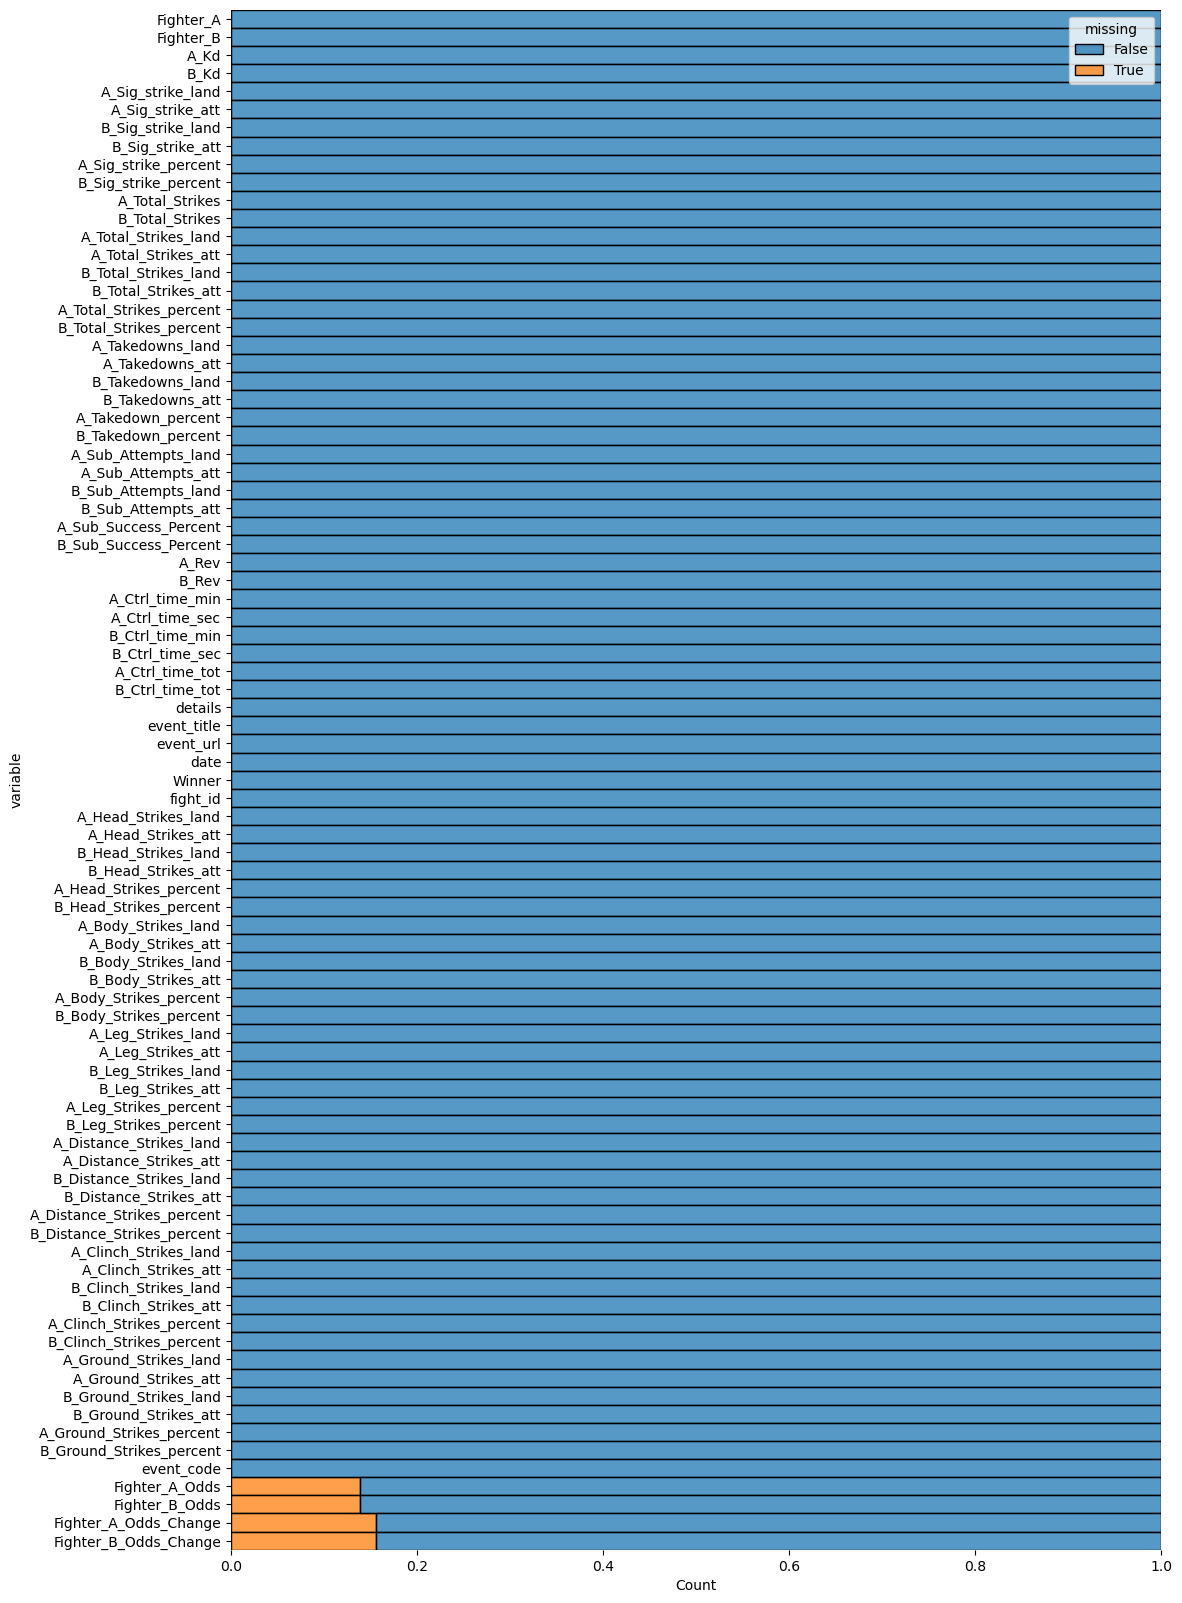

In [39]:
f, ax = plt.subplots(figsize = (12,20))

sns.despine(f, left=True, bottom=True)
sns.histplot(
    data = double_fights_df.isna().melt(value_name='missing'),
    y= 'variable',
    hue = 'missing',
    multiple = 'fill', ax = ax)

### As we know from earlier, we do not have many of these odds because these events were outside of the UFC. Thus, we can drop them. 

In [40]:
double_fights_df = double_fights_df.dropna()
double_fights_df.shape

(8924, 85)

In [41]:
double_fights_df.to_csv('data/final/aggregates/Double_Fights_DF_V1.csv', index=False)

In [42]:
double_fights_df= pd.read_csv('data/final/aggregates/Double_Fights_DF_V1.csv')

In [43]:
double_fights_df.head(3)

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,A_Ground_Strikes_att,B_Ground_Strikes_land,B_Ground_Strikes_att,A_Ground_Strikes_percent,B_Ground_Strikes_percent,event_code,Fighter_A_Odds,Fighter_B_Odds,Fighter_A_Odds_Change,Fighter_B_Odds_Change
0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,0.25,...,0.0,4.0,4.0,0.0,1.0,0ec821423baa26bd,-110.0,100.0,72.0,14.0
1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,0.29,...,0.0,0.0,0.0,0.0,0.0,cfbccfed4e4796fe,115.0,-135.0,15.0,46.0
2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,0.32,...,4.0,0.0,0.0,1.0,0.0,a79bfbc01b2264d6,-390.0,320.0,39.0,90.0


In [44]:
# find all objects in df
double_fights_df.select_dtypes(include=['object']).columns

Index(['Fighter_A', 'Fighter_B', 'A_Total_Strikes', 'B_Total_Strikes',
       'details', 'event_title', 'event_url', 'date', 'Winner', 'fight_id',
       'event_code'],
      dtype='object')

In [45]:
# drop A_Total_Strikes and B_Total_Strikes, they were not meant to be here. 
double_fights_df = double_fights_df.drop(['A_Total_Strikes', 'B_Total_Strikes'], axis=1)


## Add Feature: In-Fight Statistic Differentials

This is 

First make sure that there are no Nans or Infs in the data

In [46]:
#check for nans and infs
double_fights_df.isna().sum()

Fighter_A                0
Fighter_B                0
A_Kd                     0
B_Kd                     0
A_Sig_strike_land        0
                        ..
event_code               0
Fighter_A_Odds           0
Fighter_B_Odds           0
Fighter_A_Odds_Change    0
Fighter_B_Odds_Change    0
Length: 83, dtype: int64

In [47]:
# turn infs to nans
double_fights_df = double_fights_df.replace([np.inf, -np.inf], np.nan)

In [48]:
# calculate differences between in-match stats

for col in double_fights_df.columns:
    if col.startswith('A_'):
        new_col = col.replace('A_', 'Dif_')
        double_fights_df[new_col] = double_fights_df[col] - double_fights_df[col.replace('A_', 'B_')]
    else:
        continue

double_fights_df

,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,B_Sig_strike_percent,...,Dif_Leg_Strikes_percent,Dif_Distance_Strikes_land,Dif_Distance_Strikes_att,Dif_Distance_Strikes_percent,Dif_Clinch_Strikes_land,Dif_Clinch_Strikes_att,Dif_Clinch_Strikes_percent,Dif_Ground_Strikes_land,Dif_Ground_Strikes_att,Dif_Ground_Strikes_percent
0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,0.25,...,0.000000,18.0,18.0,0.095791,9.0,9.0,0.247500,-4.0,-4.0,-1.000000
1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,0.29,...,0.130435,9.0,19.0,0.023814,5.0,5.0,0.200000,0.0,0.0,0.000000
2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,0.32,...,0.000000,13.0,9.0,0.102729,3.0,4.0,0.750000,4.0,4.0,1.000000
3,Alex Caceres,Edwin Figueroa,0.0,1.0,55.0,89.0,41.0,81.0,0.61,0.50,...,0.111111,26.0,27.0,0.163489,-3.0,-3.0,0.000000,-9.0,-16.0,-0.055556
4,Kenny Florian,Joe Stevenson,0.0,0.0,17.0,37.0,6.0,18.0,0.45,0.33,...,0.000000,7.0,10.0,0.200000,-1.0,0.0,-0.333333,5.0,9.0,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,Russell Doane,Marcus Brimage,0.0,0.0,24.0,72.0,27.0,75.0,0.33,0.36,...,0.200000,-10.0,-9.0,-0.112222,2.0,1.0,0.250000,5.0,5.0,1.000000
8920,Preston Parsons,Trevin Giles,0.0,0.0,42.0,95.0,55.0,108.0,0.44,0.50,...,1.000000,0.0,1.0,-0.004877,0.0,1.0,-0.077778,-13.0,-15.0,0.125000
8921,Maximo Blanco,Chas Skelly,0.0,0.0,0.0,1.0,1.0,1.0,0.00,1.00,...,0.000000,-1.0,0.0,-1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
8922,Hector Aldana,Miguel Baeza,0.0,1.0,8.0,42.0,35.0,61.0,0.19,0.57,...,-0.250000,-21.0,-9.0,-0.378151,0.0,0.0,0.000000,-6.0,-10.0,-0.600000


In [49]:
# check for infs
double_fights_df.isna().sum()
# only display columns with nans
double_fights_df.isna().sum()[double_fights_df.isna().sum() > 0]

Series([], dtype: int64)

In [50]:
# add difference in odds
double_fights_df['Dif_Odds'] = double_fights_df['Fighter_A_Odds'] - double_fights_df['Fighter_B_Odds']

#### Add Distribution Stat Features

now fights = double_fights_df, for ease

In [51]:
fights = double_fights_df

In [52]:
def get_fighter_running_dist_stats(fighter, date, col_to_get, stat_to_calc):

    # retrieve data for all fights involving the given fighter
    data = fights[(fights['Fighter_A'] == fighter) | (fights['Fighter_B'] == fighter)]

    # convert date strings to datetime objects
    datey = pd.to_datetime(date)
    data['date'] = pd.to_datetime(data['date'])

    # filter data to only include fights before the given date
    data = data[data['date'] < datey]

    # create an empty dataframe to store fighter data
    fighter_data = pd.DataFrame()

    # retrieve data for fights where the given fighter is Fighter A
    fighterA_df = fights[fights['Fighter_A'] == fighter]
    # retrieve data for fights where the given fighter is Fighter B
    fighterB_df = fights[fights['Fighter_B'] == fighter]

    # select relevant columns from Fighter A data and rename columns for consistency
    fighterA_df = fighterA_df[['date', 'Fighter_A', 'A_' + col_to_get]]
    fighterA_df.rename(columns={'A_' + col_to_get: col_to_get, 'Fighter_A': 'fighter'}, inplace=True)

    # select relevant columns from Fighter B data and rename columns for consistency
    fighterB_df = fighterB_df[['date', 'Fighter_B', 'B_' + col_to_get]]
    fighterB_df.rename(columns={'B_' + col_to_get: col_to_get, 'Fighter_B': 'fighter'}, inplace=True)

    # append Fighter A and Fighter B data to the fighter_data dataframe
    fighter_data = fighter_data.append(fighterA_df)
    fighter_data = fighter_data.append(fighterB_df)

    # get the chosen statistic based on the input parameter
    if stat_to_calc == 'mean':
        x = fighter_data[col_to_get].mean()
    elif stat_to_calc == 'std':
        x = fighter_data[col_to_get].std()
    elif stat_to_calc == 'median':
        x = fighter_data[col_to_get].median()  

    # return the chosen statistic
    return x

#### Get Non-specific column names for Feature Creation

In [53]:
# This code creates three lists of column names from a dataframe called 'fights'
# The first list contains column names with 'Dif_' in them
# The second list contains column names that start with 'A_'
# The third list combines the second and first list

dif_cols = [n for n in fights.columns if 'Dif_' in n]
A_cols = [n for n in fights.columns if n.startswith('A_')]
all_metric_cols = A_cols + dif_cols

# This code creates a new dataframe containing the second list of column names without the 'A_' prefix
# It then creates a list of unique column name suffixes

A_cols2 = pd.DataFrame(A_cols)
A_cols2['nonspecific'] = A_cols2[0].str[2:]
the_cols = list(A_cols2['nonspecific'].unique())

In [54]:
the_cols

['Kd',
 'Sig_strike_land',
 'Sig_strike_att',
 'Sig_strike_percent',
 'Total_Strikes_land',
 'Total_Strikes_att',
 'Total_Strikes_percent',
 'Takedowns_land',
 'Takedowns_att',
 'Takedown_percent',
 'Sub_Attempts_land',
 'Sub_Attempts_att',
 'Sub_Success_Percent',
 'Rev',
 'Ctrl_time_min',
 'Ctrl_time_sec',
 'Ctrl_time_tot',
 'Head_Strikes_land',
 'Head_Strikes_att',
 'Head_Strikes_percent',
 'Body_Strikes_land',
 'Body_Strikes_att',
 'Body_Strikes_percent',
 'Leg_Strikes_land',
 'Leg_Strikes_att',
 'Leg_Strikes_percent',
 'Distance_Strikes_land',
 'Distance_Strikes_att',
 'Distance_Strikes_percent',
 'Clinch_Strikes_land',
 'Clinch_Strikes_att',
 'Clinch_Strikes_percent',
 'Ground_Strikes_land',
 'Ground_Strikes_att',
 'Ground_Strikes_percent']

In [55]:
# test get_fighter_running_dist_stats
get_fighter_running_dist_stats('Khabib Nurmagomedov', '2020-01-18', 'Sig_strike_land', 'mean')

55.75

These are split because they were causing problems when running all at once

In [56]:
# Mean First

for col in the_cols:
        fights['A_Rolling_' + col + '_' + 'mean'] = fights.apply(lambda row: get_fighter_running_dist_stats(row['Fighter_A'], row['date'], col, 'mean'), axis=1)

# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V2_1.csv', index=False)

In [57]:
for col in the_cols:
    fights['B_Rolling_' + col + '_' + 'mean'] = fights.apply(lambda row: get_fighter_running_dist_stats(row['Fighter_B'], row['date'], col, 'mean'), axis=1)

# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V2_2.csv', index=False)

In [58]:
# Now Median
for col in the_cols:
        fights['A_Rolling_' + col + '_' + 'median'] = fights.apply(lambda row: get_fighter_running_dist_stats(row['Fighter_A'], row['date'], col, 'median'), axis=1)

# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V2_3.csv', index=False)

In [59]:
# fighter 2 Median
for col in the_cols:
    fights['B_Rolling_' + col + '_' + 'median'] = fights.apply(lambda row: get_fighter_running_dist_stats(row['Fighter_B'], row['date'], col, 'median'), axis=1)

# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V2_4.csv', index=False)

In [60]:
# Now Std
for col in the_cols:
    fights['A_Rolling_' + col + '_' + 'std'] = fights.apply(lambda row: get_fighter_running_dist_stats(row['Fighter_A'], row['date'], col, 'std'), axis=1)

# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V2_5.csv', index=False)


In [61]:
# fighter 2 Std
for col in the_cols:
    fights['B_Rolling_' + col + '_' + 'std'] = fights.apply(lambda row: get_fighter_running_dist_stats(row['Fighter_B'], row['date'], col, 'std'), axis=1)

# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V2_6.csv', index=False)

New Version:

In [62]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V2.csv', index=False)

In [63]:
# Load point for fights df
#fights = pd.read_csv('data/final/aggregates/Double_Fights_DF_V2.csv')

## PART 2 --

This code is building a UFC (Ultimate Fighting Championship) fight dataset with multiple features including fighter statistics, fight metrics, and event information. The ultimate goal is to predict the winner of a fight. 

It broadly does the following:

1. Defines utility functions to generate fighter statistics and aggregate features such as the averages of certain metrics, fighter's data, opponent's data, and statistics differential per fight.
2. Iteratively applies these functions to each row (fight) influencing the DataFrame `fights`.
3. Treats missing data values by imputing missing values or dropping rows where necessary.
4. Extracts additional information about each fight like which round it ended, method of victory, or time to finish.
5. Extracts specific fighter’s biographical data, like height, weight, reach, and age. For missing reach values, it uses median values per height or weight class. 
6. Infers whether the fight was conducted in their typical weight class. 
7. Computes and adds new other derived features, like 'Ape_Index' and 'Leg_Index' that might be helpful indicators or influence the fight outcome.
8. Finally, it creates a 'win?' column to mark if the fighter_A has won the bout, which will be used as a label (target feature) for a machine learning model.

The script makes use of pandas for its data manipulation, and seaborn for visualizing missing data. To reduce calculation time, it saves intermediate data to CSV files at several points and fetches them for later use if needed.

### Feature: Top-Down Averages (typical UFC Style)

In [64]:
def get_top_down_averages(fighter, date, col_to_get, dataframe):

    # for each column in all_metric_cols, calculate the top-down averages, as opposed to bottom-up
    data = dataframe[(dataframe['Fighter_A'] == fighter) | (dataframe['Fighter_B'] == fighter)]

    # only get fights before the date
    datey = pd.to_datetime(date)
    data['date'] = pd.to_datetime(data['date'])
    data = data[data['date'] < datey]

    # fighter could be either fighter A or fighter B
    fighter_data = pd.DataFrame()


    # fighterA df
    fighterA_df = dataframe[dataframe['Fighter_A'] == fighter]
    fighterB_df = dataframe[dataframe['Fighter_B'] == fighter]
    
    # keep only the fighters columns date, FighterA, and the col_to_get, 
    # do same for B, change col names from B to A, and concat
    fighterA_df = fighterA_df[['date', 'Fighter_A', 'A_' + col_to_get]]
    fighterA_df.rename(columns={'A_' + col_to_get: col_to_get, 'Fighter_A': 'fighter'}, inplace=True)
    fighterB_df = fighterB_df[['date', 'Fighter_B', 'B_' + col_to_get]]
    fighterB_df.rename(columns={'B_' + col_to_get: col_to_get, 'Fighter_B': 'fighter'}, inplace=True)
    fighter_data = fighter_data.append(fighterA_df)
    fighter_data = fighter_data.append(fighterB_df)

    # append the dataframes on fighter
    fighter_data = fighter_data.append(fighterA_df)
    fighter_data = fighter_data.append(fighterB_df)

    # get the average
    tot = fighter_data[col_to_get].sum()
    num = fighter_data[col_to_get].count()
    x = tot / num
    return x

In [65]:
# delete rolling cols from the_cols
the_cols = [n for n in the_cols if 'Rolling' not in n]
the_cols

['Kd',
 'Sig_strike_land',
 'Sig_strike_att',
 'Sig_strike_percent',
 'Total_Strikes_land',
 'Total_Strikes_att',
 'Total_Strikes_percent',
 'Takedowns_land',
 'Takedowns_att',
 'Takedown_percent',
 'Sub_Attempts_land',
 'Sub_Attempts_att',
 'Sub_Success_Percent',
 'Rev',
 'Ctrl_time_min',
 'Ctrl_time_sec',
 'Ctrl_time_tot',
 'Head_Strikes_land',
 'Head_Strikes_att',
 'Head_Strikes_percent',
 'Body_Strikes_land',
 'Body_Strikes_att',
 'Body_Strikes_percent',
 'Leg_Strikes_land',
 'Leg_Strikes_att',
 'Leg_Strikes_percent',
 'Distance_Strikes_land',
 'Distance_Strikes_att',
 'Distance_Strikes_percent',
 'Clinch_Strikes_land',
 'Clinch_Strikes_att',
 'Clinch_Strikes_percent',
 'Ground_Strikes_land',
 'Ground_Strikes_att',
 'Ground_Strikes_percent']

In [66]:


for col in the_cols:
    fights['A_topdown_Avg_' + col ] = fights.apply(lambda row: get_top_down_averages(row['Fighter_A'], row['date'], col, fights), axis=1)

In [67]:
for col in the_cols:
    fights['B_topdown_Avg_' + col ] = fights.apply(lambda row: get_top_down_averages(row['Fighter_B'], row['date'], col, fights), axis=1)

In [68]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V3.csv')

PICK UP HERE 4.16

In [69]:
fights = pd.read_csv('data/final/aggregates/Double_Fights_DF_V3.csv')

### Add Opponent Stats

In [70]:
def get_opponent_averages(datafrm, date, col_to_get, fighter):
    col_to_get = 'B_' + col_to_get
    data = datafrm[(datafrm['Fighter_A'] == fighter) | (datafrm['Fighter_B'] == fighter)]
    datey = pd.to_datetime(date)
    data['date'] = pd.to_datetime(data['date'])
    data = data[data['date'] < datey]

    fighter_data = pd.DataFrame()

    fighterA_df = datafrm[datafrm['Fighter_A'] == fighter]
    fighterB_df = datafrm[datafrm['Fighter_B'] == fighter]

    # switch A_ and B_ to B_ and A_ in fighterB_df
    fighterB_df.columns = [n.replace('A_', 'C_') if n.startswith('A_') else n for n in fighterB_df.columns]
    fighterB_df.columns = [n.replace('B_', 'D_') if n.startswith('B_') else n for n in fighterB_df.columns]
    fighterB_df.columns = [n.replace('C_', 'B_') if n.startswith('C_') else n for n in fighterB_df.columns]
    fighterB_df.columns = [n.replace('D_', 'A_') if n.startswith('D_') else n for n in fighterB_df.columns]

    # copy fighter_A and fighter_B columns to new dataframe, then switch fighter_A and fighter_B columns

    fighterB_df.rename(columns={'Fighter_A': 'Fighter_A2', 'Fighter_B': 'Fighter_B2'}, inplace=True)
    fighterB_df.rename(columns={'Fighter_B2': 'Fighter_A', 'Fighter_A2': 'Fighter_B'}, inplace=True)

    fighter_data = fighter_data.append(fighterA_df)
    fighter_data = fighter_data.append(fighterB_df)

    # get sum of col to get
    col_sum = fighter_data[col_to_get].sum()
    # get number of fights
    num_fights = len(fighter_data)
    # get average
    avg = col_sum / num_fights

    return avg


In [71]:
# test
get_opponent_averages(fights, '2017-01-01', 'Sig_strike_land', 'Conor McGregor')

37.42857142857143

In [72]:
cols = [n for n in fights.columns if n.startswith('B_')]
cols = [n for n in cols if 'topdown_' not in n]
cols = [n for n in cols if 'Rolling_' not in n]
cols = [n for n in cols if 'Dif_' not in n]

In [73]:
# delete the first 2 characters of each in col
cols2 = pd.DataFrame(cols)
cols2['nonspecific'] = cols2[0].str[2:]
cols2

# get unique values
the_cols = list(cols2['nonspecific'].unique())
the_cols

['Kd',
 'Sig_strike_land',
 'Sig_strike_att',
 'Sig_strike_percent',
 'Total_Strikes_land',
 'Total_Strikes_att',
 'Total_Strikes_percent',
 'Takedowns_land',
 'Takedowns_att',
 'Takedown_percent',
 'Sub_Attempts_land',
 'Sub_Attempts_att',
 'Sub_Success_Percent',
 'Rev',
 'Ctrl_time_min',
 'Ctrl_time_sec',
 'Ctrl_time_tot',
 'Head_Strikes_land',
 'Head_Strikes_att',
 'Head_Strikes_percent',
 'Body_Strikes_land',
 'Body_Strikes_att',
 'Body_Strikes_percent',
 'Leg_Strikes_land',
 'Leg_Strikes_att',
 'Leg_Strikes_percent',
 'Distance_Strikes_land',
 'Distance_Strikes_att',
 'Distance_Strikes_percent',
 'Clinch_Strikes_land',
 'Clinch_Strikes_att',
 'Clinch_Strikes_percent',
 'Ground_Strikes_land',
 'Ground_Strikes_att',
 'Ground_Strikes_percent']

Get Opponent Averages (2-hours runtime)

In [75]:
n=0

# loop through the remaining columns
for col in the_cols:
    try:
        fights['A_Opp_Avg_' + col] = fights.apply(lambda row: get_opponent_averages(fights, row['date'], col, row['Fighter_A']), axis=1)
        fights['B_Opp_Avg_' + col] = fights.apply(lambda row: get_opponent_averages(fights, row['date'], col, row['Fighter_B']), axis=1)
        # save to csv
        fights.to_csv('data/intermediate_data/Opponent_Averages_{}_.csv'.format(col))

        n = n+1
        print(f' {col}, #{n} / {len(cols)} done.')
    except:
        print(f'Error on {col}')
        # play_danger()

# play_jobs_done()

 Kd, #1 / 35 done.
 Sig_strike_land, #2 / 35 done.
 Sig_strike_att, #3 / 35 done.
 Sig_strike_percent, #4 / 35 done.
 Total_Strikes_land, #5 / 35 done.
 Total_Strikes_att, #6 / 35 done.
 Total_Strikes_percent, #7 / 35 done.
 Takedowns_land, #8 / 35 done.
 Takedowns_att, #9 / 35 done.
 Takedown_percent, #10 / 35 done.
 Sub_Attempts_land, #11 / 35 done.
 Sub_Attempts_att, #12 / 35 done.
 Sub_Success_Percent, #13 / 35 done.
 Rev, #14 / 35 done.
 Ctrl_time_min, #15 / 35 done.
 Ctrl_time_sec, #16 / 35 done.
 Ctrl_time_tot, #17 / 35 done.
 Head_Strikes_land, #18 / 35 done.
 Head_Strikes_att, #19 / 35 done.
 Head_Strikes_percent, #20 / 35 done.
 Body_Strikes_land, #21 / 35 done.
 Body_Strikes_att, #22 / 35 done.
 Body_Strikes_percent, #23 / 35 done.
 Leg_Strikes_land, #24 / 35 done.
 Leg_Strikes_att, #25 / 35 done.
 Leg_Strikes_percent, #26 / 35 done.
 Distance_Strikes_land, #27 / 35 done.
 Distance_Strikes_att, #28 / 35 done.
 Distance_Strikes_percent, #29 / 35 done.
 Clinch_Strikes_land, #3

In [76]:
# load all data in data/intermediate_data, adding columns to fights
for file in os.listdir('data/intermediate_data/'):
    if file.startswith('Opponent_Averages_'):
        print(file)
        df = pd.read_csv('data/intermediate_data/' + file)
        fights_cols = list(fights.columns)
        df_cols = list(df.columns)
        cols_to_add = [n for n in df_cols if n not in fights_cols]
        for col in cols_to_add:
            fights[col] = df[col]
        
fights

Opponent_Averages_Leg_Strikes_att_.csv
Opponent_Averages_Distance_Strikes_land_.csv
Opponent_Averages_Body_Strikes_land_.csv
Opponent_Averages_Takedown_percent_.csv
Opponent_Averages_Head_Strikes_percent_.csv
Opponent_Averages_Distance_Strikes_percent_.csv
Opponent_Averages_Sig_strike_land_.csv
Opponent_Averages_Kd_.csv
Opponent_Averages_Sub_Success_Percent_.csv
Opponent_Averages_Body_Strikes_att_.csv
Opponent_Averages_Ctrl_time_sec_.csv
Opponent_Averages_Total_Strikes_percent_.csv
Opponent_Averages_Takedowns_land_.csv
Opponent_Averages_Leg_Strikes_land_.csv
Opponent_Averages_Total_Strikes_land_.csv
Opponent_Averages_Sub_Attempts_att_.csv
Opponent_Averages_Clinch_Strikes_att_.csv
Opponent_Averages_Head_Strikes_att_.csv
Opponent_Averages_Head_Strikes_land_.csv
Opponent_Averages_Ground_Strikes_land_.csv
Opponent_Averages_Rev_.csv
Opponent_Averages_Distance_Strikes_att_.csv
Opponent_Averages_Body_Strikes_percent_.csv
Opponent_Averages_Ctrl_time_tot_.csv
Opponent_Averages_Takedowns_att_.cs

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,B_Opp_Avg_Clinch_Strikes_att,A_Opp_Avg_Clinch_Strikes_percent,B_Opp_Avg_Clinch_Strikes_percent,A_Opp_Avg_Ground_Strikes_land,B_Opp_Avg_Ground_Strikes_land,A_Opp_Avg_Ground_Strikes_att,B_Opp_Avg_Ground_Strikes_att,A_Opp_Avg_Ground_Strikes_percent,B_Opp_Avg_Ground_Strikes_percent,Unnamed: 0.1
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,12.416667,0.484990,0.614323,1.583333,0.916667,2.083333,1.500000,0.337302,0.409722,0
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,6.857143,0.523333,0.717950,0.700000,4.000000,1.000000,6.714286,0.330000,0.201923,1
2,2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,...,4.833333,0.518519,0.516667,1.000000,7.166667,1.600000,7.333333,0.233333,0.583333,2
3,3,Alex Caceres,Edwin Figueroa,0.0,1.0,55.0,89.0,41.0,81.0,0.61,...,4.666667,0.554266,0.631944,3.000000,6.666667,4.750000,10.166667,0.414878,0.497863,3
4,4,Kenny Florian,Joe Stevenson,0.0,0.0,17.0,37.0,6.0,18.0,0.45,...,3.000000,0.421905,0.261905,3.200000,3.285714,6.000000,4.714286,0.395000,0.712018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,8919,Russell Doane,Marcus Brimage,0.0,0.0,24.0,72.0,27.0,75.0,0.33,...,2.166667,0.250000,0.355556,3.600000,2.666667,3.600000,3.166667,0.400000,0.611111,8919
8920,8920,Preston Parsons,Trevin Giles,0.0,0.0,42.0,95.0,55.0,108.0,0.44,...,4.111111,0.759259,0.512963,6.666667,2.111111,9.666667,3.111111,0.458333,0.401235,8920
8921,8921,Maximo Blanco,Chas Skelly,0.0,0.0,0.0,1.0,1.0,1.0,0.00,...,6.727273,0.320000,0.439132,1.800000,9.363636,3.000000,11.636364,0.488889,0.559611,8921
8922,8922,Hector Aldana,Miguel Baeza,0.0,1.0,8.0,42.0,35.0,61.0,0.19,...,4.500000,0.300000,0.367647,3.000000,2.166667,5.000000,2.833333,0.300000,0.297619,8922


In [77]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V4.csv')

In [78]:
#fights = pd.read_csv('data/final/aggregates/Double_Fights_DF_V4.csv')

In [79]:
# check for nans and show them
fights.isna().sum()

Unnamed: 0                          0
Fighter_A                           0
Fighter_B                           0
A_Kd                                0
B_Kd                                0
                                   ..
A_Opp_Avg_Ground_Strikes_att        0
B_Opp_Avg_Ground_Strikes_att        0
A_Opp_Avg_Ground_Strikes_percent    0
B_Opp_Avg_Ground_Strikes_percent    0
Unnamed: 0.1                        0
Length: 471, dtype: int64

In [80]:
# check for infs and show them
fights[fights == np.inf].sum()

Unnamed: 0                          0.0
Fighter_A                             0
Fighter_B                             0
A_Kd                                0.0
B_Kd                                0.0
                                   ... 
A_Opp_Avg_Ground_Strikes_att        0.0
B_Opp_Avg_Ground_Strikes_att        0.0
A_Opp_Avg_Ground_Strikes_percent    0.0
B_Opp_Avg_Ground_Strikes_percent    0.0
Unnamed: 0.1                        0.0
Length: 471, dtype: object

In [81]:
# show all columns with infs
[fights[col].isna().sum() for col in fights.columns if fights[col].isna().sum() > 0]

[]

### Feature: Rolling Career Stat Differentials

#### 1) Mean (Average)

In [82]:
# get columns with Rolling and Mean
rolling_mean_cols= [n for n in fights.columns if 'Rolling' in n and 'mean' in n]
rolling_mean_cols = pd.DataFrame(rolling_mean_cols)
rolling_mean_cols['nonspecific'] = rolling_mean_cols[0].str[2:]
rmc = rolling_mean_cols['nonspecific'].unique()

In [83]:
for col in rmc:
    fights['Dif_' + col] = fights['A_' + col] - fights['B_' + col]

fights.head()

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,Dif_Rolling_Leg_Strikes_percent_mean,Dif_Rolling_Distance_Strikes_land_mean,Dif_Rolling_Distance_Strikes_att_mean,Dif_Rolling_Distance_Strikes_percent_mean,Dif_Rolling_Clinch_Strikes_land_mean,Dif_Rolling_Clinch_Strikes_att_mean,Dif_Rolling_Clinch_Strikes_percent_mean,Dif_Rolling_Ground_Strikes_land_mean,Dif_Rolling_Ground_Strikes_att_mean,Dif_Rolling_Ground_Strikes_percent_mean
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,0.604381,20.166667,52.083333,0.069524,5.500000,8.083333,0.106062,1.833333,3.916667,0.150033
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,0.235394,7.685714,-0.114286,0.072201,-0.300000,-1.971429,0.110380,11.885714,17.714286,0.170538
2,2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,...,0.135805,39.766667,90.100000,0.020471,2.933333,4.100000,0.369335,1.600000,3.133333,0.116223
3,3,Alex Caceres,Edwin Figueroa,0.0,1.0,55.0,89.0,41.0,81.0,0.61,...,0.224278,21.625000,26.500000,0.116756,2.833333,2.125000,0.126030,-8.416667,-14.416667,-0.140073
4,4,Kenny Florian,Joe Stevenson,0.0,0.0,17.0,37.0,6.0,18.0,0.45,...,-0.018133,2.685714,14.100000,0.011403,2.214286,3.385714,0.008859,6.857143,11.871429,0.277595


#### 2) Median (Average)

In [84]:
rolling_median_cols= [n for n in fights.columns if 'Rolling' in n and 'median' in n]
rolling_median_cols = pd.DataFrame(rolling_median_cols)
rolling_median_cols['nonspecific'] = rolling_median_cols[0].str[2:]
rmc = rolling_median_cols['nonspecific'].unique()

In [85]:
for col in rmc:
    fights['Dif_' + col] = fights['A_' + col] - fights['B_' + col]

fights.head()

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,Dif_Rolling_Leg_Strikes_percent_median,Dif_Rolling_Distance_Strikes_land_median,Dif_Rolling_Distance_Strikes_att_median,Dif_Rolling_Distance_Strikes_percent_median,Dif_Rolling_Clinch_Strikes_land_median,Dif_Rolling_Clinch_Strikes_att_median,Dif_Rolling_Clinch_Strikes_percent_median,Dif_Rolling_Ground_Strikes_land_median,Dif_Rolling_Ground_Strikes_att_median,Dif_Rolling_Ground_Strikes_percent_median
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,0.920123,18.5,56.0,0.001425,1.0,4.5,0.127016,1.5,3.0,0.125000
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,0.077540,8.0,-4.0,0.101668,0.5,-3.0,0.162500,8.0,13.5,0.513158
2,2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,...,0.107143,45.0,96.5,0.072847,2.0,3.0,0.500000,0.0,-0.5,0.000000
3,3,Alex Caceres,Edwin Figueroa,0.0,1.0,55.0,89.0,41.0,81.0,0.61,...,0.159091,24.0,11.5,0.111379,2.5,1.5,0.340476,-6.5,-10.0,-0.111111
4,4,Kenny Florian,Joe Stevenson,0.0,0.0,17.0,37.0,6.0,18.0,0.45,...,-0.267857,7.0,35.0,-0.048037,-0.5,1.0,0.025000,9.0,10.5,0.673333


#### 3) Standard Deviations

In [86]:
rolling_std_cols= [n for n in fights.columns if 'Rolling' in n and 'std' in n]
rolling_std_cols = pd.DataFrame(rolling_std_cols)
rolling_std_cols['nonspecific'] = rolling_std_cols[0].str[2:]
rsc = rolling_std_cols['nonspecific'].unique()
rsc

array(['Rolling_Kd_std', 'Rolling_Sig_strike_land_std',
       'Rolling_Sig_strike_att_std', 'Rolling_Sig_strike_percent_std',
       'Rolling_Total_Strikes_land_std', 'Rolling_Total_Strikes_att_std',
       'Rolling_Total_Strikes_percent_std', 'Rolling_Takedowns_land_std',
       'Rolling_Takedowns_att_std', 'Rolling_Takedown_percent_std',
       'Rolling_Sub_Attempts_land_std', 'Rolling_Sub_Attempts_att_std',
       'Rolling_Sub_Success_Percent_std', 'Rolling_Rev_std',
       'Rolling_Ctrl_time_min_std', 'Rolling_Ctrl_time_sec_std',
       'Rolling_Ctrl_time_tot_std', 'Rolling_Head_Strikes_land_std',
       'Rolling_Head_Strikes_att_std', 'Rolling_Head_Strikes_percent_std',
       'Rolling_Body_Strikes_land_std', 'Rolling_Body_Strikes_att_std',
       'Rolling_Body_Strikes_percent_std', 'Rolling_Leg_Strikes_land_std',
       'Rolling_Leg_Strikes_att_std', 'Rolling_Leg_Strikes_percent_std',
       'Rolling_Distance_Strikes_land_std',
       'Rolling_Distance_Strikes_att_std',
       '

In [87]:
for col in rsc:
    fights['Dif_' + col] = fights['A_' + col] - fights['B_' + col]

fights.head()

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,Dif_Rolling_Leg_Strikes_percent_std,Dif_Rolling_Distance_Strikes_land_std,Dif_Rolling_Distance_Strikes_att_std,Dif_Rolling_Distance_Strikes_percent_std,Dif_Rolling_Clinch_Strikes_land_std,Dif_Rolling_Clinch_Strikes_att_std,Dif_Rolling_Clinch_Strikes_percent_std,Dif_Rolling_Ground_Strikes_land_std,Dif_Rolling_Ground_Strikes_att_std,Dif_Rolling_Ground_Strikes_percent_std
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,-0.091572,16.704996,17.616432,-0.045154,4.360690,4.822646,-0.069748,0.209050,2.604771,-0.080634
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,-0.097103,14.797761,35.529613,0.013646,-0.573301,-1.867576,0.014062,13.848811,18.124265,-0.046174
2,2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,...,-0.138250,22.673149,41.976537,-0.037374,3.414544,3.623142,0.213567,6.959170,12.746190,0.033769
3,3,Alex Caceres,Edwin Figueroa,0.0,1.0,55.0,89.0,41.0,81.0,0.61,...,-0.155121,19.629526,31.224942,0.055489,2.145959,3.497408,-0.072226,-6.745126,-14.577632,0.076609
4,4,Kenny Florian,Joe Stevenson,0.0,0.0,17.0,37.0,6.0,18.0,0.45,...,-0.084070,0.428456,8.136144,0.042528,2.741121,4.112602,-0.073046,0.280679,4.596265,-0.180076


In [88]:
# check for nans, show only if there are any
fights.isna().sum()[fights.isna().sum() > 0]

Series([], dtype: int64)

In [89]:
# check for infs, show only if there are any
fights[fights == np.inf].sum()[fights[fights == np.inf].sum() > 0]

Series([], dtype: object)

In [90]:
# Save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V5.csv')

In [91]:
#Identify columns with missing values
nothere = fights.isna().sum()
nothere = pd.DataFrame(nothere)
nothere = nothere.loc[nothere[0] > 0]

if len(nothere) > 0:
    cols = nothere.index

    f, ax = plt.subplots(figsize = (12,12))

    sns.despine(f, left=True, bottom=True)
    sns.histplot(
        data = fights[cols].isna().melt(value_name='missing'),
        y= 'variable',
        hue = 'missing',
        multiple = 'fill', ax = ax)

    ax.set_title('Missing Data by Column', fontsize = 20)
    ax.set_xlabel('Count', fontsize = 16)
    ax.set_ylabel('Column', fontsize = 16)
    ax.tick_params(labelsize = 14)

    plt.show()

else:
    print('No missing values')

No missing values


### Feature: UFC.Com Bio Data

In [92]:
fighter_bios = pd.read_csv('data/final/aggregates/All_Fighter_Bios.csv')
fighter_bios.head(1)

,Unnamed: 0.1,Unnamed: 0,Status,Place of Birth,Age,Height,Weight,Octagon Debut,fighter,Reach,Leg reach,Trains at,Fighting style
0,0,1,Not Fighting,"Martinsburg, United States",43.0,76.0,155.0,"Jan. 23, 2008",Corey Hill,NaN,NaN,NaN,NaN


In [93]:
# drop unnamed column
fighter_bios.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

Text(0.5, 0, 'Count')

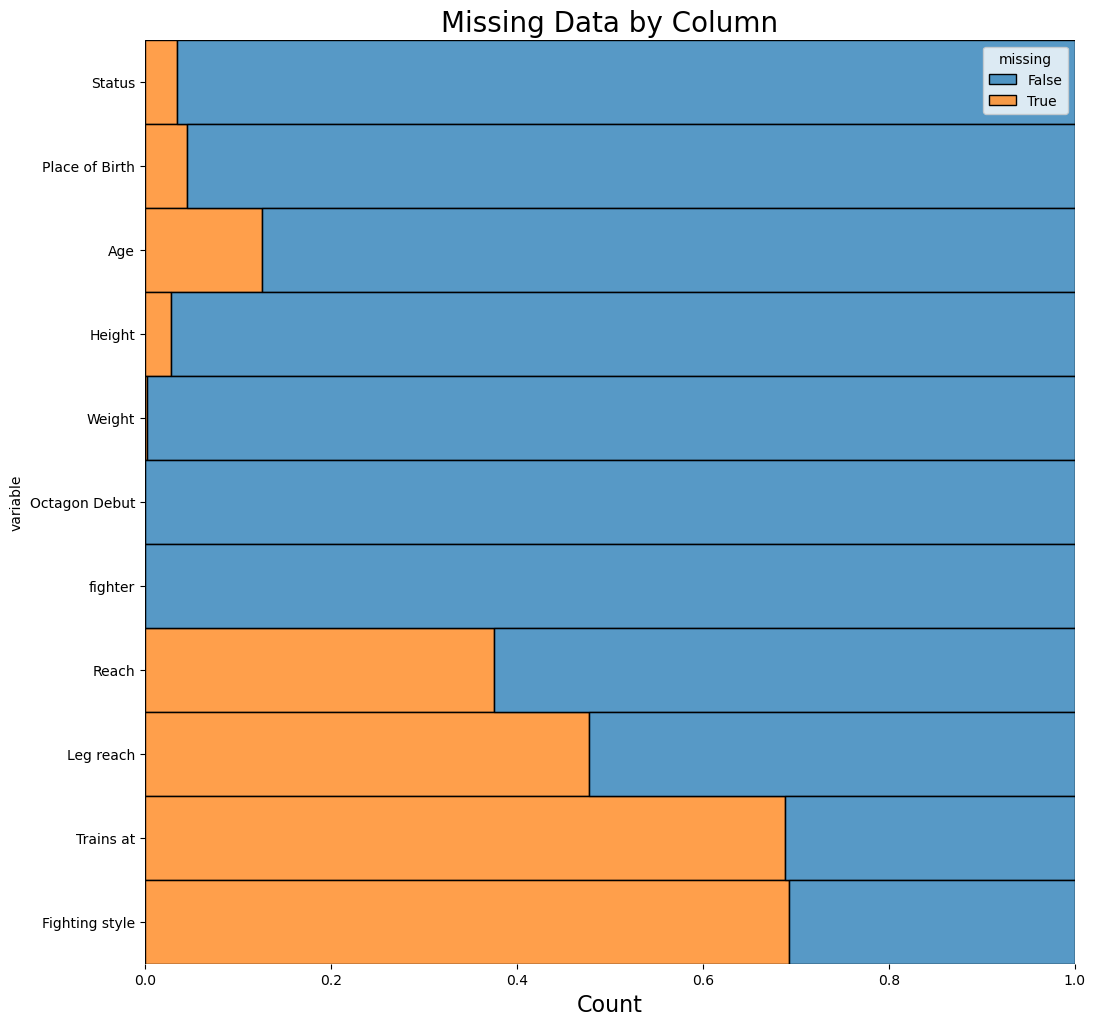

In [94]:
# Check NaNs

f, ax = plt.subplots(figsize = (12,12))

sns.despine(f, left=True, bottom=True)
sns.histplot(
    data = fighter_bios.isna().melt(value_name='missing'),
    y= 'variable',
    hue = 'missing',
    multiple = 'fill', ax = ax)

ax.set_title('Missing Data by Column', fontsize = 20)
ax.set_xlabel('Count', fontsize = 16)

In [95]:
# What about only Active fighter Nans?
active = fighter_bios.loc[fighter_bios['Status'] == "Active"]
active

,Status,Place of Birth,Age,Height,Weight,Octagon Debut,fighter,Reach,Leg reach,Trains at,Fighting style
2,Active,"Soure, Brazil",34.0,65.0,124.0,"Jun. 03, 2017",Deiveson Figueiredo,68.0,38.0,Team Figueiredo,Boxing
7,Active,Japan,27.0,67.0,135.0,"Jun. 10, 2022",Rinya Nakamura,68.5,37.0,NaN,Wrestler
9,Active,"Syracuse, United States",NaN,69.0,135.0,"Dec. 11, 2022",Colleen Schneider,NaN,NaN,NaN,NaN
14,Active,"Liverpool, United Kingdom",32.0,64.0,125.5,"May. 27, 2018",Molly McCann,62.0,37.0,NEXT Generation MMA,Boxer
15,Active,"Limoeiro do Norte, Brazil",28.0,62.0,134.0,"Dec. 11, 2022",Mabelly Lima,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2489,Active,"Grozny, Russia",33.0,71.0,185.5,"Oct. 30, 2021",Albert Duraev,75.0,40.0,NaN,MMA
2490,Active,"Liverpool, United Kingdom",27.0,70.0,168.0,"Sep. 04, 2021",Paddy Pimblett,73.0,40.0,NEXT Generation MMA,Jiu-Jitsu
2491,Active,Indonesia,28.0,68.0,155.0,"Feb. 04, 2023",Jeka Saragih,69.0,38.0,NaN,MMA
2493,Active,"Lancaster, United States",30.0,72.0,186.0,"Nov. 21, 2020",Dustin Stoltzfus,75.0,43.5,NaN,Muay Thai


Text(0.5, 0, 'Count')

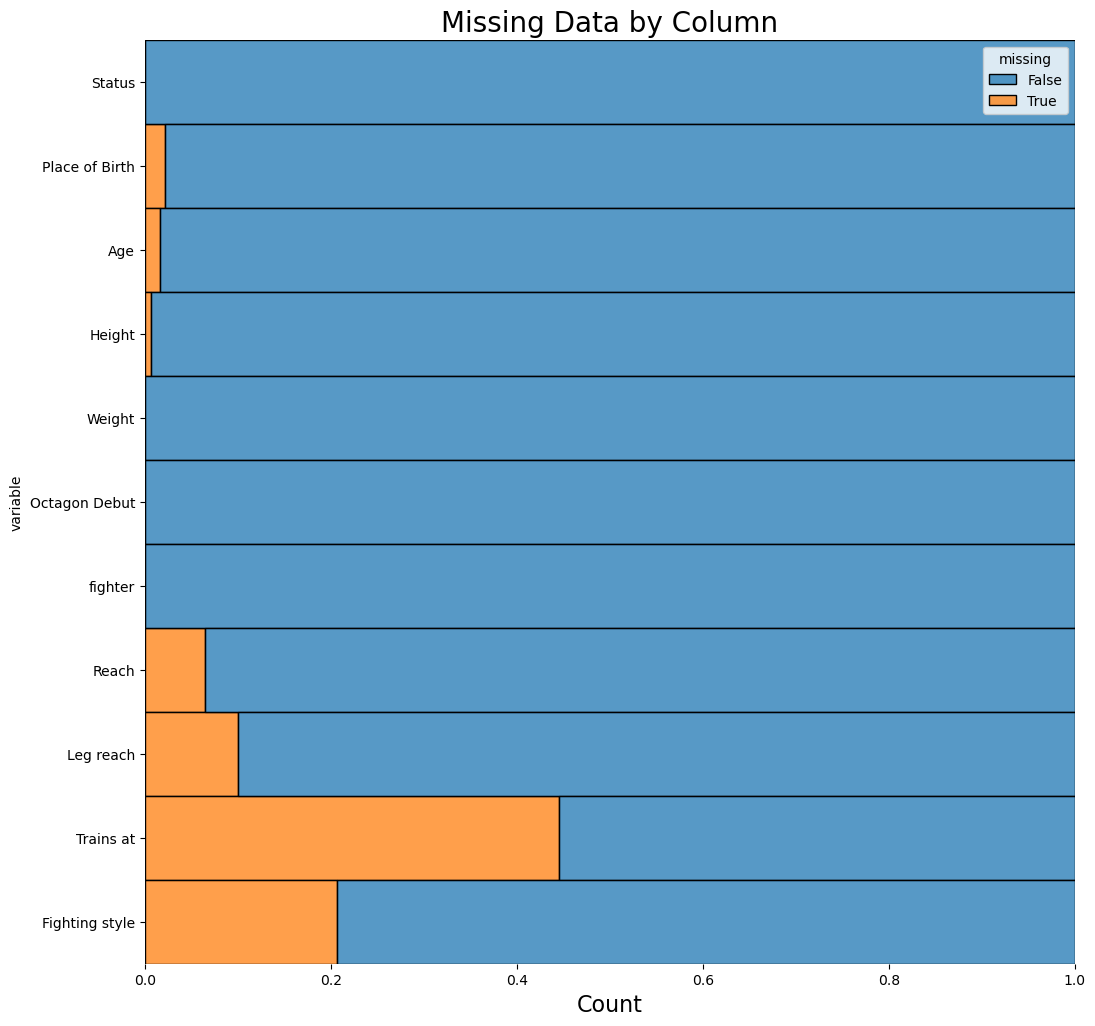

In [96]:
# Check NaNs

f, ax = plt.subplots(figsize = (12,12))

sns.despine(f, left=True, bottom=True)
sns.histplot(
    data = active.isna().melt(value_name='missing'),
    y= 'variable',
    hue = 'missing',
    multiple = 'fill', ax = ax)

ax.set_title('Missing Data by Column', fontsize = 20)
ax.set_xlabel('Count', fontsize = 16)

#### Dealing with Initial Missing Values

Initial missing values are those such as Age, Status, Fighting Style (categorical variables) which I can impute unknown categories to without much issue. The others (height, weight, reach, etc) must be dealt with after the merge.

In [97]:
# if missing place of birth, replace with 'Unknown'
fighter_bios['Place of Birth'].fillna('Unknown', inplace=True)

# if missing fighting style, replace with 'Unknown'
fighter_bios['Fighting style'].fillna('Unknown', inplace=True)

# if missing Trains at, replace with 'Unknown'
fighter_bios['Trains at'].fillna('Unknown', inplace=True)

# if missing status, replace with 'Unknown'
fighter_bios['Status'].fillna('Unknown', inplace=True)

# if missing age, replace with median
fighter_bios['Age'].fillna(fighter_bios['Age'].median(), inplace=True)

# if missing height, replace with median -- thankfully not many missing, as 
# this is a somewhat important feature
fighter_bios['Height'].fillna(fighter_bios['Height'].median(), inplace=True)

# if missing weight, replace with median -- thankfully not many missing
fighter_bios['Weight'].fillna(fighter_bios['Weight'].median(), inplace=True)

In [98]:
def get_bio_data(fighter, stat):
    try:
        data = fighter_bios[fighter_bios['fighter'] == fighter]
        d = data[stat].values[0]
        d = pd.to_numeric(d)
        return d
    except:
        return nan

In [99]:
# test
weight = get_bio_data('Khabib Nurmagomedov', 'Height')
weight

70.0

In [100]:
fights['A_Height'] = fights.apply(lambda row: get_bio_data(row['Fighter_A'], 'Height'), axis=1)
fights['B_Height'] = fights.apply(lambda row: get_bio_data(row['Fighter_B'], 'Height'), axis=1)
fights['Dif_Height'] = fights['A_Height'] - fights['B_Height']

In [101]:
fights['A_Reach'] = fights.apply(lambda row: get_bio_data(row['Fighter_A'], 'Reach'), axis=1)
fights['B_Reach'] = fights.apply(lambda row: get_bio_data(row['Fighter_B'], 'Reach'), axis=1)
fights['Dif_Reach'] = fights['A_Reach'] - fights['B_Reach']

In [102]:
fights['A_Leg_Reach'] = fights.apply(lambda row: get_bio_data(row['Fighter_A'], 'Leg reach'), axis=1)
fights['B_Leg_Reach'] = fights.apply(lambda row: get_bio_data(row['Fighter_B'], 'Leg reach'), axis=1)
fights['Dif_Leg_Reach'] = fights['A_Leg_Reach'] - fights['B_Leg_Reach']

<Axes: xlabel='Count', ylabel='variable'>

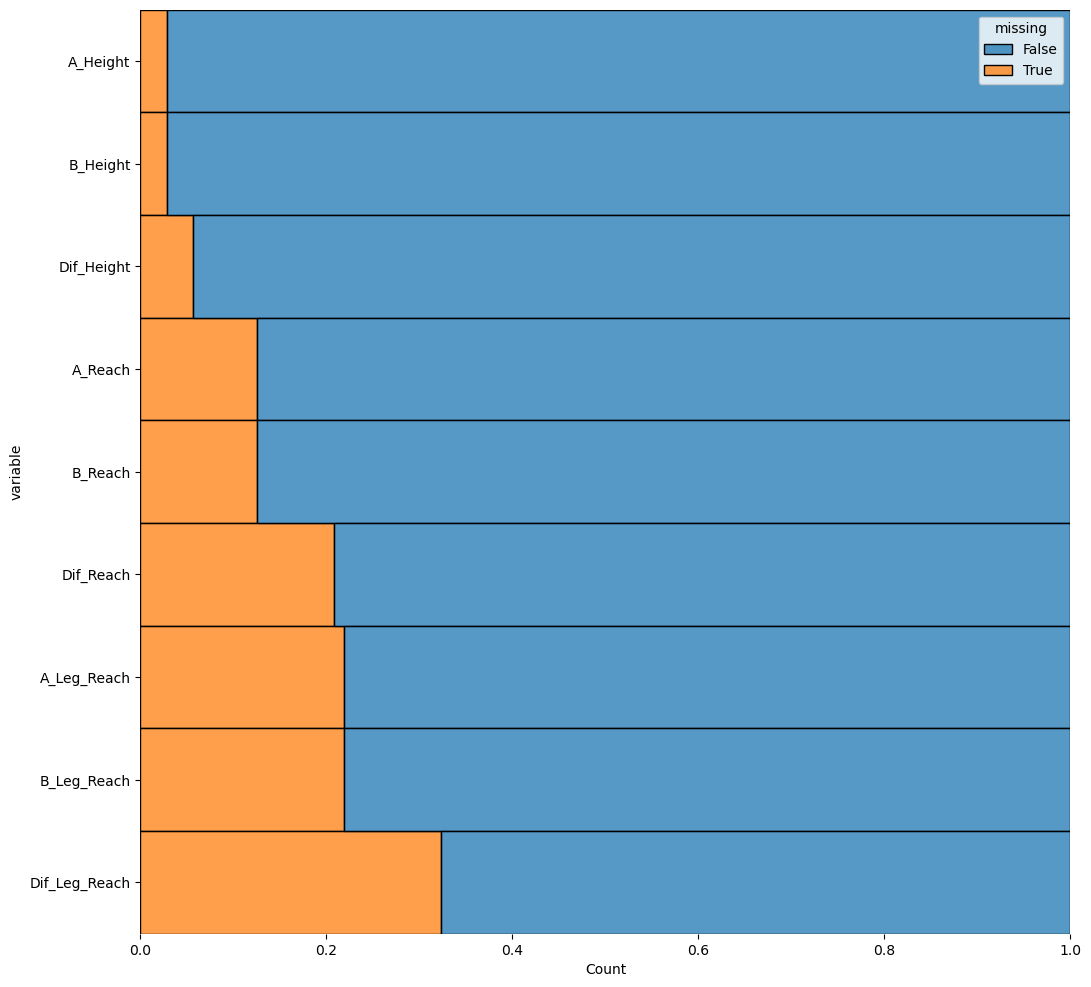

In [103]:
#Identify columns with missing values
nothere = fights.isna().sum()
nothere = pd.DataFrame(nothere)
nothere = nothere.loc[nothere[0] > 0]
cols = nothere.index

f, ax = plt.subplots(figsize = (12,12))

sns.despine(f, left=True, bottom=True)
sns.histplot(
    data = fights[cols].isna().melt(value_name='missing'),
    y= 'variable',
    hue = 'missing',
    multiple = 'fill', ax = ax)

In [104]:
# drop rows missing height data
fights.dropna(subset=['A_Height', 'B_Height'], inplace=True)
len(fights)

8424

In [105]:
# New column indicating if we have the reach data for fighter A
fights['A_Reach_NA'] = fights['A_Reach'].isna()

# New column indicating if we have the reach data for fighter B
fights['B_Reach_NA'] = fights['B_Reach'].isna()

# New column indicating if we have the reach data for either fighter
fights['Reach_NA'] = fights['A_Reach_NA'] | fights['B_Reach_NA']

# New column indicating if we have leg reach data for fighter A
fights['A_Leg_Reach_NA'] = fights['A_Leg_Reach'].isna()

# New column indicating if we have leg reach data for fighter B
fights['B_Leg_Reach_NA'] = fights['B_Leg_Reach'].isna()

# New column indicating if we have leg reach data for either fighter
fights['Leg_Reach_NA'] = fights['A_Leg_Reach_NA'] | fights['B_Leg_Reach_NA']

### Add Weightclass

Then you can break down height, reach, etc... by weightclass, which is in the All_Events_Fights_and_FightUrls file

In [106]:
all_events = pd.read_csv('data/final/events/All_Events_Fights_and_FightUrls.csv')

In [107]:
def find_typical_weightclass(fighter):
    try:
        data = all_events[all_events['Fighter1'] == fighter]
        data2 = all_events[all_events['Fighter2'] == fighter]
        data = pd.concat([data, data2])
        d = data['Weight class'].value_counts().index[0]
        return d
    except:
        return nan


In [108]:
# test
weight = find_typical_weightclass('Khabib Nurmagomedov')
weight

'Lightweight'

In [109]:
fights['A_Typical_Weightclass'] = fights.apply(lambda row: find_typical_weightclass(row['Fighter_A']), axis=1)
fights['B_Typical_Weightclass'] = fights.apply(lambda row: find_typical_weightclass(row['Fighter_B']), axis=1)

In [110]:
fights.head(3)

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,B_Leg_Reach,Dif_Leg_Reach,A_Reach_NA,B_Reach_NA,Reach_NA,A_Leg_Reach_NA,B_Leg_Reach_NA,Leg_Reach_NA,A_Typical_Weightclass,B_Typical_Weightclass
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,NaN,NaN,False,True,True,False,True,True,Welterweight,Welterweight
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,38.5,-2.5,False,False,False,False,False,False,Featherweight,Featherweight
2,2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,...,41.0,-1.0,False,False,False,False,False,False,Welterweight,Welterweight


In [111]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V6.csv', index=False)

In [112]:
# use fight_id to find weightclass of fight
def find_weightclass(fight_id):
    try:
        fight_url = 'http://www.ufcstats.com/fight-details/' + str(fight_id)
        data = all_events[all_events['fight_link'] == fight_url]
        d = data['Weight class'].values[0]
        return d
    except:
        return nan

In [113]:
# test
weight = find_weightclass('ff6c8dab41efcc09')
weight

'Heavyweight'

In [114]:
fights['fight_weightclass'] = fights.apply(lambda row: find_weightclass(row['fight_id']), axis=1)

In [115]:
fights.head(3)

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,Dif_Leg_Reach,A_Reach_NA,B_Reach_NA,Reach_NA,A_Leg_Reach_NA,B_Leg_Reach_NA,Leg_Reach_NA,A_Typical_Weightclass,B_Typical_Weightclass,fight_weightclass
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,NaN,False,True,True,False,True,True,Welterweight,Welterweight,Welterweight
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,-2.5,False,False,False,False,False,False,Featherweight,Featherweight,Featherweight
2,2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,...,-1.0,False,False,False,False,False,False,Welterweight,Welterweight,Welterweight


In [116]:
fights['A_Fight_in_Typical_Weightclass'] = fights.apply(lambda row: row['A_Typical_Weightclass'] == row['fight_weightclass'], axis=1)
fights['B_Fight_in_Typical_Weightclass'] = fights.apply(lambda row: row['B_Typical_Weightclass'] == row['fight_weightclass'], axis=1)

In [117]:
fights.head(3)

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,B_Reach_NA,Reach_NA,A_Leg_Reach_NA,B_Leg_Reach_NA,Leg_Reach_NA,A_Typical_Weightclass,B_Typical_Weightclass,fight_weightclass,A_Fight_in_Typical_Weightclass,B_Fight_in_Typical_Weightclass
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,True,True,False,True,True,Welterweight,Welterweight,Welterweight,True,True
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,False,False,False,False,False,Featherweight,Featherweight,Featherweight,True,True
2,2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,...,False,False,False,False,False,Welterweight,Welterweight,Welterweight,True,True


In [118]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V7.csv', index=False)

### Feature: Method

The main methods of fight finishing are:
- Decision (DEC)
- KO/TKO
- Submission (SUB)


In [119]:
all_events.head(2)

,Unnamed: 0.1,Unnamed: 0,W/L,Weight class,Method,Round,Time,Fighter1,Fighter2,F1_Kd,F2_Kd,F1_Str,F2_Str,F1_Td,F2_Td,F1_Sub,F2_Sub,fight_num,event_id,fight_link
0,0,0,win,Middleweight,KO/TKO Punch,2,3:33,Israel Adesanya,Robert Whittaker,2,0,40,32,0,0,0,0,1,3cf68c1d17f66af7,http://www.ufcstats.com/fight-details/2556b752...
1,1,1,win,Lightweight,U-DEC,3,5:00,Dan Hooker,Al Iaquinta,1,0,98,37,0,0,0,0,2,3cf68c1d17f66af7,http://www.ufcstats.com/fight-details/0697d552...


In [120]:
# split Method into Method and Method Detail
all_events['Method_Primary'] = all_events['Method'].str.split('  ', expand=True)[0]
all_events['Method_Detail'] = all_events['Method'].str.split('  ', expand=True)[1]
all_events.head(3)

,Unnamed: 0.1,Unnamed: 0,W/L,Weight class,Method,Round,Time,Fighter1,Fighter2,F1_Kd,...,F2_Str,F1_Td,F2_Td,F1_Sub,F2_Sub,fight_num,event_id,fight_link,Method_Primary,Method_Detail
0,0,0,win,Middleweight,KO/TKO Punch,2,3:33,Israel Adesanya,Robert Whittaker,2,...,32,0,0,0,0,1,3cf68c1d17f66af7,http://www.ufcstats.com/fight-details/2556b752...,KO/TKO,Punch
1,1,1,win,Lightweight,U-DEC,3,5:00,Dan Hooker,Al Iaquinta,1,...,37,0,0,0,0,2,3cf68c1d17f66af7,http://www.ufcstats.com/fight-details/0697d552...,U-DEC,None
2,2,2,win,Heavyweight,SUB Arm Triangle,2,3:14,Serghei Spivac,Tai Tuivasa,0,...,21,6,0,1,0,3,3cf68c1d17f66af7,http://www.ufcstats.com/fight-details/8cd7ca0e...,SUB,Arm Triangle


In [121]:
def get_method(fight_id):
    try:
        fight_url = 'http://www.ufcstats.com/fight-details/' + str(fight_id)
        data = all_events[all_events['fight_link'] == fight_url]
        d = data['Method_Primary'].values[0]
        return d
    except:
        return nan

In [122]:
def get_details(fight_id):
    try:
        fight_url = 'http://www.ufcstats.com/fight-details/' + str(fight_id)
        data = all_events[all_events['fight_link'] == fight_url]
        d = data['Method_Detail'].values[0]
        return d
    except:
        return nan

In [123]:
# test
method = get_method('ff6c8dab41efcc09')
method

'U-DEC'

In [124]:
fights['InFightData__Method_Primary'] = fights.apply(lambda row: get_method(row['fight_id']), axis=1)
fights['InFightData__Method_Detail'] = fights.apply(lambda row: get_details(row['fight_id']), axis=1)

### Feature: Round & Time

In [125]:
def get_round_time(fight_id, round_or_time):
    try: 
        fight_url = 'http://www.ufcstats.com/fight-details/' + str(fight_id)
        data = all_events[all_events['fight_link'] == fight_url]
        if round_or_time == 'round':
            d = data['Round'].values[0]
        elif round_or_time == 'time':
            d = data['Time'].values[0]
        return d
    except:
        return nan

In [126]:
# test
round = get_round_time('ff6c8dab41efcc09', 'round')
round

3

In [127]:
fights['InFightData__Round'] = fights.apply(lambda row: get_round_time(row['fight_id'], 'round'), axis=1)
fights['InFightData__Time'] = fights.apply(lambda row: get_round_time(row['fight_id'], 'time'), axis=1)

In [128]:
fights.head(3)

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,Leg_Reach_NA,A_Typical_Weightclass,B_Typical_Weightclass,fight_weightclass,A_Fight_in_Typical_Weightclass,B_Fight_in_Typical_Weightclass,InFightData__Method_Primary,InFightData__Method_Detail,InFightData__Round,InFightData__Time
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,True,Welterweight,Welterweight,Welterweight,True,True,S-DEC,None,3,5:00
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,False,Featherweight,Featherweight,Featherweight,True,True,S-DEC,None,3,5:00
2,2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,...,False,Welterweight,Welterweight,Welterweight,True,True,SUB,Rear Naked Choke,3,1:55


In [129]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V8.csv', index=False)

### Dealing with Remaining Missing Values

In [130]:
# get missing values, sorted by column
missing_values = fights.isnull().sum().sort_values(ascending=False)
# get rid of 0 values
missing_values = missing_values[missing_values > 0]
# get percentage of missing values
missing_values = missing_values / len(fights) * 100
missing_values

InFightData__Method_Detail    51.282051
Dif_Leg_Reach                 28.252612
A_Leg_Reach                   19.610636
B_Leg_Reach                   19.610636
Dif_Reach                     16.073124
A_Reach                       10.007123
B_Reach                       10.007123
B_Typical_Weightclass          0.094967
A_Typical_Weightclass          0.094967
dtype: float64

In [131]:
# replace nan values in "InFightData__Method_Detail" with "None"
fights['InFightData__Method_Detail'] = fights['InFightData__Method_Detail'].fillna('None')

In [132]:
# replace nan values in Typical Weightclass with current weightclass
fights['A_Typical_Weightclass'] = fights.apply(lambda row: row['fight_weightclass'] if pd.isnull(row['A_Typical_Weightclass']) else row['A_Typical_Weightclass'], axis=1)
fights['B_Typical_Weightclass'] = fights.apply(lambda row: row['fight_weightclass'] if pd.isnull(row['B_Typical_Weightclass']) else row['B_Typical_Weightclass'], axis=1)

In [133]:
# get median reach per height
reach_by_height = fights.groupby('A_Height')['A_Reach'].median()
reach_by_height

A_Height
0.0      NaN
60.0    60.0
61.0    62.0
61.5    62.0
62.0    64.0
62.5    62.5
63.0    64.5
63.5    65.5
64.0    65.0
64.5    68.0
65.0    66.0
66.0    67.0
66.5    66.0
67.0    69.0
67.5    69.0
68.0    70.0
68.5    71.0
69.0    71.0
70.0    72.0
70.5    76.0
71.0    73.0
71.5    73.0
72.0    74.0
72.5    78.0
73.0    75.0
73.5    77.0
74.0    75.5
74.5    78.0
75.0    77.0
75.5    76.0
76.0    80.0
77.0    79.0
78.0    81.0
78.5    79.0
79.0    80.0
80.0    80.0
84.0    84.5
Name: A_Reach, dtype: float64

In [134]:
# replace nan values in reach with median reach per height
fights['A_Reach'] = fights.apply(lambda row: reach_by_height[row['A_Height']] if pd.isnull(row['A_Reach']) else row['A_Reach'], axis=1)
fights['B_Reach'] = fights.apply(lambda row: reach_by_height[row['B_Height']] if pd.isnull(row['B_Reach']) else row['B_Reach'], axis=1)

In [135]:
# get median leg reach per height
leg_reach_by_height = fights.groupby('A_Height')['A_Leg_Reach'].median()
leg_reach_by_height

A_Height
0.0      NaN
60.0    34.0
61.0    35.0
61.5    35.0
62.0    36.0
62.5    38.0
63.0    36.0
63.5    38.0
64.0    37.0
64.5    38.0
65.0    37.5
66.0    38.0
66.5    38.0
67.0    38.0
67.5    38.0
68.0    39.0
68.5    38.5
69.0    39.5
70.0    40.0
70.5    42.0
71.0    40.5
71.5    43.0
72.0    41.0
72.5    40.0
73.0    41.5
73.5    41.0
74.0    42.0
74.5    44.0
75.0    43.5
75.5    43.0
76.0    44.0
77.0    46.0
78.0    44.5
78.5    45.5
79.0    47.5
80.0     NaN
84.0    44.0
Name: A_Leg_Reach, dtype: float64

In [136]:
# replace nan values in leg reach with median leg reach per height
fights['A_Leg_Reach'] = fights.apply(lambda row: leg_reach_by_height[row['A_Height']] if pd.isnull(row['A_Leg_Reach']) else row['A_Leg_Reach'], axis=1)
fights['B_Leg_Reach'] = fights.apply(lambda row: leg_reach_by_height[row['B_Height']] if pd.isnull(row['B_Leg_Reach']) else row['B_Leg_Reach'], axis=1)

In [137]:
# recalculate leg reach dif and reach dif
fights['A_Leg_Reach_Dif'] = fights['A_Leg_Reach'] - fights['B_Leg_Reach']
fights['A_Reach_Dif'] = fights['A_Reach'] - fights['B_Reach']

In [138]:
fights.dtypes[-40:]

Dif_Rolling_Body_Strikes_att_std            float64
Dif_Rolling_Body_Strikes_percent_std        float64
Dif_Rolling_Leg_Strikes_land_std            float64
Dif_Rolling_Leg_Strikes_att_std             float64
Dif_Rolling_Leg_Strikes_percent_std         float64
Dif_Rolling_Distance_Strikes_land_std       float64
Dif_Rolling_Distance_Strikes_att_std        float64
Dif_Rolling_Distance_Strikes_percent_std    float64
Dif_Rolling_Clinch_Strikes_land_std         float64
Dif_Rolling_Clinch_Strikes_att_std          float64
Dif_Rolling_Clinch_Strikes_percent_std      float64
Dif_Rolling_Ground_Strikes_land_std         float64
Dif_Rolling_Ground_Strikes_att_std          float64
Dif_Rolling_Ground_Strikes_percent_std      float64
A_Height                                    float64
B_Height                                    float64
Dif_Height                                  float64
A_Reach                                     float64
B_Reach                                     float64
Dif_Reach   

In [139]:
# get missing values, sorted by column
missing_values = fights.isnull().sum().sort_values(ascending=False)
# get rid of 0 values
missing_values = missing_values[missing_values > 0]
# get percentage of missing values
missing_values = missing_values / len(fights) * 100
missing_values

Dif_Leg_Reach      28.252612
Dif_Reach          16.073124
A_Leg_Reach_Dif     0.688509
A_Reach_Dif         0.617284
A_Leg_Reach         0.356125
B_Leg_Reach         0.356125
A_Reach             0.320513
B_Reach             0.320513
dtype: float64

In [140]:
# get median reach per weightclass
reach_by_weightclass = fights.groupby('fight_weightclass')['A_Reach'].median()
reach_by_weightclass

fight_weightclass
Bantamweight             69.00
Catch Weight             71.00
Featherweight            71.00
Flyweight                66.00
Heavyweight              78.00
Light Heavyweight        76.00
Lightweight              71.00
Middleweight             75.00
Welterweight             74.00
Women's Bantamweight     67.50
Women's Featherweight    68.50
Women's Flyweight        66.25
Women's Strawweight      64.00
Name: A_Reach, dtype: float64

In [141]:
# get median height per weightclass
height_by_weightclass = fights.groupby('fight_weightclass')['A_Height'].median()
height_by_weightclass

fight_weightclass
Bantamweight             67.0
Catch Weight             70.0
Featherweight            69.0
Flyweight                65.0
Heavyweight              75.0
Light Heavyweight        74.0
Lightweight              70.0
Middleweight             73.0
Welterweight             71.5
Women's Bantamweight     66.0
Women's Featherweight    67.0
Women's Flyweight        66.0
Women's Strawweight      64.0
Name: A_Height, dtype: float64

In [142]:
# replace nan values in "A_Reach" with median for weight class
fights['A_Reach'] = fights.apply(lambda row: reach_by_weightclass[row['fight_weightclass']] if pd.isnull(row['A_Reach']) else row['A_Reach'], axis=1)
fights['B_Reach'] = fights.apply(lambda row: reach_by_weightclass[row['fight_weightclass']] if pd.isnull(row['B_Reach']) else row['B_Reach'], axis=1)

# replace nan values in "A_Height" with median for weight class
fights['A_Height'] = fights.apply(lambda row: height_by_weightclass[row['fight_weightclass']] if pd.isnull(row['A_Height']) else row['A_Height'], axis=1)
fights['B_Height'] = fights.apply(lambda row: height_by_weightclass[row['fight_weightclass']] if pd.isnull(row['B_Height']) else row['B_Height'], axis=1)


In [143]:
# Once again, re-run the Difs
fights['Dif_Leg_Reach'] = fights['A_Leg_Reach'] - fights['B_Leg_Reach']
fights['Dif_Reach'] = fights['A_Reach'] - fights['B_Reach']

In [144]:
# get missing
missing_values = fights.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values = missing_values / len(fights) * 100
missing_values

Dif_Leg_Reach      0.688509
A_Leg_Reach_Dif    0.688509
A_Reach_Dif        0.617284
B_Leg_Reach        0.356125
A_Leg_Reach        0.356125
dtype: float64

In [145]:
# drop nan values
fights = fights.dropna()


In [146]:
# drop A_Reach_Dif and A_Leg_Reach_Dif
fights = fights.drop(['A_Reach_Dif', 'A_Leg_Reach_Dif'], axis=1)

### Feature: Size Ratios

In [147]:
fights['A_Ape_Index'] = fights['A_Reach'] / fights['A_Height']
fights['B_Ape_Index'] = fights['B_Reach'] / fights['B_Height']

# Leg_Index = Leg_Reach / Height
fights['A_Leg_Index'] = fights['A_Leg_Reach'] / fights['A_Height']
fights['B_Leg_Index'] = fights['B_Leg_Reach'] / fights['B_Height']

# Leg_to_Wing_Index = Leg_Reach / Reach
fights['A_Leg_to_Wing_Index'] = fights['A_Leg_Reach'] / fights['A_Reach']
fights['B_Leg_to_Wing_Index'] = fights['B_Leg_Reach'] / fights['B_Reach']

In [148]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V9.csv', index=False)

### Feature: Winner

In [149]:
# split Winner columns by " 
fights['Winner'] = fights['Winner'].str.split('"').str[0].str.strip()
fights.head(2)

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,InFightData__Method_Primary,InFightData__Method_Detail,InFightData__Round,InFightData__Time,A_Ape_Index,B_Ape_Index,A_Leg_Index,B_Leg_Index,A_Leg_to_Wing_Index,B_Leg_to_Wing_Index
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,S-DEC,None,3,5:00,1.014286,1.027778,0.571429,0.569444,0.563380,0.554054
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,S-DEC,None,3,5:00,1.044776,1.044776,0.537313,0.574627,0.514286,0.550000


In [150]:
# add column "win?", if column winner is equal to fighter_A
fights['win?'] = fights.apply(lambda row: 1 if row['Winner'] == row['Fighter_A'] else 0, axis=1)
fights.head(30)

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,InFightData__Method_Detail,InFightData__Round,InFightData__Time,A_Ape_Index,B_Ape_Index,A_Leg_Index,B_Leg_Index,A_Leg_to_Wing_Index,B_Leg_to_Wing_Index,win?
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,None,3,5:00,1.014286,1.027778,0.571429,0.569444,0.563380,0.554054,0
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,None,3,5:00,1.044776,1.044776,0.537313,0.574627,0.514286,0.550000,0
2,2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,...,Rear Naked Choke,3,1:55,1.014085,1.042857,0.563380,0.585714,0.555556,0.561644,1
3,3,Alex Caceres,Edwin Figueroa,0.0,1.0,55.0,89.0,41.0,81.0,0.61,...,None,3,5:00,1.050000,1.029851,0.585714,0.567164,0.557823,0.550725,0
4,4,Kenny Florian,Joe Stevenson,0.0,0.0,17.0,37.0,6.0,18.0,0.45,...,Rear Naked Choke,1,4:03,1.057143,1.029851,0.571429,0.567164,0.540541,0.550725,1
5,5,Rafael Natal,Joao Zeferino,0.0,0.0,29.0,67.0,14.0,40.0,0.43,...,None,3,5:00,1.055556,1.028169,0.597222,0.570423,0.565789,0.554795,1
6,6,Andy Ogle,Akira Corassani,1.0,0.0,52.0,105.0,45.0,93.0,0.49,...,None,3,5:00,1.014706,0.985294,0.573529,0.573529,0.565217,0.582090,0
7,7,Donald Cerrone,Eddie Alvarez,1.0,0.0,88.0,166.0,48.0,138.0,0.53,...,None,3,5:00,1.000000,1.000000,0.554795,0.586957,0.554795,0.586957,1
8,8,Keita Nakamura,Alex Morono,0.0,0.0,27.0,86.0,38.0,123.0,0.31,...,None,3,5:00,1.028169,1.014085,0.563380,0.549296,0.547945,0.541667,1
9,9,Chris Leben,Uriah Hall,0.0,1.0,11.0,33.0,20.0,46.0,0.33,...,None,1,5:00,1.042254,1.104167,0.570423,0.597222,0.547297,0.540881,0


In [151]:
# check number of wins vs losses
fights['win?'].value_counts()

0    4183
1    4183
Name: win?, dtype: int64

In [152]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V10.csv', index=False)

## Part 3

### Feature: Favorite

This code is for a Python script that processes a dataset of fights and calculates various statistics about them. The script performs the following steps:

1. Extracts columns that contain odds and dates.
2. Creates new variables that mark whether a fighter is favored or not based on odds and calculates the number of fights and wins a specific fighter has before a certain date.
3. Defines functions to calculate the number of UFC fights, number of UFC wins, and number of UFC losses a specific fighter has before a certain date.
4. Calculates winning percentages and the differences in statistics between two fighters.
5. Extracts last 3 and 5 fights' win percentage for each fighter and calculates winning and losing percentages by knockout (KO) and decision.
6. To analyze the round and time statistics, it converts the time to seconds and creates per-round averages for both fighters.
7. Takes into account Training history of fighters and main fighting style.
8. Finally, it saves the processed data to a csv file.

Each fighter in each fight is designated as either Fighter_A or Fighter_B, and all calculated attributes are given to each fighter (e.g., 'A_Total_UFC_Fights', 'B_Total_UFC_Fights'). Increases and decreases are determined by these statistics ('Dif_Total_UFC_Fights'). 

It is also working with a dataset (CSV file) that seems to contain a variety of information about fighting matches, such as specific fighters involved, dates, and a wide range of stats. It applies different calculations for extract features from this data and save calculated results to new csv files. 


In [153]:
# get columns in fight df with odds in the name
odds_columns = [col for col in fights.columns if 'Odds' in col]
odds_columns

['Fighter_A_Odds',
 'Fighter_B_Odds',
 'Fighter_A_Odds_Change',
 'Fighter_B_Odds_Change',
 'Dif_Odds']

In [154]:
fights['favorite?'] = np.where(fights['Fighter_A_Odds'] < fights['Fighter_B_Odds'], 1, 0)
fights['favorite?'].value_counts()

0    4255
1    4111
Name: favorite?, dtype: int64

In [155]:
fight_check_cols = ['Fighter_A', 'Fighter_B', 'Winner', 'win?', 'Fighter_A_Odds', 'Fighter_B_Odds','favorite?']
fights[fight_check_cols].head(30)

,Fighter_A,Fighter_B,Winner,win?,Fighter_A_Odds,Fighter_B_Odds,favorite?
0,Rick Story,Martin Kampmann,Martin Kampmann,0,-110.0,100.0,1
1,Enrique Barzola,Kyle Bochniak,Kyle Bochniak,0,115.0,-135.0,0
2,Belal Muhammad,Takashi Sato,Belal Muhammad,1,-390.0,320.0,1
3,Alex Caceres,Edwin Figueroa,Edwin Figueroa,0,115.0,-125.0,0
4,Kenny Florian,Joe Stevenson,Kenny Florian,1,-220.0,180.0,1
5,Rafael Natal,Joao Zeferino,Rafael Natal,1,-300.0,270.0,1
6,Andy Ogle,Akira Corassani,Akira Corassani,0,-155.0,145.0,1
7,Donald Cerrone,Eddie Alvarez,Donald Cerrone,1,-135.0,125.0,1
8,Keita Nakamura,Alex Morono,Keita Nakamura,1,-110.0,-110.0,0
9,Chris Leben,Uriah Hall,Uriah Hall,0,295.0,-325.0,0


In [156]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V11.csv', index=False)

In [157]:
fights = pd.read_csv('data/final/aggregates/Double_Fights_DF_V11.csv')

In [158]:
fights.head()

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,InFightData__Round,InFightData__Time,A_Ape_Index,B_Ape_Index,A_Leg_Index,B_Leg_Index,A_Leg_to_Wing_Index,B_Leg_to_Wing_Index,win?,favorite?
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,3,5:00,1.014286,1.027778,0.571429,0.569444,0.563380,0.554054,0,1
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,3,5:00,1.044776,1.044776,0.537313,0.574627,0.514286,0.550000,0,0
2,2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,...,3,1:55,1.014085,1.042857,0.563380,0.585714,0.555556,0.561644,1,1
3,3,Alex Caceres,Edwin Figueroa,0.0,1.0,55.0,89.0,41.0,81.0,0.61,...,3,5:00,1.050000,1.029851,0.585714,0.567164,0.557823,0.550725,0,0
4,4,Kenny Florian,Joe Stevenson,0.0,0.0,17.0,37.0,6.0,18.0,0.45,...,1,4:03,1.057143,1.029851,0.571429,0.567164,0.540541,0.550725,1,1


### Features: Win/Loss Details

In [159]:
# get columns with date in the name
date_columns = [col for col in fights.columns if 'date' in col]
date_columns

['date']

In [160]:
# add a formatted date column
fights['datetime'] = pd.to_datetime(fights['date'])
fights['date_formatted'] = fights['datetime'].dt.date

In [161]:
fights

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,A_Ape_Index,B_Ape_Index,A_Leg_Index,B_Leg_Index,A_Leg_to_Wing_Index,B_Leg_to_Wing_Index,win?,favorite?,datetime,date_formatted
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,1.014286,1.027778,0.571429,0.569444,0.563380,0.554054,0,1,2011-11-19,2011-11-19
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,1.044776,1.044776,0.537313,0.574627,0.514286,0.550000,0,0,2016-08-27,2016-08-27
2,2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,...,1.014085,1.042857,0.563380,0.585714,0.555556,0.561644,1,1,2019-09-07,2019-09-07
3,3,Alex Caceres,Edwin Figueroa,0.0,1.0,55.0,89.0,41.0,81.0,0.61,...,1.050000,1.029851,0.585714,0.567164,0.557823,0.550725,0,0,2012-02-04,2012-02-04
4,4,Kenny Florian,Joe Stevenson,0.0,0.0,17.0,37.0,6.0,18.0,0.45,...,1.057143,1.029851,0.571429,0.567164,0.540541,0.550725,1,1,2008-11-15,2008-11-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,8919,Russell Doane,Marcus Brimage,0.0,0.0,24.0,72.0,27.0,75.0,0.33,...,1.052239,1.109375,0.559701,0.578125,0.531915,0.521127,1,0,2014-07-05,2014-07-05
8362,8920,Preston Parsons,Trevin Giles,0.0,0.0,42.0,95.0,55.0,108.0,0.44,...,1.000000,1.027778,0.577465,0.569444,0.577465,0.554054,0,1,2023-03-25,2023-03-25
8363,8921,Maximo Blanco,Chas Skelly,0.0,0.0,0.0,1.0,1.0,1.0,0.00,...,1.044118,1.021127,0.544118,0.591549,0.521127,0.579310,0,0,2016-09-17,2016-09-17
8364,8922,Hector Aldana,Miguel Baeza,0.0,1.0,8.0,42.0,35.0,61.0,0.19,...,1.021127,1.006757,0.570423,0.554054,0.558621,0.550336,0,0,2019-10-12,2019-10-12


In [162]:
def get_number_UFC_fights(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    return len(data)


In [163]:
get_number_UFC_fights('Conor McGregor', '2020-01-01')

10

In [164]:
fights['A_Total_UFC_Fights'] = fights.apply(lambda row: get_number_UFC_fights(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Total_UFC_Fights'] = fights.apply(lambda row: get_number_UFC_fights(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_Total_UFC_Fights'] = fights['A_Total_UFC_Fights'] - fights['B_Total_UFC_Fights']

In [165]:
fights.head(3)

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,B_Leg_Index,A_Leg_to_Wing_Index,B_Leg_to_Wing_Index,win?,favorite?,datetime,date_formatted,A_Total_UFC_Fights,B_Total_UFC_Fights,Dif_Total_UFC_Fights
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,0.569444,0.563380,0.554054,0,1,2011-11-19,2011-11-19,4,8,-4
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,0.574627,0.514286,0.550000,0,0,2016-08-27,2016-08-27,1,1,0
2,2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,...,0.585714,0.555556,0.561644,1,1,2019-09-07,2019-09-07,7,1,6


#### Wins

In [166]:
# add number of wins
def get_number_UFC_wins(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    return data['win?'].sum()

In [167]:
fights['A_UFC_Wins'] = fights.apply(lambda row: get_number_UFC_wins(row['Fighter_A'], row['datetime']), axis=1)
fights['B_UFC_Wins'] = fights.apply(lambda row: get_number_UFC_wins(row['Fighter_B'], row['datetime']), axis=1)

# add diff
fights['Dif_UFC_Wins'] = fights['A_UFC_Wins'] - fights['B_UFC_Wins']

#### Losses

In [168]:
def get_number_UFC_losses(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    return len(data) - data['win?'].sum()

In [169]:
fights['A_UFC_Losses'] = fights.apply(lambda row: get_number_UFC_losses(row['Fighter_A'], row['datetime']), axis=1)
fights['B_UFC_Losses'] = fights.apply(lambda row: get_number_UFC_losses(row['Fighter_B'], row['datetime']), axis=1)


# add diff
fights['Dif_UFC_Losses'] = fights['A_UFC_Losses'] - fights['B_UFC_Losses']

#### W/L Percentages

In [170]:
fights['A_UFC_Win_Percentage'] = fights['A_UFC_Wins'] / fights['A_Total_UFC_Fights']
fights['B_UFC_Win_Percentage'] = fights['B_UFC_Wins'] / fights['B_Total_UFC_Fights']

# nans to 0
fights['A_UFC_Win_Percentage'] = fights['A_UFC_Win_Percentage'].fillna(0)
fights['B_UFC_Win_Percentage'] = fights['B_UFC_Win_Percentage'].fillna(0)


# add diff
fights['Dif_UFC_Win_Percentage'] = fights['A_UFC_Win_Percentage'] - fights['B_UFC_Win_Percentage']

### Last 5

#### Last 5 Win Percentage

In [171]:
def get_last5_win_percentage(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    data = data.sort_values(by='datetime', ascending=False)
    data = data.head(5)
    return data['win?'].sum() / len(data)

In [172]:
fights['A_Last5_Win_Percentage'] = fights.apply(lambda row: get_last5_win_percentage(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Last5_Win_Percentage'] = fights.apply(lambda row: get_last5_win_percentage(row['Fighter_B'], row['datetime']), axis=1)

# nans to 0
fights['A_Last5_Win_Percentage'] = fights['A_Last5_Win_Percentage'].fillna(0)
fights['B_Last5_Win_Percentage'] = fights['B_Last5_Win_Percentage'].fillna(0)

# add diff
fights['Dif_Last5_Win_Percentage'] = fights['A_Last5_Win_Percentage'] - fights['B_Last5_Win_Percentage']

#### Last 3 Win Percentage

In [173]:
def get_last3_win_percentage(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    data = data.sort_values(by='datetime', ascending=False)
    data = data.head(3)
    return data['win?'].sum() / len(data)

In [174]:
fights['A_Last3_Win_Percentage'] = fights.apply(lambda row: get_last3_win_percentage(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Last3_Win_Percentage'] = fights.apply(lambda row: get_last3_win_percentage(row['Fighter_B'], row['datetime']), axis=1)

# nans to 0
fights['A_Last3_Win_Percentage'] = fights['A_Last3_Win_Percentage'].fillna(0)
fights['B_Last3_Win_Percentage'] = fights['B_Last3_Win_Percentage'].fillna(0)

# add diff
fights['Dif_Last3_Win_Percentage'] = fights['A_Last3_Win_Percentage'] - fights['B_Last3_Win_Percentage']

### Win_by / Loss_by Features

In [175]:

fights['InFightData__Method_Primary'].value_counts()

U-DEC         3082
KO/TKO        2658
SUB           1536
S-DEC          890
M-DEC           86
Overturned      64
CNC             30
DQ              18
Other            2
Name: InFightData__Method_Primary, dtype: int64

In [176]:
def get_general_method(fight_method):
    if 'DEC' in fight_method:
        return 'DEC'
    elif 'SUB' in fight_method:
        return 'SUB'
    elif 'KO' in fight_method:
        return 'KO'
    else:
        return 'OTHER'

In [177]:
# make general method column
fights['InFightData__General_Method'] = fights['InFightData__Method_Primary'].apply(lambda x: get_general_method(x))

In [178]:
fights.head(2)

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,A_UFC_Win_Percentage,B_UFC_Win_Percentage,Dif_UFC_Win_Percentage,A_Last5_Win_Percentage,B_Last5_Win_Percentage,Dif_Last5_Win_Percentage,A_Last3_Win_Percentage,B_Last3_Win_Percentage,Dif_Last3_Win_Percentage,InFightData__General_Method
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,0.5,0.5,0.0,0.5,0.4,0.1,0.666667,0.333333,0.333333,DEC
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,1.0,0.0,1.0,1.0,0.0,1.0,1.000000,0.000000,1.000000,DEC


In [179]:
def get_win_by_ko_percent(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    wins = data[data['win?'] == 1]
    wins = wins[wins['InFightData__General_Method'] == 'KO']
    return data['win?'].sum() / len(data)

def get_loss_by_ko_percent(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    losses = data[data['win?'] == 0]
    losses = losses[losses['InFightData__General_Method'] == 'KO']
    return data['win?'].sum() / len(data)

In [180]:
fights['A_Win_By_KO_Percentage'] = fights.apply(lambda row: get_win_by_ko_percent(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Win_By_KO_Percentage'] = fights.apply(lambda row: get_win_by_ko_percent(row['Fighter_B'], row['datetime']), axis=1)

# make nans 0
fights['A_Win_By_KO_Percentage'] = fights['A_Win_By_KO_Percentage'].fillna(0)
fights['B_Win_By_KO_Percentage'] = fights['B_Win_By_KO_Percentage'].fillna(0)

# add diff
fights['Dif_Win_By_KO_Percentage'] = fights['A_Win_By_KO_Percentage'] - fights['B_Win_By_KO_Percentage']

In [181]:
fights['A_Loss_By_KO_Percentage'] = fights.apply(lambda row: get_loss_by_ko_percent(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Loss_By_KO_Percentage'] = fights.apply(lambda row: get_loss_by_ko_percent(row['Fighter_B'], row['datetime']), axis=1)

# nans to 0
fights['A_Loss_By_KO_Percentage'] = fights['A_Loss_By_KO_Percentage'].fillna(0)
fights['B_Loss_By_KO_Percentage'] = fights['B_Loss_By_KO_Percentage'].fillna(0)

# add diff
fights['Dif_Loss_By_KO_Percentage'] = fights['A_Loss_By_KO_Percentage'] - fights['B_Loss_By_KO_Percentage']

#### Win/Loss by DEC

In [182]:
def get_win_by_decision_percent(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    wins = data[data['win?'] == 1]
    wins = wins[wins['InFightData__General_Method'] == 'DEC']
    return data['win?'].sum() / len(data)

def get_loss_by_decision_percent(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    losses = data[data['win?'] == 0]
    losses = losses[losses['InFightData__General_Method'] == 'DEC']
    return data['win?'].sum() / len(data)

In [183]:
fights['A_Win_By_Decision_Percentage'] = fights.apply(lambda row: get_win_by_decision_percent(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Win_By_Decision_Percentage'] = fights.apply(lambda row: get_win_by_decision_percent(row['Fighter_B'], row['datetime']), axis=1)

# make nans 0
fights['A_Win_By_Decision_Percentage'] = fights['A_Win_By_Decision_Percentage'].fillna(0)
fights['B_Win_By_Decision_Percentage'] = fights['B_Win_By_Decision_Percentage'].fillna(0)

# add diff
fights['Dif_Win_By_Decision_Percentage'] = fights['A_Win_By_Decision_Percentage'] - fights['B_Win_By_Decision_Percentage']

In [184]:
fights['A_Loss_By_Decision_Percentage'] = fights.apply(lambda row: get_loss_by_decision_percent(row['Fighter_A'], row['datetime']), axis=1)
fights['B_Loss_By_Decision_Percentage'] = fights.apply(lambda row: get_loss_by_decision_percent(row['Fighter_B'], row['datetime']), axis=1)

# nans to 0
fights['A_Loss_By_Decision_Percentage'] = fights['A_Loss_By_Decision_Percentage'].fillna(0)
fights['B_Loss_By_Decision_Percentage'] = fights['B_Loss_By_Decision_Percentage'].fillna(0)

# add diff
fights['Dif_Loss_By_Decision_Percentage'] = fights['A_Loss_By_Decision_Percentage'] - fights['B_Loss_By_Decision_Percentage']

In [185]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V12.csv', index=False)

### Round & Time Statistics

In [186]:
# find round columns
round_cols = [col for col in fights.columns if 'Round' in col]
round_cols

['InFightData__Round']

In [187]:
time_cols = [col for col in fights.columns if 'Time' in col]
time_cols

['InFightData__Time']

In [188]:
fights.InFightData__Round.dtypes

dtype('int64')

In [189]:
fights.InFightData__Time

0       5:00
1       5:00
2       1:55
3       5:00
4       4:03
        ... 
8361    5:00
8362    5:00
8363    0:19
8364    2:32
8365    5:00
Name: InFightData__Time, Length: 8366, dtype: object

In [190]:
# convert time to seconds
fights['final_round_seconds'] = fights.InFightData__Time.apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

In [191]:
fights['InFightData__Total_Fight_Time_Seconds'] = (fights['InFightData__Round'] - 1) * 5 * 60 + fights['final_round_seconds']

#### Career Fight Time

In [192]:
def get_career_fight_time_seconds(fighter, date):
    data = fights[fights['Fighter_A'] == fighter]
    data = data[data['datetime'] < date]
    return data['InFightData__Total_Fight_Time_Seconds'].sum()

In [193]:
fights['A_UFC_Fight_Time_Seconds'] = fights.apply(lambda row: get_career_fight_time_seconds(row['Fighter_A'], row['datetime']), axis=1)
fights['B_UFC_Fight_Time_Seconds'] = fights.apply(lambda row: get_career_fight_time_seconds(row['Fighter_B'], row['datetime']), axis=1)


# add diff
fights['Dif_UFC_Fight_Time_Seconds'] = fights['A_UFC_Fight_Time_Seconds'] - fights['B_UFC_Fight_Time_Seconds']

### Fix NANs

In [194]:
missing = fights.isna().sum()
missing[missing > 0]
missing = missing[missing > 0]
missing

Series([], dtype: int64)

In [195]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V13.csv', index=False)

### Stats / Round Features

For these, use 1) Top down, and 2) Opponent averages

In [196]:
fights = pd.read_csv('data/final/aggregates/Double_Fights_DF_V13.csv')

In [197]:
topdown_cols = [n for n in fights.columns.to_list() if 'topdown' in n]
# A TOPDOWN
a_topdown_cols = [n for n in topdown_cols if n.startswith('A_')]
# get rid of any percent columns
a_topdown_cols = [n for n in a_topdown_cols if 'percent' not in n]

# B TOPDOWN
b_topdown_cols = [n for n in topdown_cols if n.startswith('B_')]
# get rid of any percent columns
b_topdown_cols = [n for n in b_topdown_cols if 'percent' not in n]


In [198]:
fights.head(2)

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,B_Win_By_Decision_Percentage,Dif_Win_By_Decision_Percentage,A_Loss_By_Decision_Percentage,B_Loss_By_Decision_Percentage,Dif_Loss_By_Decision_Percentage,final_round_seconds,InFightData__Total_Fight_Time_Seconds,A_UFC_Fight_Time_Seconds,B_UFC_Fight_Time_Seconds,Dif_UFC_Fight_Time_Seconds
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,0.5,0.0,0.5,0.5,0.0,300,900,3600,3829,-229
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,0.0,1.0,1.0,0.0,1.0,300,900,900,900,0


In [199]:
# use A_UFC_Fight_Time_Seconds to deduce total number of rounds
# 5 minutes per round
# get total number of rounds in ufc
fights['A_UFC_Fight_Rounds'] = fights['A_UFC_Fight_Time_Seconds'] / 300
fights['B_UFC_Fight_Rounds'] = fights['B_UFC_Fight_Time_Seconds'] / 300

In [200]:
# add per-round averages using topdown columns
for col in a_topdown_cols:
    fights[f'{col}_per_round'] = fights[col] / fights['A_UFC_Fight_Rounds']

for col in b_topdown_cols:
    fights[f'{col}_per_round'] = fights[col] / fights['B_UFC_Fight_Rounds']

In [201]:
fights.head(2)

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,B_topdown_Avg_Body_Strikes_land_per_round,B_topdown_Avg_Body_Strikes_att_per_round,B_topdown_Avg_Leg_Strikes_land_per_round,B_topdown_Avg_Leg_Strikes_att_per_round,B_topdown_Avg_Distance_Strikes_land_per_round,B_topdown_Avg_Distance_Strikes_att_per_round,B_topdown_Avg_Clinch_Strikes_land_per_round,B_topdown_Avg_Clinch_Strikes_att_per_round,B_topdown_Avg_Ground_Strikes_land_per_round,B_topdown_Avg_Ground_Strikes_att_per_round
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,0.378689,0.496213,0.026116,0.065291,1.266649,4.061113,0.483155,0.803082,0.339514,0.463568
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,2.142857,4.047619,2.809524,3.666667,11.571429,38.904762,1.333333,2.523810,0.238095,0.428571


In [202]:
fights.columns.to_list()

['Unnamed: 0',
 'Fighter_A',
 'Fighter_B',
 'A_Kd',
 'B_Kd',
 'A_Sig_strike_land',
 'A_Sig_strike_att',
 'B_Sig_strike_land',
 'B_Sig_strike_att',
 'A_Sig_strike_percent',
 'B_Sig_strike_percent',
 'A_Total_Strikes_land',
 'A_Total_Strikes_att',
 'B_Total_Strikes_land',
 'B_Total_Strikes_att',
 'A_Total_Strikes_percent',
 'B_Total_Strikes_percent',
 'A_Takedowns_land',
 'A_Takedowns_att',
 'B_Takedowns_land',
 'B_Takedowns_att',
 'A_Takedown_percent',
 'B_Takedown_percent',
 'A_Sub_Attempts_land',
 'A_Sub_Attempts_att',
 'B_Sub_Attempts_land',
 'B_Sub_Attempts_att',
 'A_Sub_Success_Percent',
 'B_Sub_Success_Percent',
 'A_Rev',
 'B_Rev',
 'A_Ctrl_time_min',
 'A_Ctrl_time_sec',
 'B_Ctrl_time_min',
 'B_Ctrl_time_sec',
 'A_Ctrl_time_tot',
 'B_Ctrl_time_tot',
 'details',
 'event_title',
 'event_url',
 'date',
 'Winner',
 'fight_id',
 'A_Head_Strikes_land',
 'A_Head_Strikes_att',
 'B_Head_Strikes_land',
 'B_Head_Strikes_att',
 'A_Head_Strikes_percent',
 'B_Head_Strikes_percent',
 'A_Body_Str

In [203]:
# get opponent average columns
opp_avg_cols = [n for n in fights.columns.to_list() if 'Opp_Avg' in n]
# A OPP AVG
a_opp_avg_cols = [n for n in opp_avg_cols if n.startswith('A_')]
# get rid of any percent columns
a_opp_avg_cols = [n for n in a_opp_avg_cols if 'percent' not in n]

# B OPP AVG
b_opp_avg_cols = [n for n in opp_avg_cols if n.startswith('B_')]
# get rid of any percent columns
b_opp_avg_cols = [n for n in b_opp_avg_cols if 'percent' not in n]

b_opp_avg_cols

['B_Opp_Avg_Kd',
 'B_Opp_Avg_Sig_strike_land',
 'B_Opp_Avg_Sig_strike_att',
 'B_Opp_Avg_Total_Strikes_land',
 'B_Opp_Avg_Total_Strikes_att',
 'B_Opp_Avg_Takedowns_land',
 'B_Opp_Avg_Takedowns_att',
 'B_Opp_Avg_Sub_Attempts_land',
 'B_Opp_Avg_Sub_Attempts_att',
 'B_Opp_Avg_Sub_Success_Percent',
 'B_Opp_Avg_Rev',
 'B_Opp_Avg_Ctrl_time_min',
 'B_Opp_Avg_Ctrl_time_sec',
 'B_Opp_Avg_Ctrl_time_tot',
 'B_Opp_Avg_Head_Strikes_land',
 'B_Opp_Avg_Head_Strikes_att',
 'B_Opp_Avg_Body_Strikes_land',
 'B_Opp_Avg_Body_Strikes_att',
 'B_Opp_Avg_Leg_Strikes_land',
 'B_Opp_Avg_Leg_Strikes_att',
 'B_Opp_Avg_Distance_Strikes_land',
 'B_Opp_Avg_Distance_Strikes_att',
 'B_Opp_Avg_Clinch_Strikes_land',
 'B_Opp_Avg_Clinch_Strikes_att',
 'B_Opp_Avg_Ground_Strikes_land',
 'B_Opp_Avg_Ground_Strikes_att']

In [204]:
# add per-round averages using opponent averages
for col in a_opp_avg_cols:
    fights[f'{col}_per_round'] = fights[col] / fights['A_UFC_Fight_Rounds']

for col in b_opp_avg_cols:
    fights[f'{col}_per_round'] = fights[col] / fights['B_UFC_Fight_Rounds']


#### Add Per-Round Difs

In [205]:
# add difference in per-round averages

# get per-round topdown columns
topdown_per_round_cols = [n for n in fights.columns.to_list() if 'topdown' and 'per_round' in n]

topdown_per_round_cols = pd.DataFrame(topdown_per_round_cols)
topdown_per_round_cols.columns = ['col']
topdown_per_round_cols['non-specific'] = topdown_per_round_cols['col'].str[2:]
# get unique values
topdown_per_round_cols = topdown_per_round_cols['non-specific'].unique().tolist()

In [206]:
topdown_per_round_cols

['topdown_Avg_Kd_per_round',
 'topdown_Avg_Sig_strike_land_per_round',
 'topdown_Avg_Sig_strike_att_per_round',
 'topdown_Avg_Total_Strikes_land_per_round',
 'topdown_Avg_Total_Strikes_att_per_round',
 'topdown_Avg_Takedowns_land_per_round',
 'topdown_Avg_Takedowns_att_per_round',
 'topdown_Avg_Sub_Attempts_land_per_round',
 'topdown_Avg_Sub_Attempts_att_per_round',
 'topdown_Avg_Sub_Success_Percent_per_round',
 'topdown_Avg_Rev_per_round',
 'topdown_Avg_Ctrl_time_min_per_round',
 'topdown_Avg_Ctrl_time_sec_per_round',
 'topdown_Avg_Ctrl_time_tot_per_round',
 'topdown_Avg_Head_Strikes_land_per_round',
 'topdown_Avg_Head_Strikes_att_per_round',
 'topdown_Avg_Body_Strikes_land_per_round',
 'topdown_Avg_Body_Strikes_att_per_round',
 'topdown_Avg_Leg_Strikes_land_per_round',
 'topdown_Avg_Leg_Strikes_att_per_round',
 'topdown_Avg_Distance_Strikes_land_per_round',
 'topdown_Avg_Distance_Strikes_att_per_round',
 'topdown_Avg_Clinch_Strikes_land_per_round',
 'topdown_Avg_Clinch_Strikes_att_pe

In [207]:
for col in topdown_per_round_cols:
    fights[f'Dif_{col}'] = fights[f'A_{col}'] - fights[f'B_{col}']

In [208]:
fights.head(2)

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,Dif_Opp_Avg_Body_Strikes_land_per_round,Dif_Opp_Avg_Body_Strikes_att_per_round,Dif_Opp_Avg_Leg_Strikes_land_per_round,Dif_Opp_Avg_Leg_Strikes_att_per_round,Dif_Opp_Avg_Distance_Strikes_land_per_round,Dif_Opp_Avg_Distance_Strikes_att_per_round,Dif_Opp_Avg_Clinch_Strikes_land_per_round,Dif_Opp_Avg_Clinch_Strikes_att_per_round,Dif_Opp_Avg_Ground_Strikes_land_per_round,Dif_Opp_Avg_Ground_Strikes_att_per_round
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,0.051567,0.176799,0.046883,0.040470,0.189889,1.045577,-0.172615,-0.229783,0.060124,0.056087
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,-1.685714,-1.771429,-1.876190,-1.985714,-8.671429,-10.871429,-0.933333,-0.819048,-1.100000,-1.904762


In [209]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V14.csv', index=False)

4/5/23 -- Adding Fighter Training History

In [210]:
fights = pd.read_csv('data/final/aggregates/Double_Fights_DF_V14.csv')

In [211]:
all_fighter_training_history = pd.read_csv('data/final/aggregates/All_Fighter_Training_History_Fixed_V2.csv')
all_fighter_training_history.head(2)

,Fighter_Name,Martial_Arts_1,MA_2,MA_3,MA_4,MA_5,MA_6,MA_7,MA_8,MA_9,...,Instructor_14,Year_Started_15,Gym_15,Instructor_15,Year_Started_16,Gym_16,Instructor_16,Year_Started_17,Gym_17,Instructor_17
0,Aalon Cruz,Krav Maga,Muay Thai,Brazilian Jiu-Jitsu,Judo,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Brink,NaN,Krav Maga,Muay Thai,Brazilian Jiu-Jitsu,Judo,Sambo,Wrestling,Mixed Martial Arts,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
# rename Martial_Arts_1 to MA_1
all_fighter_training_history = all_fighter_training_history.rename(columns={'Martial_Arts_1': 'MA_1'})

In [213]:
# strip all values
all_fighter_training_history = all_fighter_training_history.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [214]:

# Function to shift martial arts columns when Martial_Arts_1 is NaN
def shift_martial_arts_columns(row):
    ma_columns = [f'MA_{i}' for i in range(1, 17)]  # Adjust the range according to the number of martial arts columns
    ma_values = row[ma_columns]
    instructor_columns = [f'Instructor_{i}' for i in range(1, 17)]  # Adjust the range according to the number of instructor columns
    instructor_values = row[instructor_columns]
    year_started_columns = [f'Year_Started_{i}' for i in range(1, 17)]  # Adjust the range according to the number of year started columns
    year_started_values = row[year_started_columns]


    # Shift the values if Martial_Arts_1 is NaN
    if pd.isna(row['MA_1']):
        ma_values = ma_values.shift(-1)
        instructor_values = instructor_values.shift(-1)
        year_started_values = year_started_values.shift(-1)

    row[ma_columns] = ma_values
    row[instructor_columns] = instructor_values
    row[year_started_columns] = year_started_values
    return row

# Apply the function to the dataframe
df = all_fighter_training_history.apply(shift_martial_arts_columns, axis=1)
print(df)

            Fighter_Name       MA_1       MA_2                 MA_3  \
0             Aalon Cruz  Krav Maga  Muay Thai  Brazilian Jiu-Jitsu   
1            Aaron Brink  Krav Maga  Muay Thai  Brazilian Jiu-Jitsu   
2         Aaron Phillips     Karate  Muay Thai  Brazilian Jiu-Jitsu   
3            Aaron Riley     Karate  Muay Thai  Brazilian Jiu-Jitsu   
4             Aaron Rosa  Krav Maga  Muay Thai  Brazilian Jiu-Jitsu   
...                  ...        ...        ...                  ...   
2152  Zhalgas Zhumagulov    Kung Fu  Muay Thai  Brazilian Jiu-Jitsu   
2153        Zhang Lipeng    Kung Fu      Sanda            Taekwondo   
2154         Zhang Weili    Kung Fu      Sanda            Muay Thai   
2155    Zubaira Tukhugov  Muay Thai      Sambo                  MMA   
2156    Zviad Lazishvili     Karate       Judo               Aikido   

                     MA_4                 MA_5                 MA_6  \
0                    Judo                  NaN                  NaN   
1    

In [215]:
def get_martial_art_history(fighter, ma_number, ret='martial_art'):
    try:
        data = df[df['Fighter_Name'] == fighter]
        
        # Get martial art, instructor, and year started for the specified martial art number
        ma = data[f'MA_{ma_number}'].values[0]
        instructor = data[f'Instructor_{ma_number}'].values[0]
        year_started = data[f'Year_Started_{ma_number}'].values[0]
        
        if ret == 'martial_art':
            return ma
        elif ret == 'instructor':
            return instructor
        elif ret == 'year_started':
            return year_started
        elif ret == 'all':
            return ma, instructor, year_started
        else: 
            return None
    except:
        print(f"Error with {str(fighter)} and {str(ma_number)})")
        return np.nan, np.nan, np.nan

In [216]:
get_martial_art_history('Amanda Nunes', 1, 'martial_art')


'Brazilian Jiu-Jitsu'

In [217]:
# add initial martial art to each fighter
fights['A_Martial_Art_1'] = fights.apply(lambda row: get_martial_art_history(row['Fighter_A'], 1, 'martial_art'), axis=1)
fights['B_Martial_Art_1'] = fights.apply(lambda row: get_martial_art_history(row['Fighter_B'], 1, 'martial_art'), axis=1)

# add initial martial art instructor to each fighter
fights['A_Martial_Art_Instructor_1'] = fights.apply(lambda row: get_martial_art_history(row['Fighter_A'], 1, 'instructor'), axis=1)
fights['B_Martial_Art_Instructor_1'] = fights.apply(lambda row: get_martial_art_history(row['Fighter_B'], 1, 'instructor'), axis=1)

# add initial martial art year started to each fighter
fights['A_Martial_Art_Year_Started_1'] = fights.apply(lambda row: get_martial_art_history(row['Fighter_A'], 1, 'year_started'), axis=1)
fights['B_Martial_Art_Year_Started_1'] = fights.apply(lambda row: get_martial_art_history(row['Fighter_B'], 1, 'year_started'), axis=1)

# add initial martial art to each fighter
fights['A_Martial_Art_2'] = fights.apply(lambda row: get_martial_art_history(row['Fighter_A'], 2, 'martial_art'), axis=1)
fights['B_Martial_Art_2'] = fights.apply(lambda row: get_martial_art_history(row['Fighter_B'], 2, 'martial_art'), axis=1)

# add initial martial art instructor to each fighter
fights['A_Martial_Art_Instructor_2'] = fights.apply(lambda row: get_martial_art_history(row['Fighter_A'], 2, 'instructor'), axis=1)
fights['B_Martial_Art_Instructor_2'] = fights.apply(lambda row: get_martial_art_history(row['Fighter_B'], 2, 'instructor'), axis=1)

# add initial martial art year started to each fighter
fights['A_Martial_Art_Year_Started_2'] = fights.apply(lambda row: get_martial_art_history(row['Fighter_A'], 2, 'year_started'), axis=1)
fights['B_Martial_Art_Year_Started_2'] = fights.apply(lambda row: get_martial_art_history(row['Fighter_B'], 2, 'year_started'), axis=1)

# add initial martial art to each fighter
fights['A_Martial_Art_3'] = fights.apply(lambda row: get_martial_art_history(row['Fighter_A'], 3, 'martial_art'), axis=1)
fights['B_Martial_Art_3'] = fights.apply(lambda row: get_martial_art_history(row['Fighter_B'], 3, 'martial_art'), axis=1)

# add initial martial art instructor to each fighter
fights['A_Martial_Art_Instructor_3'] = fights.apply(lambda row: get_martial_art_history(row['Fighter_A'], 3, 'instructor'), axis=1)
fights['B_Martial_Art_Instructor_3'] = fights.apply(lambda row: get_martial_art_history(row['Fighter_B'], 3, 'instructor'), axis=1)

# add initial martial art year started to each fighter
fights['A_Martial_Art_Year_Started_3'] = fights.apply(lambda row: get_martial_art_history(row['Fighter_A'], 3, 'year_started'), axis=1)
fights['B_Martial_Art_Year_Started_3'] = fights.apply(lambda row: get_martial_art_history(row['Fighter_B'], 3, 'year_started'), axis=1)


Error with Kai Kara-France and 1)
Error with Vitor Petrino and 1)
Error with Bo Nickal and 1)
Error with Song Yadong and 1)
Error with Ashlee Evans-Smith and 1)
Error with Song Yadong and 1)
Error with Ashlee Evans-Smith and 1)
Error with Kai Kara-France and 1)
Error with Ashlee Evans-Smith and 1)
Error with Song Yadong and 1)
Error with Tamires Vidal and 1)
Error with Alexander Yakovlev and 1)
Error with Sedriques Dumas and 1)
Error with Jack Jenkins and 1)
Error with Nazim Sadykhov and 1)
Error with Ismael Bonfim and 1)
Error with Clayton Carpenter and 1)
Error with Gabriel Bonfim and 1)
Error with Song Yadong and 1)
Error with Shannon Ross and 1)
Error with Kai Kara-France and 1)
Error with Waldo Cortes-Acosta and 1)
Error with Cameron Saaiman and 1)
Error with Trevor Peek and 1)
Error with Rhys McKee and 1)
Error with Gabriella Fernandes and 1)
Error with Jamal Pogues and 1)
Error with Victor Martinez and 1)
Error with Francisco Prado and 1)
Error with Brunno Ferreira and 1)
Error 

In [218]:
fights

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,A_Martial_Art_Instructor_2,B_Martial_Art_Instructor_2,A_Martial_Art_Year_Started_2,B_Martial_Art_Year_Started_2,A_Martial_Art_3,B_Martial_Art_3,A_Martial_Art_Instructor_3,B_Martial_Art_Instructor_3,A_Martial_Art_Year_Started_3,B_Martial_Art_Year_Started_3
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,Mark DellaGrotte,Lars Høgh,2004,2003,Wrestling,Wrestling,Mark DellaGrotte,Lars Høgh,2004,2003
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,Kru Pong,John Danaher,1989,2011,Brazilian Jiu-Jitsu,Wrestling,Master Carlson Gracie,John Danaher,1995,2011
2,2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,...,Sensei John,Sensei Takashi Sato,2006,1989,Brazilian Jiu-Jitsu,Aikido,Professor Fabio,Sensei Takashi Sato,2008,1992
3,3,Alex Caceres,Edwin Figueroa,0.0,1.0,55.0,89.0,41.0,81.0,0.61,...,Ricardo Liborio,Kru Phet,2006,1998,Wrestling,Brazilian Jiu-Jitsu,Ricardo Liborio,Professor Carlos,2006,2001
4,4,Kenny Florian,Joe Stevenson,0.0,0.0,17.0,37.0,6.0,18.0,0.45,...,Mark DellaGrotte,Rob Kaman,2000,1998,Wrestling,Wrestling,Carl Adams,Mikey Burnett,2001,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,8919,Russell Doane,Marcus Brimage,0.0,0.0,24.0,72.0,27.0,75.0,0.33,...,Fabio Gurgel,Rafael Cordeiro,2011,2007,Judo,Brazilian Jiu-Jitsu,Mark K-Star,Rafael Cordeiro,2012,2008
8362,8920,Preston Parsons,Trevin Giles,0.0,0.0,42.0,95.0,55.0,108.0,0.44,...,Kru Joe,Kru Mark,2008,2012,Brazilian Jiu-Jitsu,Boxing,Professor John,Coach Mike,2010,2013
8363,8921,Maximo Blanco,Chas Skelly,0.0,0.0,0.0,1.0,1.0,1.0,0.00,...,Sensei Yuki Nakai,Coach Mike Brown,2006,2009,Judo,Wrestling,Sensei Yuki Nakai,Coach Joe Seay,2006,2010
8364,8922,Hector Aldana,Miguel Baeza,0.0,1.0,8.0,42.0,35.0,61.0,0.19,...,Kru Joe,Sensei Juan,2005,1990,Brazilian Jiu-Jitsu,Muay Thai,Professor Carlos,Kru Tony,2008,1995


In [219]:
# make sure 'Year_Started' is an integer, if it cant be converted to an integer, set it to NaN
fights['A_Martial_Art_Year_Started_1'] = fights['A_Martial_Art_Year_Started_1'].apply(lambda x: int(x) if str(x).isdigit() else np.nan)
fights['B_Martial_Art_Year_Started_1'] = fights['B_Martial_Art_Year_Started_1'].apply(lambda x: int(x) if str(x).isdigit() else np.nan)
fights['A_Martial_Art_Year_Started_2'] = fights['A_Martial_Art_Year_Started_2'].apply(lambda x: int(x) if str(x).isdigit() else np.nan)
fights['B_Martial_Art_Year_Started_2'] = fights['B_Martial_Art_Year_Started_2'].apply(lambda x: int(x) if str(x).isdigit() else np.nan)
fights['A_Martial_Art_Year_Started_3'] = fights['A_Martial_Art_Year_Started_3'].apply(lambda x: int(x) if str(x).isdigit() else np.nan)
fights['B_Martial_Art_Year_Started_3'] = fights['B_Martial_Art_Year_Started_3'].apply(lambda x: int(x) if str(x).isdigit() else np.nan)


In [220]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V15.csv', index=False)
fights.to_csv('data/final/aggregates/Double_Fights_DF_V16.csv', index=False)


## Add Tapology Data

This includes:
- UFC Win-by %s (KO, SUB, DEC)
- UFC Lose-by %s ('')
- Previous Organizations
- Previous Record
- Previous Win-by %s
- Previous Lose-by %s


Data Stored: data/tapology/fighters

In [221]:
# Load fights 15
fights = pd.read_csv('data/final/aggregates/Double_Fights_DF_V15.csv')

In [222]:
fights.head()

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,A_Martial_Art_Instructor_2,B_Martial_Art_Instructor_2,A_Martial_Art_Year_Started_2,B_Martial_Art_Year_Started_2,A_Martial_Art_3,B_Martial_Art_3,A_Martial_Art_Instructor_3,B_Martial_Art_Instructor_3,A_Martial_Art_Year_Started_3,B_Martial_Art_Year_Started_3
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,Mark DellaGrotte,Lars Høgh,2004.0,2003.0,Wrestling,Wrestling,Mark DellaGrotte,Lars Høgh,2004.0,2003.0
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,Kru Pong,John Danaher,1989.0,2011.0,Brazilian Jiu-Jitsu,Wrestling,Master Carlson Gracie,John Danaher,1995.0,2011.0
2,2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,...,Sensei John,Sensei Takashi Sato,2006.0,1989.0,Brazilian Jiu-Jitsu,Aikido,Professor Fabio,Sensei Takashi Sato,2008.0,1992.0
3,3,Alex Caceres,Edwin Figueroa,0.0,1.0,55.0,89.0,41.0,81.0,0.61,...,Ricardo Liborio,Kru Phet,2006.0,1998.0,Wrestling,Brazilian Jiu-Jitsu,Ricardo Liborio,Professor Carlos,2006.0,2001.0
4,4,Kenny Florian,Joe Stevenson,0.0,0.0,17.0,37.0,6.0,18.0,0.45,...,Mark DellaGrotte,Rob Kaman,2000.0,1998.0,Wrestling,Wrestling,Carl Adams,Mikey Burnett,2001.0,1999.0


In [223]:
# selenium imports
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait


In [224]:
def get_fighter_tapology(url):
    # scrape with requests, using a header
    header = {
                        "User-Agent": "Mozilla/6.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
                        "X-Requested-With": "XMLHttpRequest"
        }

    # scrape with requests
    r = requests.get(url, headers = header)
    soup = BeautifulSoup(r.text, 'html.parser')

    fighter_name = soup.find('div', {'class': 'fighterUpcomingHeader'})

    values = fighter_name.text
    values = values.split('\n')
    # delete empty strings
    values = list(filter(None, values))
    # only keep last item
    values = values[-1]
    fighter_name = values

    # get Fighter Details
    fighter_details = soup.find_all('div', {'class': 'details details_two_columns'})
    fighter_details_text = fighter_details[0].text
    # split on \n
    fighter_details_text = fighter_details_text.split('\n')
    # remove empty strings
    fighter_details_text = list(filter(None, fighter_details_text))
    # replace | with new line
    fighter_details_text = [x.replace('|', '\n') for x in fighter_details_text]
    # replace any '\n ' with ''
    fighter_details_text = [x.replace('\n ', '') for x in fighter_details_text]

    # Creating a dictionary from the list
    fighter_dict = {}
    for i in range(len(fighter_details_text)):
        # Check if the current element is a key (ends with a colon)
        if fighter_details_text[i][-1] == ':':
            # Check if the next element is also a key
            if i + 1 < len(fighter_details_text) and fighter_details_text[i + 1][-1] != ':':
                # If not, add the current element as a key and the next as a value
                fighter_dict[fighter_details_text[i][:-1]] = fighter_details_text[i + 1]
            else:
                # If the next element is a key, add the current one with a placeholder value
                fighter_dict[fighter_details_text[i][:-1]] = "N/A"

    # Converting the dictionary into a DataFrame
    fighter_details = pd.DataFrame(fighter_dict, index=[0])

    # add fighter name
    fighter_details['Fighter Name'] = fighter_name

    # move fighter_name to first column
    cols = fighter_details.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    fighter_details = fighter_details[cols]


    # FIGHTER RECORD

    soup = BeautifulSoup(r.text, 'html.parser')

    # Get the fighter record stats
    fighter_record_stats = soup.find_all('ul', {'class': 'fighterRecordStats'})

    # Assuming fighter_record_stats[0] is the BeautifulSoup object containing the ul
    ul = fighter_record_stats[0]

    # Find all li tags - each li corresponds to a different record type
    lis = ul.find_all('li')

    records = []

    # Loop through the li tags
    for li in lis:
        # Get the record type (KO/TKO, Submission, Decision)
        record_type = li.find('div', class_='primary').text
        
        # Get the secondary data - number of wins and losses
        secondary = li.find('div', class_='secondary').text
        wins_losses = secondary.split(',')
        wins = wins_losses[0].strip()
        losses = wins_losses[1].strip() if len(wins_losses) > 1 else '0 losses'
        
        # Get the percentage of wins
        win_stats = li.find('div', class_='statRow', id=lambda id: id and id.endswith('Win'))
        percent_of_win = win_stats.find('div', class_='percentOf') if win_stats else None
        percent_wins = percent_of_win.text.strip() if percent_of_win else 'N/A'
        # replace any \ofwins with ''
        percent_wins = percent_wins.replace('\n', ' ')
        percent_wins = percent_wins.replace('of wins', '')
        
        # Get the percentage of losses
        loss_stats = li.find('div', class_='statRow', id=lambda id: id and id.endswith('Loss'))
        percent_of_loss = loss_stats.find('div', class_='percentOf') if loss_stats else None
        percent_losses = percent_of_loss.text.strip() if percent_of_loss else 'N/A'
        # replace any \oflosses with ''
        percent_losses = percent_losses.replace('\n', ' ')
        percent_losses = percent_losses.replace('of losses', '')
        
        # Add the data to the records list
        records.append([record_type, wins, losses, percent_wins, percent_losses])

    # Convert the list to a DataFrame
    records_df = pd.DataFrame(records, columns=['Type', 'Wins', 'Losses', 'Percentage of Wins', 'Percentage of Losses'])
    
    
    # PROMOTION RESULTS
    try:
        soup = BeautifulSoup(r.text, 'html.parser')
        # get mma record by promotion using ul class = 'fighterPromotions'
        fighter_promotions = soup.find_all('ul', {'class': 'fighterPromotions'})

        # Assuming fighter_promotions[0] is the BeautifulSoup object containing the ul
        ul = fighter_promotions[0]

        # Find all li tags - each li corresponds to a different promotion record
        lis = ul.find_all('li')

        promotion_records = []

        # Loop through the li tags
        for li in lis:
            # Get the promotion name
            promotion_name = li.find('img')['title']
            

            # Get the years of participation
            years_active = li.find('div', class_='yearsActive').get_text(separator=' ').strip()
            
            # Get the win-loss record
            wins = li.find('div', class_='wins').get_text(separator=' ').strip()
            losses = li.find('div', class_='losses').get_text(separator=' ').strip()
            draws = li.find('div', class_='draws').get_text(separator=' ').strip()
            no_contests = li.find('div', class_='no_contests').get_text(separator=' ').strip()
            
            # Get the method records
            method_labels = ["KO/TKO", "Sub", "Decision", "DQ"]
            method_wins = [div.get_text() if div.get_text() != '-' else 'N/A' for div in li.find_all('div', class_='methodRecordWins')[0].find_all('div', class_='methodRecordRow')]
            method_win_percents = [div.get_text() if div.get_text() != '-' else 'N/A' for div in li.find_all('div', class_='methodRecordWinPercent')[0].find_all('div', class_='methodRecordRow')]
            method_losses = [div.get_text() if div.get_text() != '-' else 'N/A' for div in li.find_all('div', class_='methodRecordLosses')[0].find_all('div', class_='methodRecordRow')]
            method_loss_percents = [div.get_text() if div.get_text() != '-' else 'N/A' for div in li.find_all('div', class_='methodRecordLossPercent')[0].find_all('div', class_='methodRecordRow')]
            
            # Convert method records into a dictionary for easy DataFrame creation
            method_records_dict = {f'{label} Wins': win for label, win in zip(method_labels, method_wins)}
            method_records_dict.update({f'{label} Win Percent': win_percent for label, win_percent in zip(method_labels, method_win_percents)})
            method_records_dict.update({f'{label} Losses': loss for label, loss in zip(method_labels, method_losses)})
            method_records_dict.update({f'{label} Loss Percent': loss_percent for label, loss_percent in zip(method_labels, method_loss_percents)})
            
            # Add the data to the promotion records list
            promotion_records.append([promotion_name, years_active, wins, losses, draws, no_contests, method_records_dict])

        # Convert the list to a DataFrame
        df = pd.DataFrame(promotion_records, columns=['Promotion', 'Years Active', 'Wins', 'Losses', 'Draws', 'No Contests', 'Method Records'])

        # Extract method records into separate columns
        df_method_records = pd.DataFrame(df['Method Records'].tolist())
        df = pd.concat([df.drop('Method Records', axis=1), df_method_records], axis=1)
        # drop any \n characters
        df = df.replace('\n','', regex=True)
        # drop any 'win' or 'loss' characters
        df = df.replace('win','', regex=True)
        df = df.replace('loss','', regex=True)
        df = df.replace('draw','', regex=True)
        df = df.replace('no contest','', regex=True)
        # change NA to 0
        df = df.replace('N/A',0, regex=True)

        record_by_promotion = df
    
    except:
        # if no record by promotion, set each column to 'N/A'
        record_by_promotion = pd.DataFrame(columns=['Promotion', 'Years Active', 'Wins', 'Losses', 'Draws', 'No Contests', 'Method Records'])
        record_by_promotion.loc[0] = ['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A']
        

    # GET FIGHT RESULTS
    soup = BeautifulSoup(r.text, 'html.parser')

    # scrape fighter fight results (class="fighterFightResults")
    fighter_fight_results = soup.find_all('section', {'class': 'fighterFightResults'})
    # count number of li tags
    len(fighter_fight_results[0].find_all('li'))

    # each li tag is a fight. each fight contains oppenent div, summary div, date div, and more div. 
    # grab all divs within each li tag
    fighter_fight_results_li = fighter_fight_results[0].find_all('li')


    # create an empty list to store the data
    data = []

    # loop through each li tag
    for li in fighter_fight_results_li:
        # create an empty dictionary to store the data for this fight
        fight = {}

        # extract the opponent name using CSS selectors
        name_tag = li.select_one('.opponent .name')
        fight['Opponent Name'] = name_tag.get_text(strip=True) if name_tag else 'N/A'

        # extract the opponent record using CSS selectors
        record_tags = li.select('.opponent .record span')  # this will return a list of span tags
        if record_tags:
            fight['Fighter Record Before Fight'] = record_tags[0].get_text(strip=True) if len(record_tags) > 0 else 'N/A'
            fight['Opponent Record Before Fight'] = record_tags[1].get_text(strip=True) if len(record_tags) > 1 else 'N/A'
        else:
            fight['Fighter Record Before Fight'] = 'N/A'
            fight['Opponent Record Before Fight'] = 'N/A'

        # extract the fight summary and event using CSS selectors
        summary_lead = li.select_one('.summary .lead a')
        if summary_lead is not None:
            fight['Fight Summary'] = summary_lead.get_text(strip=True)
        else:
            fight['Fight Summary'] = 'N/A'

        summary_notes = li.select_one('.summary .notes a')
        if summary_notes is not None:
            fight['Event'] = summary_notes.get_text(strip=True)
        else:
            fight['Event'] = 'N/A'

        # extract the fight date using CSS selectors
        date_tag = li.select_one('.date')
        fight['Fight Date'] = date_tag.get_text(strip=True) if date_tag else 'N/A'

        # add the fight details to the list
        data.append(fight)

    # create a DataFrame from the list of fight details
    fight_results = pd.DataFrame(data)

    # save each to CSV
    fighter_details.to_csv(f'data/tapology/fighters/{fighter_name}_details.csv', index=False)
    records_df.to_csv(f'data/tapology/fighters/{fighter_name}_records_by_finish.csv', index=False)
    record_by_promotion.to_csv(f'data/tapology/fighters/{fighter_name}_record_by_promotion.csv', index=False)
    fight_results.to_csv(f'data/tapology/fighters/{fighter_name}_fight_results.csv', index=False)
    
    
    return records_df,fighter_details, record_by_promotion, fight_results

In [225]:
def get_tapology_link(name):
    search_url = 'https://www.tapology.com/search?term='+ name +'&search=Submit&mainSearchFilter=fighters'
    # go to url
    driver.get(search_url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    # find table
    table = soup.find('table')
    # find links
    links = table.find_all('a')
    # just get first link
    link = links[0]
    # just the link
    link = link['href']
    full_link = 'https://www.tapology.com' + link
    return full_link

Get Fighter Tapology

Get list of fighters in database not covered in tapology folder

In [226]:
all_fighters = fights['Fighter_A'].unique().tolist() + fights['Fighter_B'].unique().tolist()
len(all_fighters)

3292

In [227]:
# get list of fighters in tapology folder
tapology_files = [f for f in os.listdir('data/tapology/fighters') if f.endswith('.csv')]
# only keep up to _
tapology_files = [f.split('_')[0] for f in tapology_files]
# delete duplicates
tapology_files = list(set(tapology_files))
len(tapology_files)

4714

In [228]:
# get list of fighters not in tapology folder
fighters_not_in_tapology = [f for f in all_fighters if f not in tapology_files]
len(fighters_not_in_tapology)

66

In [229]:
fighters_not_in_tapology

['Anna Elmose',
 'Vitor Petrino',
 'Bo Nickal',
 'Song Yadong',
 'Mike Malott',
 'Bea Malecki',
 'Yan Xiaonan',
 'Nah-Shon Burrell',
 'Sedriques Dumas',
 'Michael Graves',
 'Nazim Sadykhov',
 'Clayton Carpenter',
 'Dooho Choi',
 'Dmitrii Smoliakov',
 'Maia Stevenson',
 'Shannon Ross',
 'Trevor Peek',
 'Gabriella Fernandes',
 'Yohan Lainesse',
 'Jamal Pogues',
 'Victor Martinez',
 'Francisco Prado',
 'Duda Santana',
 'Carlos Hernandez',
 'Nurullo Aliev',
 'Don Shainis',
 'Troy Mandaloniz',
 'Khusein Askhabov',
 'Carl Deaton',
 'Yana Santos',
 'Vinicius Salvador',
 'Chelsea Chandler',
 'Royston Wee',
 'Trevor Peek',
 'Gabriella Fernandes',
 'Yohan Lainesse',
 'Yan Xiaonan',
 'Jamal Pogues',
 'Victor Martinez',
 'Francisco Prado',
 'Duda Santana',
 'Carlos Hernandez',
 'Song Yadong',
 'Nurullo Aliev',
 'Dmitrii Smoliakov',
 'Don Shainis',
 'Nah-Shon Burrell',
 'Michael Graves',
 'Troy Mandaloniz',
 'Khusein Askhabov',
 'Carl Deaton',
 'Yana Santos',
 'Vinicius Salvador',
 'Chelsea Chandle

In [ ]:
len(fighters_not_in_tapology)

In [230]:
driver = webdriver.Chrome('/Users/travisroyce/Library/CloudStorage/OneDrive-Personal/Data Science/Personal_Projects/Sports/UFC_Prediction_V2/chromedriver')

In [231]:
for fighter in fighters_not_in_tapology:
    try:
        link = get_tapology_link(fighter)
        get_fighter_tapology(link)
        print(f' {fighter} done')
        # wait one second
        time.sleep(3)
    except:
        print(f'Error with {fighter}')
        time.sleep(5)
        continue

Error with Anna Elmose
 Vitor Petrino done
Error with Bo Nickal
 Song Yadong done
 Mike Malott done
Error with Bea Malecki
 Yan Xiaonan done
 Nah-Shon Burrell done
 Sedriques Dumas done
Error with Michael Graves
 Nazim Sadykhov done
 Clayton Carpenter done
Error with Dooho Choi
Error with Dmitrii Smoliakov
Error with Maia Stevenson
 Shannon Ross done
 Trevor Peek done
 Gabriella Fernandes done
 Yohan Lainesse done
 Jamal Pogues done
 Victor Martinez done
 Francisco Prado done
Error with Duda Santana
Error with Carlos Hernandez
 Nurullo Aliev done
 Don Shainis done
Error with Troy Mandaloniz
 Khusein Askhabov done
 Carl Deaton done
 Yana Santos done
 Vinicius Salvador done
 Chelsea Chandler done
Error with Royston Wee
 Trevor Peek done
 Gabriella Fernandes done
 Yohan Lainesse done
 Yan Xiaonan done
 Jamal Pogues done
 Victor Martinez done
 Francisco Prado done
Error with Duda Santana
Error with Carlos Hernandez
 Song Yadong done
 Nurullo Aliev done
Error with Dmitrii Smoliakov
 Don Sha

### NEXT: Fix Non-Working Fighters

I assume some fighters are saving under different names. No matter, we can write another version of the code to save as the names in our fighters_not_in_tapology list, then either way, we have the records. 

In [232]:
def get_fighter_tapology_2(url, fighterrr):
    # scrape with requests, using a header
    header = {
                        "User-Agent": "Mozilla/6.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
                        "X-Requested-With": "XMLHttpRequest"
        }

    # scrape with requests
    r = requests.get(url, headers = header)
    soup = BeautifulSoup(r.text, 'html.parser')

    fighter_name = soup.find('div', {'class': 'fighterUpcomingHeader'})

    values = fighter_name.text
    values = values.split('\n')
    # delete empty strings
    values = list(filter(None, values))
    # only keep last item
    values = values[-1]
    fighter_name = values

    # get Fighter Details
    fighter_details = soup.find_all('div', {'class': 'details details_two_columns'})
    fighter_details_text = fighter_details[0].text
    # split on \n
    fighter_details_text = fighter_details_text.split('\n')
    # remove empty strings
    fighter_details_text = list(filter(None, fighter_details_text))
    # replace | with new line
    fighter_details_text = [x.replace('|', '\n') for x in fighter_details_text]
    # replace any '\n ' with ''
    fighter_details_text = [x.replace('\n ', '') for x in fighter_details_text]

    # Creating a dictionary from the list
    fighter_dict = {}
    for i in range(len(fighter_details_text)):
        # Check if the current element is a key (ends with a colon)
        if fighter_details_text[i][-1] == ':':
            # Check if the next element is also a key
            if i + 1 < len(fighter_details_text) and fighter_details_text[i + 1][-1] != ':':
                # If not, add the current element as a key and the next as a value
                fighter_dict[fighter_details_text[i][:-1]] = fighter_details_text[i + 1]
            else:
                # If the next element is a key, add the current one with a placeholder value
                fighter_dict[fighter_details_text[i][:-1]] = "N/A"

    # Converting the dictionary into a DataFrame
    fighter_details = pd.DataFrame(fighter_dict, index=[0])

    # add fighter name
    fighter_details['Fighter Name'] = fighter_name

    # move fighter_name to first column
    cols = fighter_details.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    fighter_details = fighter_details[cols]


    # FIGHTER RECORD

    soup = BeautifulSoup(r.text, 'html.parser')

    # Get the fighter record stats
    fighter_record_stats = soup.find_all('ul', {'class': 'fighterRecordStats'})

    # Assuming fighter_record_stats[0] is the BeautifulSoup object containing the ul
    ul = fighter_record_stats[0]

    # Find all li tags - each li corresponds to a different record type
    lis = ul.find_all('li')

    records = []

    # Loop through the li tags
    for li in lis:
        # Get the record type (KO/TKO, Submission, Decision)
        record_type = li.find('div', class_='primary').text
        
        # Get the secondary data - number of wins and losses
        secondary = li.find('div', class_='secondary').text
        wins_losses = secondary.split(',')
        wins = wins_losses[0].strip()
        losses = wins_losses[1].strip() if len(wins_losses) > 1 else '0 losses'
        
        # Get the percentage of wins
        win_stats = li.find('div', class_='statRow', id=lambda id: id and id.endswith('Win'))
        percent_of_win = win_stats.find('div', class_='percentOf') if win_stats else None
        percent_wins = percent_of_win.text.strip() if percent_of_win else 'N/A'
        # replace any \ofwins with ''
        percent_wins = percent_wins.replace('\n', ' ')
        percent_wins = percent_wins.replace('of wins', '')
        
        # Get the percentage of losses
        loss_stats = li.find('div', class_='statRow', id=lambda id: id and id.endswith('Loss'))
        percent_of_loss = loss_stats.find('div', class_='percentOf') if loss_stats else None
        percent_losses = percent_of_loss.text.strip() if percent_of_loss else 'N/A'
        # replace any \oflosses with ''
        percent_losses = percent_losses.replace('\n', ' ')
        percent_losses = percent_losses.replace('of losses', '')
        
        # Add the data to the records list
        records.append([record_type, wins, losses, percent_wins, percent_losses])

    # Convert the list to a DataFrame
    records_df = pd.DataFrame(records, columns=['Type', 'Wins', 'Losses', 'Percentage of Wins', 'Percentage of Losses'])
    
    
    # PROMOTION RESULTS
    try:
        soup = BeautifulSoup(r.text, 'html.parser')
        # get mma record by promotion using ul class = 'fighterPromotions'
        fighter_promotions = soup.find_all('ul', {'class': 'fighterPromotions'})

        # Assuming fighter_promotions[0] is the BeautifulSoup object containing the ul
        ul = fighter_promotions[0]

        # Find all li tags - each li corresponds to a different promotion record
        lis = ul.find_all('li')

        promotion_records = []

        # Loop through the li tags
        for li in lis:
            # Get the promotion name
            promotion_name = li.find('img')['title']
            

            # Get the years of participation
            years_active = li.find('div', class_='yearsActive').get_text(separator=' ').strip()
            
            # Get the win-loss record
            wins = li.find('div', class_='wins').get_text(separator=' ').strip()
            losses = li.find('div', class_='losses').get_text(separator=' ').strip()
            draws = li.find('div', class_='draws').get_text(separator=' ').strip()
            no_contests = li.find('div', class_='no_contests').get_text(separator=' ').strip()
            
            # Get the method records
            method_labels = ["KO/TKO", "Sub", "Decision", "DQ"]
            method_wins = [div.get_text() if div.get_text() != '-' else 'N/A' for div in li.find_all('div', class_='methodRecordWins')[0].find_all('div', class_='methodRecordRow')]
            method_win_percents = [div.get_text() if div.get_text() != '-' else 'N/A' for div in li.find_all('div', class_='methodRecordWinPercent')[0].find_all('div', class_='methodRecordRow')]
            method_losses = [div.get_text() if div.get_text() != '-' else 'N/A' for div in li.find_all('div', class_='methodRecordLosses')[0].find_all('div', class_='methodRecordRow')]
            method_loss_percents = [div.get_text() if div.get_text() != '-' else 'N/A' for div in li.find_all('div', class_='methodRecordLossPercent')[0].find_all('div', class_='methodRecordRow')]
            
            # Convert method records into a dictionary for easy DataFrame creation
            method_records_dict = {f'{label} Wins': win for label, win in zip(method_labels, method_wins)}
            method_records_dict.update({f'{label} Win Percent': win_percent for label, win_percent in zip(method_labels, method_win_percents)})
            method_records_dict.update({f'{label} Losses': loss for label, loss in zip(method_labels, method_losses)})
            method_records_dict.update({f'{label} Loss Percent': loss_percent for label, loss_percent in zip(method_labels, method_loss_percents)})
            
            # Add the data to the promotion records list
            promotion_records.append([promotion_name, years_active, wins, losses, draws, no_contests, method_records_dict])

        # Convert the list to a DataFrame
        df = pd.DataFrame(promotion_records, columns=['Promotion', 'Years Active', 'Wins', 'Losses', 'Draws', 'No Contests', 'Method Records'])

        # Extract method records into separate columns
        df_method_records = pd.DataFrame(df['Method Records'].tolist())
        df = pd.concat([df.drop('Method Records', axis=1), df_method_records], axis=1)
        # drop any \n characters
        df = df.replace('\n','', regex=True)
        # drop any 'win' or 'loss' characters
        df = df.replace('win','', regex=True)
        df = df.replace('loss','', regex=True)
        df = df.replace('draw','', regex=True)
        df = df.replace('no contest','', regex=True)
        # change NA to 0
        df = df.replace('N/A',0, regex=True)

        record_by_promotion = df
    
    except:
        # if no record by promotion, set each column to 'N/A'
        record_by_promotion = pd.DataFrame(columns=['Promotion', 'Years Active', 'Wins', 'Losses', 'Draws', 'No Contests', 'Method Records'])
        record_by_promotion.loc[0] = ['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A']
        

    # GET FIGHT RESULTS
    soup = BeautifulSoup(r.text, 'html.parser')

    # scrape fighter fight results (class="fighterFightResults")
    fighter_fight_results = soup.find_all('section', {'class': 'fighterFightResults'})
    # count number of li tags
    len(fighter_fight_results[0].find_all('li'))

    # each li tag is a fight. each fight contains oppenent div, summary div, date div, and more div. 
    # grab all divs within each li tag
    fighter_fight_results_li = fighter_fight_results[0].find_all('li')


    # create an empty list to store the data
    data = []

    # loop through each li tag
    for li in fighter_fight_results_li:
        # create an empty dictionary to store the data for this fight
        fight = {}

        # extract the opponent name using CSS selectors
        name_tag = li.select_one('.opponent .name')
        fight['Opponent Name'] = name_tag.get_text(strip=True) if name_tag else 'N/A'

        # extract the opponent record using CSS selectors
        record_tags = li.select('.opponent .record span')  # this will return a list of span tags
        if record_tags:
            fight['Fighter Record Before Fight'] = record_tags[0].get_text(strip=True) if len(record_tags) > 0 else 'N/A'
            fight['Opponent Record Before Fight'] = record_tags[1].get_text(strip=True) if len(record_tags) > 1 else 'N/A'
        else:
            fight['Fighter Record Before Fight'] = 'N/A'
            fight['Opponent Record Before Fight'] = 'N/A'

        # extract the fight summary and event using CSS selectors
        summary_lead = li.select_one('.summary .lead a')
        if summary_lead is not None:
            fight['Fight Summary'] = summary_lead.get_text(strip=True)
        else:
            fight['Fight Summary'] = 'N/A'

        summary_notes = li.select_one('.summary .notes a')
        if summary_notes is not None:
            fight['Event'] = summary_notes.get_text(strip=True)
        else:
            fight['Event'] = 'N/A'

        # extract the fight date using CSS selectors
        date_tag = li.select_one('.date')
        fight['Fight Date'] = date_tag.get_text(strip=True) if date_tag else 'N/A'

        # add the fight details to the list
        data.append(fight)

    # create a DataFrame from the list of fight details
    fight_results = pd.DataFrame(data)

    # save each to CSV
    fighter_details.to_csv(f'data/tapology/fighters/{fighterrr}_details.csv', index=False)
    records_df.to_csv(f'data/tapology/fighters/{fighterrr}_records_by_finish.csv', index=False)
    record_by_promotion.to_csv(f'data/tapology/fighters/{fighterrr}_record_by_promotion.csv', index=False)
    fight_results.to_csv(f'data/tapology/fighters/{fighterrr}_fight_results.csv', index=False)
    
    
    return records_df,fighter_details, record_by_promotion, fight_results

In [233]:
driver = webdriver.Chrome('/Users/travisroyce/Library/CloudStorage/OneDrive-Personal/Data Science/Personal_Projects/Sports/UFC_Prediction_V2/chromedriver')

In [234]:
for fighter in fighters_not_in_tapology:
    try:
        link = get_tapology_link(fighter)
        get_fighter_tapology_2(link, fighter)
        print(f' {fighter} done')
        # wait one second
        time.sleep(3)
    except:
        print(f'Error with {fighter}')
        time.sleep(5)
        continue

Error with Anna Elmose
 Vitor Petrino done
Error with Bo Nickal
 Song Yadong done
 Mike Malott done
Error with Bea Malecki
 Yan Xiaonan done
 Nah-Shon Burrell done
 Sedriques Dumas done
Error with Michael Graves
 Nazim Sadykhov done
 Clayton Carpenter done
Error with Dooho Choi
Error with Dmitrii Smoliakov
Error with Maia Stevenson
 Shannon Ross done
 Trevor Peek done
 Gabriella Fernandes done
 Yohan Lainesse done
 Jamal Pogues done
 Victor Martinez done
 Francisco Prado done
Error with Duda Santana
Error with Carlos Hernandez
 Nurullo Aliev done
 Don Shainis done
Error with Troy Mandaloniz
 Khusein Askhabov done
 Carl Deaton done
 Yana Santos done
 Vinicius Salvador done
 Chelsea Chandler done
Error with Royston Wee
 Trevor Peek done
 Gabriella Fernandes done
 Yohan Lainesse done
 Yan Xiaonan done
 Jamal Pogues done
 Victor Martinez done
 Francisco Prado done
Error with Duda Santana
Error with Carlos Hernandez
 Song Yadong done
 Nurullo Aliev done
Error with Dmitrii Smoliakov
 Don Sha

KeyboardInterrupt: 

## Pick out Features from Tapology Data

- UFC Fight #
- UFC Win %
- Previous Fight Organization
- UFC Win % (KO, Sub, Dec)
- UFC Lose % (KO, Sub, Dec)
- Previous Org Win % (Ko, Sub, Dec)
- Previous Org Lose % (Ko, Sub, Dec)
- Fight Camp 
- Fighting Out Of

In [236]:
all_records = os.listdir('data/tapology/fighters')
fight_results = [f for f in all_records if 'fight_results' in f]
fight_results

['Justin Wilcox_fight_results.csv',
 'Ismail Naurdiev_fight_results.csv',
 'Evan Dunham_fight_results.csv',
 'Tenkei Oda_fight_results.csv',
 'Stefan Sekulic_fight_results.csv',
 'Alexa Grasso_fight_results.csv',
 'Toshiomi Kazama_fight_results.csv',
 'Vinicius Queiroz_fight_results.csv',
 'Junior Assuncao_fight_results.csv',
 'Gadzhimurad Antigulov_fight_results.csv',
 'Eric Schafer_fight_results.csv',
 'Sean Wilson_fight_results.csv',
 'Paulo Cesar Silva_fight_results.csv',
 'Peter Mulder_fight_results.csv',
 'Ryuki Ueyama_fight_results.csv',
 'Satoshi Hasegawa_fight_results.csv',
 'Chris Culley_fight_results.csv',
 'Ricky Wallace_fight_results.csv',
 'Fabio Maldonado_fight_results.csv',
 'Rin Nakai_fight_results.csv',
 'Hidenobu Koike_fight_results.csv',
 'Brandon Michaels_fight_results.csv',
 'Thomas Longacre_fight_results.csv',
 'Mike Fleniken_fight_results.csv',
 'Blagoy Ivanov_fight_results.csv',
 'Victor Ditola_fight_results.csv',
 'Erikas Petraitis_fight_results.csv',
 'Jared 

In [237]:
# open the first
df = pd.read_csv('data/tapology/fighters/' + fight_results[0])
df.head()

,Opponent Name,Fighter Record Before Fight,Opponent Record Before Fight,Fight Summary,Event,Fight Date
0,Daniel Straus,14-6-0,22-5-0,Loss · Punches · 0:50 · R1,Bellator 127,2014.10.03
1,Jason Fischer,13-6-0,6-2-0,Win · Decision · Unanimous,Bellator 114,2014.03.28
2,Patricio Pitbull,13-5-0,20-2-0,Loss · Punches · 2:23 · R1,Bellator 108,2013.11.15
3,Joe Taimanglo,12-5-0,19-4-1,Win · Decision · Unanimous,Bellator 103,2013.10.11
4,Akop Stepanyan,11-5-0,13-5-0,Win · Rear Naked Choke · 2:20 · R2,Bellator 99,2013.09.13


In [238]:
# for each file, open and append to a dataframe and add fighter name
fight_results_df = pd.DataFrame()
for file in fight_results:
    try:
        df = pd.read_csv('data/tapology/fighters/' + file)
        df['Fighter Name'] = file.split('_')[0]
        fight_results_df = fight_results_df.append(df)
    except:
        print(f'Error with {file}')
        continue

fight_results_df.head()

Error with Francis N'Gannou_fight_results.csv


,Opponent Name,Fighter Record Before Fight,Opponent Record Before Fight,Fight Summary,Event,Fight Date,Fighter Name,Unnamed: 0
0,Daniel Straus,14-6-0,22-5-0,Loss · Punches · 0:50 · R1,Bellator 127,2014.10.03,Justin Wilcox,NaN
1,Jason Fischer,13-6-0,6-2-0,Win · Decision · Unanimous,Bellator 114,2014.03.28,Justin Wilcox,NaN
2,Patricio Pitbull,13-5-0,20-2-0,Loss · Punches · 2:23 · R1,Bellator 108,2013.11.15,Justin Wilcox,NaN
3,Joe Taimanglo,12-5-0,19-4-1,Win · Decision · Unanimous,Bellator 103,2013.10.11,Justin Wilcox,NaN
4,Akop Stepanyan,11-5-0,13-5-0,Win · Rear Naked Choke · 2:20 · R2,Bellator 99,2013.09.13,Justin Wilcox,NaN


In [239]:
# make new folder tapology aggregates
if not os.path.exists('data/tapology/aggregates'):
    os.makedirs('data/tapology/aggregates')

In [240]:
fight_results_df.to_csv('data/tapology/aggregates/all_fight_results.csv', index=False)

Now, we need to, for each fighter, get: 

- UFC Fight # [All_Fight_Results]
- UFC Win %   [All_Fight_Results]
- Previous Fight Organization [details]
- UFC Win % (KO, Sub, Dec) [All_Fight_Results]
- UFC Lose % (KO, Sub, Dec) [All_Fight_Results]
- Previous Org Win % (Ko, Sub, Dec) [All_Fight_Results]
- Previous Org Lose % (Ko, Sub, Dec) [All_Fight_Results]
- Fight Camp [details]
- Fighting Out Of [details]

FROM the fight_results_df. 

In [241]:
fight_results_df = pd.read_csv('data/tapology/aggregates/all_fight_results.csv')

In [242]:
# correct dates of fights by using datetime
fight_results_df['Fight Date'] = pd.to_datetime(fight_results_df['Fight Date'])
fight_results_df['Fight Date'] = fight_results_df['Fight Date'].dt.date
# sort by date
fight_results_df = fight_results_df.sort_values(by=['Fight Date'], ascending=False)
today = datetime.date.today()
# filter out fights that haven't happened yet
fight_results_df = fight_results_df[fight_results_df['Fight Date'] < today]
# drop Confirmed Upcoming Bouts
fight_results_df = fight_results_df[fight_results_df['Fight Summary'] != 'Confirmed Upcoming Bout']
# drop Cancelled Bouts
fight_results_df = fight_results_df[fight_results_df['Fight Summary'] != 'Cancelled Bout']

fight_results_df.head()

,Opponent Name,Fighter Record Before Fight,Opponent Record Before Fight,Fight Summary,Event,Fight Date,Fighter Name,Unnamed: 0
65101,Teruto Ishihara,10-3-0,13-11-3,Win · Decision · Unanimous,Urijah Faber's A1 Combat 14,2023-09-02,Bruno Souza,NaN
8097,Benoit Saint-Denis,17-6-0,11-1-0,Loss · Ground & Pound · 4:44 · R2,UFC Fight Night,2023-09-02,Thiago Moisés,NaN
64636,Bruno Souza,13-11-3,10-3-0,Loss · Decision · Unanimous,Urijah Faber's A1 Combat 14,2023-09-02,Teruto Ishihara,NaN
37946,Benoit Saint-Denis,17-6-0,11-1-0,Loss · Ground & Pound · 4:44 · R2,UFC Fight Night,2023-09-02,Thiago Moises,NaN
19504,Gregg Ellis,12-4-0,8-4-0,Win · Decision · Unanimous,CFFC 124: Ellis vs. Daukaus,2023-09-02,Kyle Daukaus,NaN


In [243]:
# breakup Fight Summary by  ·, keep first two of the sections
fight_results_df['Fight Sum'] = fight_results_df['Fight Summary'].str.split('·').str[:2]
# get rid of the brackets
fight_results_df['Fight Sum'] = fight_results_df['Fight Sum'].str.join(', ')
fight_results_df['Ending_Method'] = fight_results_df['Fight Sum'].str.split(', ').str[1] 
fight_results_df

,Opponent Name,Fighter Record Before Fight,Opponent Record Before Fight,Fight Summary,Event,Fight Date,Fighter Name,Unnamed: 0,Fight Sum,Ending_Method
65101,Teruto Ishihara,10-3-0,13-11-3,Win · Decision · Unanimous,Urijah Faber's A1 Combat 14,2023-09-02,Bruno Souza,NaN,"Win , Decision",Decision
8097,Benoit Saint-Denis,17-6-0,11-1-0,Loss · Ground & Pound · 4:44 · R2,UFC Fight Night,2023-09-02,Thiago Moisés,NaN,"Loss , Ground & Pound",Ground & Pound
64636,Bruno Souza,13-11-3,10-3-0,Loss · Decision · Unanimous,Urijah Faber's A1 Combat 14,2023-09-02,Teruto Ishihara,NaN,"Loss , Decision",Decision
37946,Benoit Saint-Denis,17-6-0,11-1-0,Loss · Ground & Pound · 4:44 · R2,UFC Fight Night,2023-09-02,Thiago Moises,NaN,"Loss , Ground & Pound",Ground & Pound
19504,Gregg Ellis,12-4-0,8-4-0,Win · Decision · Unanimous,CFFC 124: Ellis vs. Daukaus,2023-09-02,Kyle Daukaus,NaN,"Win , Decision",Decision
...,...,...,...,...,...,...,...,...,...,...
99500,Naoyuki Taira,NaN,NaN,Loss · KO/TKO · 2:36 · R1,Shoot Boxing,1987-01-31,Tatsuya Mizuno,NaN,"Loss , KO/TKO",KO/TKO
51700,Rigan Machado,NaN,NaN,Win,III Copa Company,1986-01-01,Rickson Gracie,NaN,Win,NaN
72526,Fernando Pinduka,0-0-0,NaN,NaN,NaN,1984-11-30,Marco Ruas,NaN,NaN,NaN
51701,Rei Zulu,NaN,NaN,NaN,NaN,1984-01-01,Rickson Gracie,NaN,NaN,NaN


In [244]:
# get all fight summary values and counts
fight_results_df['Fight Sum'].value_counts().head(5)

Win ,  Decision             12666
Loss ,  Decision            10508
Win ,  Punches               6253
Win ,  Rear Naked Choke      3880
Loss ,  Punches              3877
Name: Fight Sum, dtype: int64

In [245]:
submission_list = ['Guillotine', 'Choke', 'Americana', 'Kimura', 'Heel Hook', 'Triangle', 'Bulldog', 'Von Flue']

# new column "Finish": if any of the submission_list are in the Ending_Method, new column = Submission, if Ending_Method is Decision, Finish is Decision, else = KO/TKO
fight_results_df['Finish'] = np.where(fight_results_df['Ending_Method'].isin(submission_list), 'Submission', np.where(fight_results_df['Ending_Method'] == 'Decision', 'Decision', 'KO/TKO'))
# if Ending_Method contains Decision, make sure Finish is Decision
fight_results_df['Finish'] = np.where(fight_results_df['Ending_Method'].str.contains('Decision'), 'Decision', fight_results_df['Finish'])
fight_results_df

,Opponent Name,Fighter Record Before Fight,Opponent Record Before Fight,Fight Summary,Event,Fight Date,Fighter Name,Unnamed: 0,Fight Sum,Ending_Method,Finish
65101,Teruto Ishihara,10-3-0,13-11-3,Win · Decision · Unanimous,Urijah Faber's A1 Combat 14,2023-09-02,Bruno Souza,NaN,"Win , Decision",Decision,Decision
8097,Benoit Saint-Denis,17-6-0,11-1-0,Loss · Ground & Pound · 4:44 · R2,UFC Fight Night,2023-09-02,Thiago Moisés,NaN,"Loss , Ground & Pound",Ground & Pound,KO/TKO
64636,Bruno Souza,13-11-3,10-3-0,Loss · Decision · Unanimous,Urijah Faber's A1 Combat 14,2023-09-02,Teruto Ishihara,NaN,"Loss , Decision",Decision,Decision
37946,Benoit Saint-Denis,17-6-0,11-1-0,Loss · Ground & Pound · 4:44 · R2,UFC Fight Night,2023-09-02,Thiago Moises,NaN,"Loss , Ground & Pound",Ground & Pound,KO/TKO
19504,Gregg Ellis,12-4-0,8-4-0,Win · Decision · Unanimous,CFFC 124: Ellis vs. Daukaus,2023-09-02,Kyle Daukaus,NaN,"Win , Decision",Decision,Decision
...,...,...,...,...,...,...,...,...,...,...,...
99500,Naoyuki Taira,NaN,NaN,Loss · KO/TKO · 2:36 · R1,Shoot Boxing,1987-01-31,Tatsuya Mizuno,NaN,"Loss , KO/TKO",KO/TKO,KO/TKO
51700,Rigan Machado,NaN,NaN,Win,III Copa Company,1986-01-01,Rickson Gracie,NaN,Win,NaN,Decision
72526,Fernando Pinduka,0-0-0,NaN,NaN,NaN,1984-11-30,Marco Ruas,NaN,NaN,NaN,Decision
51701,Rei Zulu,NaN,NaN,NaN,NaN,1984-01-01,Rickson Gracie,NaN,NaN,NaN,Decision


In [248]:
# get number of UFC Fights

# open fighter file (example: Sean Strickland)
file = 'data/tapology/fighters/Sean Strickland_fight_results.csv'
fighter_results_example = pd.read_csv(file)
file_name = file.split('/')[-1]
fighter_name = file_name.split('_')[0]


# Add fighter Name
fighter_results_example['Fighter Name'] = fighter_name

# get number of UFC fights before today's date
today = datetime.date.today()
fighter_results_example['Fight Date'] = pd.to_datetime(fighter_results_example['Fight Date'])
fighter_results_example['Fight Date'] = fighter_results_example['Fight Date'].dt.date
fighter_results_example = fighter_results_example.sort_values(by=['Fight Date'], ascending=False)


fighter_results_examplez = fighter_results_example[fighter_results_example['Fight Date'] < today]
fighter_results_examplez['Event'] = fighter_results_examplez['Event'].astype(str).fillna("")
fighter_results_examplez = fighter_results_examplez[fighter_results_examplez['Event'].str.contains('UFC')]
fighter_results_examplez = fighter_results_examplez[fighter_results_examplez['Fight Summary'] != 'Cancelled Bout']
ufc_fights = fighter_results_examplez.shape[0]
ufc_wins = fighter_results_examplez[fighter_results_examplez['Fight Summary'].str.contains('Win')].shape[0]
ufc_losses = fighter_results_examplez[fighter_results_examplez['Fight Summary'].str.contains('Loss')].shape[0]
ufc_decision_wins = fighter_results_examplez[fighter_results_examplez['Fight Summary'].str.contains('Win · Decision')].shape[0]
ufc_decision_losses = fighter_results_examplez[fighter_results_examplez['Fight Summary'].str.contains('Loss · Decision')].shape[0]

# add win/loss column, first word in Fight Summary
fighter_results_examplez['Win/Loss'] = fighter_results_examplez['Fight Summary'].str.split(' ').str[0]

# add fight sum

# breakup Fight Summary by  ·, keep first two of the sections
fighter_results_examplez['Fight Sum'] = fighter_results_examplez['Fight Summary'].str.split('·').str[:2]
# get rid of the brackets
fighter_results_examplez['Fight Sum'] = fighter_results_examplez['Fight Sum'].str.join(', ')
fighter_results_examplez['Ending_Method'] = fighter_results_examplez['Fight Sum'].str.split(', ').str[1] 

# submission list to check for
submission_list = ['Guillotine', 'Guillotine Choke', 'Choke', 'Rear Naked Choke', 'Americana', 'Kimura', 'Heel Hook', 'Triangle', 'Bulldog', 'Von Flue', 'Armbar']

# Check if the 'Ending_Method' contains any substring from the submission_list
fighter_results_examplez['Is_Submission'] = fighter_results_examplez['Ending_Method'].apply(lambda x: any(sub in x for sub in submission_list) if isinstance(x, str) else False)
fighter_results_examplez['Finish'] = np.where(fighter_results_examplez['Is_Submission'], 'Submission', np.where(fighter_results_examplez['Ending_Method'].str.contains('Decision'), 'Decision', 'KO/TKO'))
fighter_results_examplez['Finish'] = np.where(fighter_results_examplez['Ending_Method'].str.contains('Decision'), 'Decision', fighter_results_examplez['Finish'])

ufc_ko_wins = fighter_results_examplez[fighter_results_examplez['Finish'] == 'KO/TKO'].shape[0]
ufc_sub_wins = fighter_results_examplez[(fighter_results_examplez['Win/Loss'] == 'Win') & (fighter_results_examplez['Finish'] == 'Submission')].shape[0]
ufc_sub_losses = fighter_results_examplez[(fighter_results_examplez['Win/Loss'] == 'Loss') & (fighter_results_examplez['Finish'] == 'Submission')].shape[0]
ufc_tko_losses = fighter_results_examplez[(fighter_results_examplez['Win/Loss'] == 'Loss') & (fighter_results_examplez['Finish'] == 'KO/TKO')].shape[0]


# Get UFC Win % 
ufc_win_percent = ufc_wins / ufc_fights
ufc_ko_win_percent = ufc_ko_wins / ufc_fights
ufc_sub_win_percent = ufc_sub_wins / ufc_fights
ufc_decision_win_percent = ufc_decision_wins / ufc_fights
ufc_loss_percent = ufc_losses / ufc_fights
ufc_ko_loss_percent = ufc_tko_losses / ufc_fights
ufc_sub_loss_percent = ufc_sub_losses / ufc_fights

ufc_decision_loss_percent = ufc_decision_losses / ufc_fights



# Make a df of all stats
ufc_stats = pd.DataFrame({'Fighter': fighter_results_examplez['Fighter Name'].iloc[0],
                            'UFC Fights': ufc_fights,
                            'UFC Wins': ufc_wins,
                            'UFC Losses': ufc_losses,
                            'UFC Win %': ufc_win_percent,
                            'UFC KO/TKO Wins': ufc_ko_wins,
                            'UFC Submission Wins': ufc_sub_wins,
                            'UFC Decision Wins': ufc_decision_wins,
                            'UFC KO/TKO Losses': ufc_tko_losses,
                            'UFC Submission Losses': ufc_sub_losses,
                            'UFC Decision Losses': ufc_decision_losses,
                            'UFC KO/TKO Win %': ufc_ko_win_percent,
                            'UFC Submission Win %': ufc_sub_win_percent,
                            'UFC Decision Win %': ufc_decision_win_percent,
                            'UFC KO/TKO Loss %': ufc_ko_loss_percent,
                            'UFC Submission Loss %': ufc_sub_loss_percent,
                            'UFC Decision Loss %': ufc_decision_loss_percent}, index=[0])

ufc_stats


,Fighter,UFC Fights,UFC Wins,UFC Losses,UFC Win %,UFC KO/TKO Wins,UFC Submission Wins,UFC Decision Wins,UFC KO/TKO Losses,UFC Submission Losses,UFC Decision Losses,UFC KO/TKO Win %,UFC Submission Win %,UFC Decision Win %,UFC KO/TKO Loss %,UFC Submission Loss %,UFC Decision Loss %
0,Sean Strickland,20,14,5,0.7,6,1,9,2,0,3,0.3,0.05,0.45,0.1,0.0,0.15


In [249]:
# load records by promotion for sean strickland
ss_rec = pd.read_csv('data/tapology/fighters/Sean Strickland_record_by_promotion.csv')
ss_rec

# get the promotions that are NOT the UFC
non_ufc_promotions = ss_rec[~ss_rec['Promotion'].str.contains('UFC')]
previous_promo = non_ufc_promotions['Promotion'].tolist()

# sort by Wins
non_ufc_promotions = non_ufc_promotions.sort_values(by=['Wins'], ascending=False)

# keep only top
non_ufc_promotions = non_ufc_promotions.head(1)

# get the promotion name
previous_promotion = non_ufc_promotions['Promotion'].tolist()[0]
previous_promotion_win_percent = non_ufc_promotions['Wins'].tolist()[0] / (non_ufc_promotions['Wins'].tolist()[0] + non_ufc_promotions['Losses'].tolist()[0])

# get number of fights in previous promotion
previous_promotion_fights = non_ufc_promotions['Wins'].tolist()[0] + non_ufc_promotions['Losses'].tolist()[0]
decision_win_percent = non_ufc_promotions['Decision Win Percent'].tolist()[0]
ko_win_percent = non_ufc_promotions['KO/TKO Win Percent'].tolist()[0]
sub_win_percent = non_ufc_promotions['Sub Win Percent'].tolist()[0]
decision_loss_percent = non_ufc_promotions['Decision Loss Percent'].tolist()[0]
ko_loss_percent = non_ufc_promotions['KO/TKO Loss Percent'].tolist()[0]
sub_loss_percent = non_ufc_promotions['Sub Loss Percent'].tolist()[0]
# make a df of all stats
previous_promotion_stats = pd.DataFrame({'Fighter': fighter_results_examplez['Fighter Name'].iloc[0],
                            'Previous Promotion': previous_promotion,
                            'Previous Promotion Fights': previous_promotion_fights,
                            'Previous Promotion Win %': previous_promotion_win_percent,
                            'Previous Promotion KO/TKO Win %': ko_win_percent,
                            'Previous Promotion Submission Win %': sub_win_percent,
                            'Previous Promotion Decision Win %': decision_win_percent,
                            'Previous Promotion KO/TKO Loss %': ko_loss_percent,
                            'Previous Promotion Submission Loss %': sub_loss_percent,
                            'Previous Promotion Decision Loss %': decision_loss_percent}, index=[0])

previous_promotion_stats


,Fighter,Previous Promotion,Previous Promotion Fights,Previous Promotion Win %,Previous Promotion KO/TKO Win %,Previous Promotion Submission Win %,Previous Promotion Decision Win %,Previous Promotion KO/TKO Loss %,Previous Promotion Submission Loss %,Previous Promotion Decision Loss %
0,Sean Strickland,KOTC - King of the Cage,12,1.0,58%,25%,17%,0,0,0


In [250]:
# open details
ss_det = pd.read_csv('data/tapology/fighters/Sean Strickland_details.csv')
ss_det

# get affiliation and Fighting Out Of
affiliation = ss_det['Affiliation'].tolist()[0]
print(f'Affiliation: {affiliation}')

fighting_out_of = ss_det['Fighting out of'].tolist()[0]
print(f'Fighting Out Of: {fighting_out_of}')

# make df of all stats
affiliation_stats = pd.DataFrame({'Fighter': fighter_results_examplez['Fighter Name'].iloc[0],
                            'Affiliation': affiliation,
                            'Fighting Out Of': fighting_out_of}, index=[0])

affiliation_stats

Affiliation: CQuence Jiu-Jitsu
Fighting Out Of: Riverside, California


,Fighter,Affiliation,Fighting Out Of
0,Sean Strickland,CQuence Jiu-Jitsu,"Riverside, California"


In [251]:
# merge all stats
all_stats = pd.merge(ufc_stats, previous_promotion_stats, on='Fighter', how='left')
all_stats = pd.merge(all_stats, affiliation_stats, on='Fighter', how='left')
all_stats

,Fighter,UFC Fights,UFC Wins,UFC Losses,UFC Win %,UFC KO/TKO Wins,UFC Submission Wins,UFC Decision Wins,UFC KO/TKO Losses,UFC Submission Losses,...,Previous Promotion Fights,Previous Promotion Win %,Previous Promotion KO/TKO Win %,Previous Promotion Submission Win %,Previous Promotion Decision Win %,Previous Promotion KO/TKO Loss %,Previous Promotion Submission Loss %,Previous Promotion Decision Loss %,Affiliation,Fighting Out Of
0,Sean Strickland,20,14,5,0.7,6,1,9,2,0,...,12,1.0,58%,25%,17%,0,0,0,CQuence Jiu-Jitsu,"Riverside, California"


In [7]:
# get number of UFC Fights

# open fighter file (example: Sean Strickland)
file = 'data/tapology/fighters/Sean Strickland_fight_results.csv'
fighter_results_example = pd.read_csv(file)
file_name = file.split('/')[-1]
fighter_name = file_name.split('_')[0]


# Add fighter Name
fighter_results_example['Fighter Name'] = fighter_name

# get number of UFC fights before today's date
today = datetime.date.today()
fighter_results_example['Fight Date'] = pd.to_datetime(fighter_results_example['Fight Date'])
fighter_results_example['Fight Date'] = fighter_results_example['Fight Date'].dt.date
fighter_results_example = fighter_results_example.sort_values(by=['Fight Date'], ascending=False)


fighter_results_examplez = fighter_results_example[fighter_results_example['Fight Date'] < today]
fighter_results_examplez['Event'] = fighter_results_examplez['Event'].astype(str).fillna("")
fighter_results_examplez = fighter_results_examplez[fighter_results_examplez['Event'].str.contains('UFC')]
fighter_results_examplez = fighter_results_examplez[fighter_results_examplez['Fight Summary'] != 'Cancelled Bout']
ufc_fights = fighter_results_examplez.shape[0]
ufc_wins = fighter_results_examplez[fighter_results_examplez['Fight Summary'].str.contains('Win')].shape[0]
ufc_losses = fighter_results_examplez[fighter_results_examplez['Fight Summary'].str.contains('Loss')].shape[0]
ufc_decision_wins = fighter_results_examplez[fighter_results_examplez['Fight Summary'].str.contains('Win · Decision')].shape[0]
ufc_decision_losses = fighter_results_examplez[fighter_results_examplez['Fight Summary'].str.contains('Loss · Decision')].shape[0]

# add win/loss column, first word in Fight Summary
fighter_results_examplez['Win/Loss'] = fighter_results_examplez['Fight Summary'].str.split(' ').str[0]

# add fight sum

# breakup Fight Summary by  ·, keep first two of the sections
fighter_results_examplez['Fight Sum'] = fighter_results_examplez['Fight Summary'].str.split('·').str[:2]
# get rid of the brackets
fighter_results_examplez['Fight Sum'] = fighter_results_examplez['Fight Sum'].str.join(', ')
fighter_results_examplez['Ending_Method'] = fighter_results_examplez['Fight Sum'].str.split(', ').str[1] 

# submission list to check for
submission_list = ['Guillotine', 'Guillotine Choke', 'Choke', 'Rear Naked Choke', 'Americana', 'Kimura', 'Heel Hook', 'Triangle', 'Bulldog', 'Von Flue', 'Armbar']

# Check if the 'Ending_Method' contains any substring from the submission_list
fighter_results_examplez['Is_Submission'] = fighter_results_examplez['Ending_Method'].apply(lambda x: any(sub in x for sub in submission_list))
fighter_results_examplez['Finish'] = np.where(fighter_results_examplez['Is_Submission'], 'Submission', np.where(fighter_results_examplez['Ending_Method'].str.contains('Decision'), 'Decision', 'KO/TKO'))
fighter_results_examplez['Finish'] = np.where(fighter_results_examplez['Ending_Method'].str.contains('Decision'), 'Decision', fighter_results_examplez['Finish'])

ufc_ko_wins = fighter_results_examplez[fighter_results_examplez['Finish'] == 'KO/TKO'].shape[0]
ufc_sub_wins = fighter_results_examplez[(fighter_results_examplez['Win/Loss'] == 'Win') & (fighter_results_examplez['Finish'] == 'Submission')].shape[0]
ufc_sub_losses = fighter_results_examplez[(fighter_results_examplez['Win/Loss'] == 'Loss') & (fighter_results_examplez['Finish'] == 'Submission')].shape[0]
ufc_tko_losses = fighter_results_examplez[(fighter_results_examplez['Win/Loss'] == 'Loss') & (fighter_results_examplez['Finish'] == 'KO/TKO')].shape[0]


# Get UFC Win % 
ufc_win_percent = ufc_wins / ufc_fights
ufc_ko_win_percent = ufc_ko_wins / ufc_fights
ufc_sub_win_percent = ufc_sub_wins / ufc_fights
ufc_decision_win_percent = ufc_decision_wins / ufc_fights
ufc_loss_percent = ufc_losses / ufc_fights
ufc_ko_loss_percent = ufc_tko_losses / ufc_fights
ufc_sub_loss_percent = ufc_sub_losses / ufc_fights

ufc_decision_loss_percent = ufc_decision_losses / ufc_fights



# Make a df of all stats
ufc_stats = pd.DataFrame({'Fighter': fighter_results_examplez['Fighter Name'].iloc[0],
                            'UFC Fights': ufc_fights,
                            'UFC Wins': ufc_wins,
                            'UFC Losses': ufc_losses,
                            'UFC Win %': ufc_win_percent,
                            'UFC KO/TKO Wins': ufc_ko_wins,
                            'UFC Submission Wins': ufc_sub_wins,
                            'UFC Decision Wins': ufc_decision_wins,
                            'UFC KO/TKO Losses': ufc_tko_losses,
                            'UFC Submission Losses': ufc_sub_losses,
                            'UFC Decision Losses': ufc_decision_losses,
                            'UFC KO/TKO Win %': ufc_ko_win_percent,
                            'UFC Submission Win %': ufc_sub_win_percent,
                            'UFC Decision Win %': ufc_decision_win_percent,
                            'UFC KO/TKO Loss %': ufc_ko_loss_percent,
                            'UFC Submission Loss %': ufc_sub_loss_percent,
                            'UFC Decision Loss %': ufc_decision_loss_percent}, index=[0])

# load records by promotion for sean strickland
ss_rec = pd.read_csv('data/tapology/fighters/Sean Strickland_record_by_promotion.csv')

# get the promotions that are NOT the UFC
non_ufc_promotions = ss_rec[~ss_rec['Promotion'].str.contains('UFC')]
previous_promo = non_ufc_promotions['Promotion'].tolist()

# sort by Wins
non_ufc_promotions = non_ufc_promotions.sort_values(by=['Wins'], ascending=False)

# keep only top
non_ufc_promotions = non_ufc_promotions.head(1)

# get the promotion name
previous_promotion = non_ufc_promotions['Promotion'].tolist()[0]
previous_promotion_win_percent = non_ufc_promotions['Wins'].tolist()[0] / (non_ufc_promotions['Wins'].tolist()[0] + non_ufc_promotions['Losses'].tolist()[0])

# get number of fights in previous promotion
previous_promotion_fights = non_ufc_promotions['Wins'].tolist()[0] + non_ufc_promotions['Losses'].tolist()[0]
decision_win_percent = non_ufc_promotions['Decision Win Percent'].tolist()[0]
ko_win_percent = non_ufc_promotions['KO/TKO Win Percent'].tolist()[0]
sub_win_percent = non_ufc_promotions['Sub Win Percent'].tolist()[0]
decision_loss_percent = non_ufc_promotions['Decision Loss Percent'].tolist()[0]
ko_loss_percent = non_ufc_promotions['KO/TKO Loss Percent'].tolist()[0]
sub_loss_percent = non_ufc_promotions['Sub Loss Percent'].tolist()[0]
# make a df of all stats
previous_promotion_stats = pd.DataFrame({'Fighter': fighter_results_examplez['Fighter Name'].iloc[0],
                            'Previous Promotion': previous_promotion,
                            'Previous Promotion Fights': previous_promotion_fights,
                            'Previous Promotion Win %': previous_promotion_win_percent,
                            'Previous Promotion KO/TKO Win %': ko_win_percent,
                            'Previous Promotion Submission Win %': sub_win_percent,
                            'Previous Promotion Decision Win %': decision_win_percent,
                            'Previous Promotion KO/TKO Loss %': ko_loss_percent,
                            'Previous Promotion Submission Loss %': sub_loss_percent,
                            'Previous Promotion Decision Loss %': decision_loss_percent}, index=[0])


# open details
ss_det = pd.read_csv('data/tapology/fighters/Sean Strickland_details.csv')

# get affiliation and Fighting Out Of
affiliation = ss_det['Affiliation'].tolist()[0]
fighting_out_of = ss_det['Fighting out of'].tolist()[0]

# make df of all stats
affiliation_stats = pd.DataFrame({'Fighter': fighter_results_examplez['Fighter Name'].iloc[0],
                            'Affiliation': affiliation,
                            'Fighting Out Of': fighting_out_of}, index=[0])


# merge all stats
all_stats = pd.merge(ufc_stats, previous_promotion_stats, on='Fighter', how='left')
all_stats = pd.merge(all_stats, affiliation_stats, on='Fighter', how='left')
all_stats


TypeError: argument of type 'float' is not iterable

In [8]:
def get_tapology_data(fighter_name, date, chosen_stat):
        # Chosen Stat can be ufc_fights, ufc_Wins, ufc_losses, ufc_decision_wins, ufc_decision_losses, ufc_ko_wins, ufc_sub_wins, ufc_sub_losses, ufc_tko_losses, 
        # ufc_win_percent, ufc_ko_win_percent, ufc_sub_win_percent, ufc_decision_win_percent, ufc_loss_percent, ufc_ko_loss_percent, ufc_sub_loss_percent, 
        # ufc_decision_loss_percent, previous_promotion, previous_promotion_fights, previous_promotion_win_percent, previous_promotion_ko_win_percent, 
        # previous_promotion_sub_win_percent, previous_promotion_decision_win_percent, previous_promotion_loss_percent, previous_promotion_ko_loss_percent, 
        # previous_promotion_sub_loss_percent, previous_promotion_decision_loss_percent, affiliation, fighting_out_of
    try:

        # File paths
        try:
            results_file = f'data/tapology/fighters/{fighter_name}_fight_results.csv'
            record_by_promotion_file = f'data/tapology/fighters/{fighter_name}_record_by_promotion.csv'
            details_file = f'data/tapology/fighters/{fighter_name}_details.csv'

            # Read
            fighter_results = pd.read_csv(results_file)
            fighter_results['Fighter Name'] = fighter_name

        except FileNotFoundError as e:
            return f"Error: {e}. Check if the file exists and the path is correct."

        except ValueError as e:
            return f"Error: Invalid value encountered. Details: {e}"

        except Exception as e:
            return f"An unexpected error occurred: {e}"

        # Make sure fighter results contain 'Fight Date' column. If not, return error
        if 'Fight Date' not in fighter_results.columns:
            return f"Error: {results_file} does not contain 'Fight Date' column. Check if the file is correct."
            

        # Filtering UFC fights before date
        chosen_date = datetime.datetime.strptime(date, '%Y-%m-%d').date()
        fighter_results['Fight Date'] = pd.to_datetime(fighter_results['Fight Date']).dt.date
        ufc_fights_df = fighter_results[(fighter_results['Fight Date'] < chosen_date) & 
                                        fighter_results['Event'].astype(str).str.contains('UFC') & 
                                        (fighter_results['Fight Summary'] != 'Cancelled Bout')]
        
        # Calculating UFC stats
        # ufc fights
        ufc_fights = ufc_fights_df.shape[0]
        # ufc wins
        ufc_wins = ufc_fights_df[ufc_fights_df['Fight Summary'].str.contains('Win')].shape[0]
        ufc_losses = ufc_fights_df[ufc_fights_df['Fight Summary'].str.contains('Loss')].shape[0]
        ufc_decision_wins = ufc_fights_df[ufc_fights_df['Fight Summary'].str.contains('Win · Decision')].shape[0]
        ufc_decision_losses = ufc_fights_df[ufc_fights_df['Fight Summary'].str.contains('Loss · Decision')].shape[0]
        ufc_fights_df['Win/Loss'] = ufc_fights_df['Fight Summary'].str.split(' ').str[0]
        ufc_fights_df['Fight Sum'] = ufc_fights_df['Fight Summary'].str.split('·').str[:2].str.join(', ')
        ufc_fights_df['Ending_Method'] = ufc_fights_df['Fight Sum'].str.split(', ').str[1] 

        # add sub list for calculating 
        submission_list = ['Guillotine', 'Guillotine Choke', 'Choke', 'Rear Naked Choke', 'Americana', 'Kimura', 'Heel Hook', 'Triangle', 'Bulldog', 'Von Flue', 'Armbar']
        ufc_fights_df['Is_Submission'] = ufc_fights_df['Ending_Method'].apply(lambda x: any(sub in str(x) for sub in submission_list) if pd.notnull(x) else False)
        ufc_fights_df['Finish'] = np.where(ufc_fights_df['Is_Submission'], 'Submission', np.where(ufc_fights_df['Ending_Method'].str.contains('Decision'), 'Decision', 'KO/TKO'))
        ufc_fights_df['Finish'] = np.where(ufc_fights_df['Ending_Method'].str.contains('Decision'), 'Decision', ufc_fights_df['Finish'])

        # UFC KO Wins
        ufc_ko_wins = ufc_fights_df[ufc_fights_df['Finish'] == 'KO/TKO'].shape[0]
        ufc_sub_wins = ufc_fights_df[(ufc_fights_df['Win/Loss'] == 'Win') & (ufc_fights_df['Finish'] == 'Submission')].shape[0]
        ufc_sub_losses = ufc_fights_df[(ufc_fights_df['Win/Loss'] == 'Loss') & (ufc_fights_df['Finish'] == 'Submission')].shape[0]
        ufc_tko_losses = ufc_fights_df[(ufc_fights_df['Win/Loss'] == 'Loss') & (ufc_fights_df['Finish'] == 'KO/TKO')].shape[0]
        ufc_win_percent = ufc_wins / ufc_fights if ufc_fights != 0 else 0
        ufc_ko_win_percent = ufc_ko_wins / ufc_fights if ufc_fights != 0 else 0
        ufc_sub_win_percent = ufc_sub_wins / ufc_fights if ufc_fights != 0 else 0
        ufc_decision_win_percent = ufc_decision_wins / ufc_fights if ufc_fights != 0 else 0
        ufc_loss_percent = ufc_losses / ufc_fights if ufc_fights != 0 else 0
        ufc_ko_loss_percent = ufc_tko_losses / ufc_fights if ufc_fights != 0 else 0
        ufc_sub_loss_percent = ufc_sub_losses / ufc_fights if ufc_fights != 0 else 0
        ufc_decision_loss_percent = ufc_decision_losses / ufc_fights if ufc_fights != 0 else 0

        ufc_stats = pd.DataFrame({
            'Fighter': fighter_name,
            'UFC Fights': ufc_fights,
            'UFC Wins': ufc_wins,
            'UFC Losses': ufc_losses,
            'UFC Win %': ufc_win_percent,
            'UFC KO/TKO Wins': ufc_ko_wins,
            'UFC Submission Wins': ufc_sub_wins,
            'UFC Decision Wins': ufc_decision_wins,
            'UFC KO/TKO Losses': ufc_tko_losses,
            'UFC Submission Losses': ufc_sub_losses,
            'UFC Decision Losses': ufc_decision_losses,
            'UFC KO/TKO Win %': ufc_ko_win_percent,
            'UFC Submission Win %': ufc_sub_win_percent,
            'UFC Decision Win %': ufc_decision_win_percent,
            'UFC KO/TKO Loss %': ufc_ko_loss_percent,
            'UFC Submission Loss %': ufc_sub_loss_percent,
            'UFC Decision Loss %': ufc_decision_loss_percent
        }, index=[0])

        
        # Load Record by Promotion
        record_by_promotion = pd.read_csv(record_by_promotion_file)
        non_ufc_promotions = record_by_promotion[~record_by_promotion['Promotion'].str.contains('UFC')]
        non_ufc_promotions = non_ufc_promotions.sort_values(by=['Wins'], ascending=False)
        non_ufc_promotions = non_ufc_promotions.head(1)
        try:
            previous_promotion = non_ufc_promotions['Promotion'].tolist()[0]
            denominator = non_ufc_promotions['Wins'].tolist()[0] + non_ufc_promotions['Losses'].tolist()[0]
            previous_promotion_win_percent = non_ufc_promotions['Wins'].tolist()[0] / denominator if denominator != 0 else 0
            previous_promotion_fights = non_ufc_promotions['Wins'].tolist()[0] + non_ufc_promotions['Losses'].tolist()[0]
            decision_win_percent = non_ufc_promotions['Decision Win Percent'].tolist()[0]
            ko_win_percent = non_ufc_promotions['KO/TKO Win Percent'].tolist()[0]
            sub_win_percent = non_ufc_promotions['Sub Win Percent'].tolist()[0]
            decision_loss_percent = non_ufc_promotions['Decision Loss Percent'].tolist()[0]
            ko_loss_percent = non_ufc_promotions['KO/TKO Loss Percent'].tolist()[0]
            sub_loss_percent = non_ufc_promotions['Sub Loss Percent'].tolist()[0]
            previous_promotion_stats = pd.DataFrame({
                'Fighter': fighter_name,
                'Previous Promotion': previous_promotion,
                'Previous Promotion Fights': previous_promotion_fights,
                'Previous Promotion Win %': previous_promotion_win_percent,
                'Previous Promotion KO/TKO Win %': ko_win_percent,
                'Previous Promotion Submission Win %': sub_win_percent,
                'Previous Promotion Decision Win %': decision_win_percent,
                'Previous Promotion KO/TKO Loss %': ko_loss_percent,
                'Previous Promotion Submission Loss %': sub_loss_percent,
                'Previous Promotion Decision Loss %': decision_loss_percent
            }, index=[0])
        
        except IndexError:
            previous_promotion = None
            previous_promotion_stats = pd.DataFrame({
                'Fighter': fighter_name,
                'Previous Promotion': 'None',
                'Previous Promotion Fights': np.nan,
                'Previous Promotion Win %': np.nan,
                'Previous Promotion KO/TKO Win %': np.nan,
                'Previous Promotion Submission Win %': np.nan,
                'Previous Promotion Decision Win %': np.nan,
                'Previous Promotion KO/TKO Loss %': np.nan,
                'Previous Promotion Submission Loss %': np.nan,
                'Previous Promotion Decision Loss %': np.nan
            }, index=[0])

            


        # Load Details
        details = pd.read_csv(details_file)
        try:
            affiliation = details['Affiliation'].tolist()[0]
        except:
            affiliation = None
        try:
            fighting_out_of = details['Fighting out of'].tolist()[0]
        except:
            fighting_out_of = None

        affiliation_stats = pd.DataFrame({
            'Fighter': fighter_name,
            'Affiliation': affiliation,
            'Fighting Out Of': fighting_out_of
        }, index=[0])

        # Merge all stats
        all_stats = pd.merge(ufc_stats, previous_promotion_stats, on='Fighter', how='left')
        all_stats = pd.merge(all_stats, affiliation_stats, on='Fighter', how='left')

        # All Stats
        fights = all_stats['UFC Fights'].tolist()[0]
        wins = all_stats['UFC Wins'].tolist()[0]
        losses = all_stats['UFC Losses'].tolist()[0]
        win_percent = all_stats['UFC Win %'].tolist()[0]
        ko_wins = all_stats['UFC KO/TKO Wins'].tolist()[0]
        sub_wins = all_stats['UFC Submission Wins'].tolist()[0]
        decision_wins = all_stats['UFC Decision Wins'].tolist()[0]
        ko_losses = all_stats['UFC KO/TKO Losses'].tolist()[0]
        sub_losses = all_stats['UFC Submission Losses'].tolist()[0]
        decision_losses = all_stats['UFC Decision Losses'].tolist()[0]
        ko_win_percent = all_stats['UFC KO/TKO Win %'].tolist()[0]
        sub_win_percent = all_stats['UFC Submission Win %'].tolist()[0]
        decision_win_percent = all_stats['UFC Decision Win %'].tolist()[0]
        ko_loss_percent = all_stats['UFC KO/TKO Loss %'].tolist()[0]
        sub_loss_percent = all_stats['UFC Submission Loss %'].tolist()[0]
        decision_loss_percent = all_stats['UFC Decision Loss %'].tolist()[0]
        previous_promotion = all_stats['Previous Promotion'].tolist()[0]
        previous_promotion_fights = all_stats['Previous Promotion Fights'].tolist()[0]
        previous_promotion_win_percent = all_stats['Previous Promotion Win %'].tolist()[0]
        previous_promotion_ko_win_percent = all_stats['Previous Promotion KO/TKO Win %'].tolist()[0]
        previous_promotion_sub_win_percent = all_stats['Previous Promotion Submission Win %'].tolist()[0]
        previous_promotion_decision_win_percent = all_stats['Previous Promotion Decision Win %'].tolist()[0]
        previous_promotion_ko_loss_percent = all_stats['Previous Promotion KO/TKO Loss %'].tolist()[0]
        previous_promotion_sub_loss_percent = all_stats['Previous Promotion Submission Loss %'].tolist()[0]
        previous_promotion_decision_loss_percent = all_stats['Previous Promotion Decision Loss %'].tolist()[0]
        affiliation = all_stats['Affiliation'].tolist()[0]
        fighting_out_of = all_stats['Fighting Out Of'].tolist()[0]

        if chosen_stat == 'ufc_fights':
            return fights
        elif chosen_stat == 'ufc_wins':
            return wins
        elif chosen_stat == 'ufc_losses':
            return losses
        elif chosen_stat == 'ufc_win_percent':
            return win_percent
        elif chosen_stat == 'ufc_ko_wins':
            return ko_wins
        elif chosen_stat == 'ufc_sub_wins':
            return sub_wins
        elif chosen_stat == 'ufc_decision_wins':
            return decision_wins
        elif chosen_stat == 'ufc_ko_losses':
            return ko_losses
        elif chosen_stat == 'ufc_sub_losses':
            return sub_losses
        elif chosen_stat == 'ufc_decision_losses':
            return decision_losses
        elif chosen_stat == 'ufc_ko_win_percent':
            return ko_win_percent
        elif chosen_stat == 'ufc_sub_win_percent':
            return sub_win_percent
        elif chosen_stat == 'ufc_decision_win_percent':
            return decision_win_percent
        elif chosen_stat == 'ufc_ko_loss_percent':
            return ko_loss_percent
        elif chosen_stat == 'ufc_sub_loss_percent':
            return sub_loss_percent
        elif chosen_stat == 'ufc_decision_loss_percent':
            return decision_loss_percent
        elif chosen_stat == 'previous_promotion':
            return previous_promotion
        elif chosen_stat == 'previous_promotion_fights':
            return previous_promotion_fights
        elif chosen_stat == 'previous_promotion_win_percent':
            return previous_promotion_win_percent
        elif chosen_stat == 'previous_promotion_ko_win_percent':
            return previous_promotion_ko_win_percent
        elif chosen_stat == 'previous_promotion_sub_win_percent':
            return previous_promotion_sub_win_percent
        elif chosen_stat == 'previous_promotion_decision_win_percent':
            return previous_promotion_decision_win_percent
        elif chosen_stat == 'previous_promotion_ko_loss_percent':
            return previous_promotion_ko_loss_percent
        elif chosen_stat == 'previous_promotion_sub_loss_percent':
            return previous_promotion_sub_loss_percent
        elif chosen_stat == 'previous_promotion_decision_loss_percent':
            return previous_promotion_decision_loss_percent
        elif chosen_stat == 'affiliation':
            return affiliation
        elif chosen_stat == 'fighting_out_of':
            return fighting_out_of
 
    except:
        return np.nan

In [9]:
fighter_name = "Israel Adesanya"  # You can replace this with any fighter's name for whom you have the required CSV data.
stats = get_tapology_data(fighter_name, '2023-09-08', 'ufc_fights')
stats

14

Now, for each fight, you can calculate these metrics.

In [10]:
# Load fights 15
fights = pd.read_csv('data/final/aggregates/Double_Fights_DF_V15.csv')

In [11]:
fights.shape

(8366, 822)

In [12]:
fights['A_UFC_Fights_Total'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'ufc_fights'), axis=1)
fights['B_UFC_Fights_Total'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'ufc_fights'), axis=1)


In [13]:
fights.head()

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,A_Martial_Art_Year_Started_2,B_Martial_Art_Year_Started_2,A_Martial_Art_3,B_Martial_Art_3,A_Martial_Art_Instructor_3,B_Martial_Art_Instructor_3,A_Martial_Art_Year_Started_3,B_Martial_Art_Year_Started_3,A_UFC_Fights_Total,B_UFC_Fights_Total
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,2004.0,2003.0,Wrestling,Wrestling,Mark DellaGrotte,Lars Høgh,2004.0,2003.0,7,11
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,1989.0,2011.0,Brazilian Jiu-Jitsu,Wrestling,Master Carlson Gracie,John Danaher,1995.0,2011.0,1,1
2,2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,...,2006.0,1989.0,Brazilian Jiu-Jitsu,Aikido,Professor Fabio,Sensei Takashi Sato,2008.0,1992.0,9,1
3,3,Alex Caceres,Edwin Figueroa,0.0,1.0,55.0,89.0,41.0,81.0,0.61,...,2006.0,1998.0,Wrestling,Brazilian Jiu-Jitsu,Ricardo Liborio,Professor Carlos,2006.0,2001.0,3,2
4,4,Kenny Florian,Joe Stevenson,0.0,0.0,17.0,37.0,6.0,18.0,0.45,...,2000.0,1998.0,Wrestling,Wrestling,Carl Adams,Mikey Burnett,2001.0,1999.0,7,7


In [14]:
fights['A_UFC_Wins_Total'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'ufc_wins'), axis=1)
fights['B_UFC_Wins_Total'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'ufc_wins'), axis=1)

In [15]:
# ufc losses
fights['A_UFC_Losses_Total'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'ufc_losses'), axis=1)
fights['B_UFC_Losses_Total'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'ufc_losses'), axis=1)

In [16]:
# ufc win percent
fights['A_UFC_Win_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'ufc_win_percent'), axis=1)
fights['B_UFC_Win_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'ufc_win_percent'), axis=1)

In [17]:
# ufc ko wins
fights['A_UFC_KO_Wins_Total'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'ufc_ko_wins'), axis=1)
fights['B_UFC_KO_Wins_Total'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'ufc_ko_wins'), axis=1)


In [18]:
# ufc sub wins
fights['A_UFC_Sub_Wins_Total'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'ufc_sub_wins'), axis=1)
fights['B_UFC_Sub_Wins_Total'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'ufc_sub_wins'), axis=1)

In [19]:
# decision wins
fights['A_UFC_Decision_Wins_Total'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'ufc_decision_wins'), axis=1)
fights['B_UFC_Decision_Wins_Total'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'ufc_decision_wins'), axis=1)

In [20]:
# ufc ko losses
fights['A_UFC_KO_Losses_Total'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'ufc_ko_losses'), axis=1)
fights['B_UFC_KO_Losses_Total'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'ufc_ko_losses'), axis=1)

In [21]:
# ufc sub losses
fights['A_UFC_Sub_Losses_Total'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'ufc_sub_losses'), axis=1)
fights['B_UFC_Sub_Losses_Total'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'ufc_sub_losses'), axis=1)

In [22]:
# decision losses
fights['A_UFC_Decision_Losses_Total'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'ufc_decision_losses'), axis=1)
fights['B_UFC_Decision_Losses_Total'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'ufc_decision_losses'), axis=1)


In [23]:
# ufc ko win percent
fights['A_UFC_KO_Win_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'ufc_ko_win_percent'), axis=1)
fights['B_UFC_KO_Win_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'ufc_ko_win_percent'), axis=1)

In [24]:
# ufc sub win percent
fights['A_UFC_Sub_Win_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'ufc_sub_win_percent'), axis=1)
fights['B_UFC_Sub_Win_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'ufc_sub_win_percent'), axis=1)

In [25]:
# ufc decision win percent
fights['A_UFC_Decision_Win_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'ufc_decision_win_percent'), axis=1)
fights['B_UFC_Decision_Win_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'ufc_decision_win_percent'), axis=1)

In [26]:
# ufc ko loss percent
fights['A_UFC_KO_Loss_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'ufc_ko_loss_percent'), axis=1)
fights['B_UFC_KO_Loss_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'ufc_ko_loss_percent'), axis=1)

In [27]:
# ufc sub loss percent
fights['A_UFC_Sub_Loss_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'ufc_sub_loss_percent'), axis=1)
fights['B_UFC_Sub_Loss_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'ufc_sub_loss_percent'), axis=1)   

In [28]:
# ufc decision loss percent
fights['A_UFC_Decision_Loss_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'ufc_decision_loss_percent'), axis=1)
fights['B_UFC_Decision_Loss_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'ufc_decision_loss_percent'), axis=1)

In [30]:
# previous promotion fights
fights['A_Previous_Promotion_Fights'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'previous_promotion_fights'), axis=1)
fights['B_Previous_Promotion_Fights'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'previous_promotion_fights'), axis=1)

In [31]:
# previous promotion win percent
fights['A_Previous_Promotion_Win_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'previous_promotion_win_percent'), axis=1)
fights['B_Previous_Promotion_Win_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'previous_promotion_win_percent'), axis=1)

In [32]:
# previous promotion ko win percent
fights['A_Previous_Promotion_KO_Win_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'previous_promotion_ko_win_percent'), axis=1)
fights['B_Previous_Promotion_KO_Win_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'previous_promotion_ko_win_percent'), axis=1)

In [33]:
# previous promotion sub win percent
fights['A_Previous_Promotion_Sub_Win_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'previous_promotion_sub_win_percent'), axis=1)
fights['B_Previous_Promotion_Sub_Win_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'previous_promotion_sub_win_percent'), axis=1)

In [34]:
# previous promotion decision win percent
fights['A_Previous_Promotion_Decision_Win_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'previous_promotion_decision_win_percent'), axis=1)
fights['B_Previous_Promotion_Decision_Win_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'previous_promotion_decision_win_percent'), axis=1)

In [35]:
# previous promotion ko loss percent
fights['A_Previous_Promotion_KO_Loss_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'previous_promotion_ko_loss_percent'), axis=1)
fights['B_Previous_Promotion_KO_Loss_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'previous_promotion_ko_loss_percent'), axis=1)


In [36]:
# previous promotion sub loss percent
fights['A_Previous_Promotion_Sub_Loss_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'previous_promotion_sub_loss_percent'), axis=1)
fights['B_Previous_Promotion_Sub_Loss_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'previous_promotion_sub_loss_percent'), axis=1)

In [37]:
# previous promotion decision loss percent
fights['A_Previous_Promotion_Decision_Loss_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'previous_promotion_decision_loss_percent'), axis=1)
fights['B_Previous_Promotion_Decision_Loss_Percent'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'previous_promotion_decision_loss_percent'), axis=1)

#### Objects (non-numeric)

In [47]:
# previous promotion
fights['A_Previous_Promotion'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'previous_promotion'), axis=1)
fights['B_Previous_Promotion'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'previous_promotion'), axis=1)

In [48]:
# affiliation
fights['A_Affiliation'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'affiliation'), axis=1)
fights['B_Affiliation'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'affiliation'), axis=1)


In [49]:
# fighting out of
fights['A_Fighting_Out_Of'] = fights.apply(lambda row: get_tapology_data(row['Fighter_A'], row['date_formatted'], 'fighting_out_of'), axis=1)
fights['B_Fighting_Out_Of'] = fights.apply(lambda row: get_tapology_data(row['Fighter_B'], row['date_formatted'], 'fighting_out_of'), axis=1)

In [50]:
fights

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,A_Previous_Promotion_KO_Loss_Percent,B_Previous_Promotion_KO_Loss_Percent,A_Previous_Promotion_Sub_Loss_Percent,B_Previous_Promotion_Sub_Loss_Percent,A_Previous_Promotion_Decision_Loss_Percent,B_Previous_Promotion_Decision_Loss_Percent,A_Affiliation,B_Affiliation,A_Fighting_Out_Of,B_Fighting_Out_Of
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,0.0,NaN,NaN,NaN,0.0,NaN,MMA Lab,Xtreme Couture,"Vancouver, Washington","Las Vegas, Nevada"
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,0.0,NaN,NaN,0.0,NaN,NaN,American Kickboxing Academy,Lauzon Mixed Martial Arts,"Lima, Peru","Boston, Massachusetts, United States"
2,2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,...,0.0,NaN,0.0,NaN,0.0,0.0,Chicago Fight Team,Kill Cliff FC,"Chicago, Illinois, United States","Fort Lauderdale, Florida"
3,3,Alex Caceres,Edwin Figueroa,0.0,1.0,55.0,89.0,41.0,81.0,0.61,...,NaN,0.0,NaN,0.0,NaN,0.0,MMA Lab,Mohler MMA,"Miami, Florida","McKinney, Texas"
4,4,Kenny Florian,Joe Stevenson,0.0,0.0,17.0,37.0,6.0,18.0,0.45,...,NaN,0.0,NaN,NaN,NaN,NaN,Florian Martial Arts Center,Joe Stevenson's Cobra Kai,"Brookline, Massachusetts","Victorville, California"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,8919,Russell Doane,Marcus Brimage,0.0,0.0,24.0,72.0,27.0,75.0,0.33,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,"Honolulu, Hawaii","Coconut Creek, Florida"
8362,8920,Preston Parsons,Trevin Giles,0.0,0.0,42.0,95.0,55.0,108.0,0.44,...,0.0,0.0,0.0,0.0,0.0,0.0,Elevate MMA,WAR Training Center,"Jacksonville Beach, Florida, United States","Houston, Texas"
8363,8921,Maximo Blanco,Chas Skelly,0.0,0.0,0.0,1.0,1.0,1.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,Jackson Wink MMA,Team Takedown,"Tokyo, Japan","Arlington, Texas"
8364,8922,Hector Aldana,Miguel Baeza,0.0,1.0,8.0,42.0,35.0,61.0,0.19,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,MMA MASTERS,"Mexicali, BC, Mexico","Florida, United States"


In [51]:
# check new columns to ensure they have correct dtypes
new_cols = fights.columns[-54:]
new_cols

Index(['A_UFC_Fights_Total', 'B_UFC_Fights_Total', 'A_UFC_Wins_Total',
       'B_UFC_Wins_Total', 'A_UFC_Losses_Total', 'B_UFC_Losses_Total',
       'A_UFC_Win_Percent', 'B_UFC_Win_Percent', 'A_UFC_KO_Wins_Total',
       'B_UFC_KO_Wins_Total', 'A_UFC_Sub_Wins_Total', 'B_UFC_Sub_Wins_Total',
       'A_UFC_Decision_Wins_Total', 'B_UFC_Decision_Wins_Total',
       'A_UFC_KO_Losses_Total', 'B_UFC_KO_Losses_Total',
       'A_UFC_Sub_Losses_Total', 'B_UFC_Sub_Losses_Total',
       'A_UFC_Decision_Losses_Total', 'B_UFC_Decision_Losses_Total',
       'A_UFC_KO_Win_Percent', 'B_UFC_KO_Win_Percent', 'A_UFC_Sub_Win_Percent',
       'B_UFC_Sub_Win_Percent', 'A_UFC_Decision_Win_Percent',
       'B_UFC_Decision_Win_Percent', 'A_UFC_KO_Loss_Percent',
       'B_UFC_KO_Loss_Percent', 'A_UFC_Sub_Loss_Percent',
       'B_UFC_Sub_Loss_Percent', 'A_UFC_Decision_Loss_Percent',
       'B_UFC_Decision_Loss_Percent', 'A_Previous_Promotion',
       'B_Previous_Promotion', 'A_Previous_Promotion_Fights',
       '

In [52]:
# get dtypes of new_cols
fights[new_cols].dtypes

A_UFC_Fights_Total                            float64
B_UFC_Fights_Total                            float64
A_UFC_Wins_Total                              float64
B_UFC_Wins_Total                              float64
A_UFC_Losses_Total                            float64
B_UFC_Losses_Total                            float64
A_UFC_Win_Percent                             float64
B_UFC_Win_Percent                             float64
A_UFC_KO_Wins_Total                           float64
B_UFC_KO_Wins_Total                           float64
A_UFC_Sub_Wins_Total                          float64
B_UFC_Sub_Wins_Total                          float64
A_UFC_Decision_Wins_Total                     float64
B_UFC_Decision_Wins_Total                     float64
A_UFC_KO_Losses_Total                         float64
B_UFC_KO_Losses_Total                         float64
A_UFC_Sub_Losses_Total                        float64
B_UFC_Sub_Losses_Total                        float64
A_UFC_Decision_Losses_Total 

In [53]:
# do the same with the rest of the new columns except for A_Previous_Promotion, B_Previous_Promotion, A_Affiliation, B_Affiliation, A_Fighting_Out_Of, B_Fighting_Out_Of
for col in new_cols:
    if col not in ['A_Previous_Promotion', 'B_Previous_Promotion', 'A_Affiliation', 'B_Affiliation', 'A_Fighting_Out_Of', 'B_Fighting_Out_Of']:
        fights[col] = pd.to_numeric(fights[col], errors='coerce')

In [54]:
# check dtypes again
fights[new_cols].dtypes

A_UFC_Fights_Total                            float64
B_UFC_Fights_Total                            float64
A_UFC_Wins_Total                              float64
B_UFC_Wins_Total                              float64
A_UFC_Losses_Total                            float64
B_UFC_Losses_Total                            float64
A_UFC_Win_Percent                             float64
B_UFC_Win_Percent                             float64
A_UFC_KO_Wins_Total                           float64
B_UFC_KO_Wins_Total                           float64
A_UFC_Sub_Wins_Total                          float64
B_UFC_Sub_Wins_Total                          float64
A_UFC_Decision_Wins_Total                     float64
B_UFC_Decision_Wins_Total                     float64
A_UFC_KO_Losses_Total                         float64
B_UFC_KO_Losses_Total                         float64
A_UFC_Sub_Losses_Total                        float64
B_UFC_Sub_Losses_Total                        float64
A_UFC_Decision_Losses_Total 

In [ ]:
# check A_

In [55]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V17.csv', index=False)

### Add Body Size Features

In [56]:
fights = pd.read_csv('data/final/aggregates/Double_Fights_DF_V17.csv')

In [57]:
# check for columns with words 'height' or 'Height', 'reach' or 'Reach', return list of them
height_cols = [col for col in fights.columns if 'height' in col.lower()]
reach_cols = [col for col in fights.columns if 'reach' in col.lower()]

size_cols = height_cols + reach_cols
size_cols

['A_Height',
 'B_Height',
 'Dif_Height',
 'A_Reach',
 'B_Reach',
 'Dif_Reach',
 'A_Leg_Reach',
 'B_Leg_Reach',
 'Dif_Leg_Reach',
 'A_Reach_NA',
 'B_Reach_NA',
 'Reach_NA',
 'A_Leg_Reach_NA',
 'B_Leg_Reach_NA',
 'Leg_Reach_NA']

In [58]:
# new feature: Body Length (Height - Leg Reach)
fights['A_Body_Length'] = fights['A_Height'] - fights['A_Leg_Reach']
fights['B_Body_Length'] = fights['B_Height'] - fights['B_Leg_Reach']

# new feature: Body Length Difference
fights['Body_Length_Dif'] = fights['A_Body_Length'] - fights['B_Body_Length']

# new feature: Body Length to Height Ratio
fights['A_Body_Length_to_Height_Ratio'] = fights['A_Body_Length'] / fights['A_Height']
fights['B_Body_Length_to_Height_Ratio'] = fights['B_Body_Length'] / fights['B_Height']

# new feature: Body Length to Height Ratio Difference
fights['Body_Length_to_Height_Ratio_Dif'] = fights['A_Body_Length_to_Height_Ratio'] - fights['B_Body_Length_to_Height_Ratio']

# new feature: Body Length to Reach Ratio
fights['A_Body_Length_to_Reach_Ratio'] = fights['A_Body_Length'] / fights['A_Reach']
fights['B_Body_Length_to_Reach_Ratio'] = fights['B_Body_Length'] / fights['B_Reach']

# new feature: Body Length to Reach Ratio Difference
fights['Body_Length_to_Reach_Ratio_Dif'] = fights['A_Body_Length_to_Reach_Ratio'] - fights['B_Body_Length_to_Reach_Ratio']

# new feature: Body Length to Leg Reach Ratio
fights['A_Body_Length_to_Leg_Reach_Ratio'] = fights['A_Body_Length'] / fights['A_Leg_Reach']
fights['B_Body_Length_to_Leg_Reach_Ratio'] = fights['B_Body_Length'] / fights['B_Leg_Reach']

# new feature: Body Length to Leg Reach Ratio Difference
fights['Body_Length_to_Leg_Reach_Ratio_Dif'] = fights['A_Body_Length_to_Leg_Reach_Ratio'] - fights['B_Body_Length_to_Leg_Reach_Ratio']



In [59]:
# save to csv
fights.to_csv('data/final/aggregates/Double_Fights_DF_V18.csv', index=False)

In [ ]:
fights = pd.read_csv('data/final/aggregates/Double_Fights_DF_V18.csv')

Get rid of affiliations (A_Affiliation, B_Affiliation) with errors, replace with "unknown"

In [ ]:
# Get rid of affiliations (A_Affiliation, B_Affiliation) with errors, replace with "unknown"
# if affiliation contains "error", replace with "unknown"
fights['A_Affiliation'] = fights['A_Affiliation'].apply(lambda x: 'unknown' if 'error' in str(x).lower() else x)
fights['B_Affiliation'] = fights['B_Affiliation'].apply(lambda x: 'unknown' if 'error' in str(x).lower() else x)

In [ ]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V18.csv', index=False)

### Add Rule Changes to UFC Database

In [ ]:
# load fights
fights = pd.read_csv('data/final/aggregates/Double_Fights_DF_V18.csv')

In [ ]:
# Ruleset 1 is through 2014, Ruleset 2 is 2015 through 2016, Ruleset 3 is 2017 through July 27, 2022, and Ruleset 4 is July 28, 2022 and beyond.
# new feature: Ruleset
fights['Ruleset'] = fights['date'].apply(lambda x: 1 if x <= '2014-12-31' else (2 if x <= '2016-12-31' else (3 if x <= '2022-07-27' else 4)))


In [ ]:
fights.to_csv('data/final/aggregates/Double_Fights_DF_V19.csv', index=False)